# ÌôòÍ≤ΩÏÑ§Ï†ï

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from datetime import datetime, timedelta
%pip install koreanize_matplotlib -q
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib.font_manager as fm
import matplotlib as mpl
import pytz
import platform
from collections import Counter
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
click_cancel = pd.read_csv("C:/Users/82109/OneDrive/Î∞îÌÉï ÌôîÎ©¥/Ï£ºÏ†ú 2. Íµ¨ÎèÖ ÏÑúÎπÑÏä§ Îç∞Ïù¥ÌÑ∞/click.cancel_plan_button.csv")
click_cancel.tail(2)

city        client_event_time      country  device_carrier  \
17893  Seoul  2023-10-15 22:33:39.885  South Korea             NaN   
17894  Seoul  2023-10-10 05:58:25.643  South Korea             NaN   

      device_family   device_type                event_type language  \
17893  Apple iPhone  Apple iPhone  click.cancel_plan_button   Korean   
17894    Apple iPad    Apple iPad  click.cancel_plan_button   Korean   

             os_name os_version platform                           user_id  
17893         WebKit   605.1.15      Web  5023eb38ded0a4cf510226dd3ad2718c  
17894  Mobile Safari       16.3      Web  59a99d27ccd00f2fc02678e3b5d95161

In [ ]:
click_more_review = pd.read_csv("C:/Users/82109/OneDrive/Î∞îÌÉï ÌôîÎ©¥/Ï£ºÏ†ú 2. Íµ¨ÎèÖ ÏÑúÎπÑÏä§ Îç∞Ïù¥ÌÑ∞/click.content_page_more_review_button.csv")
click_more_review.tail(2)

city           client_event_time      country  device_carrier  \
93960   Gangnam-gu  2023-12-29 13:10:12.048000  South Korea             NaN   
93961  Seongbuk-gu  2023-10-10 05:25:53.435000  South Korea             NaN   

      device_family device_type                             event_type  \
93960       Windows     Windows  click.content_page_more_review_button   
93961             K         NaN  click.content_page_more_review_button   

      language os_name os_version platform                           user_id  \
93960   Korean  Chrome  120.0.0.0      Web  04c660e8e893dfedc0063ad681982b86   
93961   Korean  Chrome  116.0.0.0      Web                               NaN   

                             content.id  
93960  1ccd38c0253604fb48f78970736f915c  
93961  479926b04fe824bce5bdc7e0f81a2539

In [ ]:
click_start_content = pd.read_csv("C:/Users/82109/OneDrive/Î∞îÌÉï ÌôîÎ©¥/Ï£ºÏ†ú 2. Íµ¨ÎèÖ ÏÑúÎπÑÏä§ Îç∞Ïù¥ÌÑ∞/click.content_page_start_content_button.csv")
click_start_content.tail(2)

city           client_event_time      country  device_carrier  \
172909  Seo-gu  2023-10-10 05:41:43.314000  South Korea             NaN   
172910   Seoul  2023-10-10 05:50:47.328000  South Korea             NaN   

       device_family device_type                               event_type  \
172909       Windows     Windows  click.content_page_start_content_button   
172910       Windows     Windows  click.content_page_start_content_button   

       language os_name     os_version platform  \
172909   Korean  Chrome      117.0.0.0      Web   
172910   Korean    Edge  117.0.2045.47      Web   

                                 user_id                        content.id  \
172909                               NaN  b314d5aba64a0aab40602cb72a4a1504   
172910  4252b7d6d08c1ba797ec2f5d0b244963  ca35d0138a7550f002f975310604a9b7   

       button.name button_name  
172909    ÏΩòÌÖêÏ∏† Íµ¨ÎèÖÌïòÍ∏∞         NaN  
172910    ÏΩòÌÖêÏ∏† Íµ¨ÎèÖÌïòÍ∏∞         NaN

In [ ]:
click_question = pd.read_csv("C:/Users/82109/OneDrive/Î∞îÌÉï ÌôîÎ©¥/Ï£ºÏ†ú 2. Íµ¨ÎèÖ ÏÑúÎπÑÏä§ Îç∞Ïù¥ÌÑ∞/click.lesson_page_related_question_box.csv")
click_question.tail(2)

city           client_event_time      country  device_carrier  \
1379134  Seo-gu  2023-10-10 05:11:03.355000  South Korea             NaN   
1379135  Seo-gu  2023-10-10 05:17:52.194000  South Korea             NaN   

        device_family device_type                              event_type  \
1379134       Windows     Windows  click.lesson_page_related_question_box   
1379135       Windows     Windows  click.lesson_page_related_question_box   

        language os_name os_version platform  \
1379134   Korean  Chrome  117.0.0.0      Web   
1379135   Korean  Chrome  117.0.0.0      Web   

                                  user_id                       question.id  \
1379134  465eb0e5c339bcc42ec3f4f14c4d00b0  ef084966fcd796b202c7021457b47a94   
1379135  465eb0e5c339bcc42ec3f4f14c4d00b0  a52ee7b0a4cb63fd8df34c05bd9aa906   

                               content.id                         lesson.id  
1379134  f4be1a0fe0e301b03115591777fddf29  4b6cc370e587d711780ed4591634d443  
1379135  f4be1a0fe0e301b03115591777fddf29  4b6cc370e587d711780ed4591634d443

In [ ]:
complete_lesson = pd.read_csv("C:/Users/82109/OneDrive/Î∞îÌÉï ÌôîÎ©¥/Ï£ºÏ†ú 2. Íµ¨ÎèÖ ÏÑúÎπÑÏä§ Îç∞Ïù¥ÌÑ∞/complete.lesson.csv")
complete_lesson.tail(2)

city           client_event_time      country  device_carrier  \
5405067  Incheon  2023-10-10 05:50:32.927000  South Korea             NaN   
5405068  Incheon  2023-10-10 05:59:28.965000  South Korea             NaN   

        device_family device_type       event_type language os_name  \
5405067       Windows     Windows  complete.lesson   Korean  Chrome   
5405068       Windows     Windows  complete.lesson   Korean  Chrome   

        os_version platform                           user_id  \
5405067  117.0.0.0      Web  9eec721a1a1406bcf623272b5f761ce6   
5405068  117.0.0.0      Web  9eec721a1a1406bcf623272b5f761ce6   

                               content.id                         lesson.id  
5405067  61b6463287573f00de13a930805a52d6  09c8a2d29087cb3d47823acb5f2705e3  
5405068  61b6463287573f00de13a930805a52d6  b734f43b5123f8bdbf7d8f865bd3eacf

In [ ]:
complete_signup = pd.read_csv("C:/Users/82109/OneDrive/Î∞îÌÉï ÌôîÎ©¥/Ï£ºÏ†ú 2. Íµ¨ÎèÖ ÏÑúÎπÑÏä§ Îç∞Ïù¥ÌÑ∞/complete.signup.csv")
complete_signup.tail(2)

city           client_event_time country  device_carrier device_family  \
145131  NaN  2023-10-10 05:33:30.471000     NaN             NaN           NaN   
145132  NaN  2023-10-10 05:50:07.380000     NaN             NaN           NaN   

       device_type       event_type language os_name os_version platform  \
145131         NaN  complete.signup      NaN     NaN        NaN      NaN   
145132         NaN  complete.signup      NaN     NaN        NaN      NaN   

                                 user_id    type  
145131  298e200203472e5bc0f9a14053e1dfe1  google  
145132  4252b7d6d08c1ba797ec2f5d0b244963   kakao

In [ ]:
complete_sub = pd.read_csv("C:/Users/82109/OneDrive/Î∞îÌÉï ÌôîÎ©¥/Ï£ºÏ†ú 2. Íµ¨ÎèÖ ÏÑúÎπÑÏä§ Îç∞Ïù¥ÌÑ∞/complete.subscription.csv")
complete_sub.tail(2)

city           client_event_time      country  device_carrier  \
14287  Gangnam-gu  2023-10-30 00:44:45.947000  South Korea             NaN   
14288     Incheon  2023-10-10 05:02:56.229000  South Korea             NaN   

              device_family        device_type             event_type  \
14287  Samsung Galaxy Phone  Samsung Galaxy S7  complete.subscription   
14288               Windows            Windows  complete.subscription   

      language         os_name      os_version platform  \
14287   Korean  Chrome WebView  115.0.5790.166      Web   
14288   Korean          Chrome       117.0.0.0      Web   

                                user_id  plan.price  paid_amount  \
14287  c49ea18247c81a613f8bbf44ff029cb4      131600       131600   
14288  9eec721a1a1406bcf623272b5f761ce6      131600       111860   

       coupon.discount_amount pg.type  
14287                       0       A  
14288                   19740     NaN

In [ ]:
end_content = pd.read_csv("C:/Users/82109/OneDrive/Î∞îÌÉï ÌôîÎ©¥/Ï£ºÏ†ú 2. Íµ¨ÎèÖ ÏÑúÎπÑÏä§ Îç∞Ïù¥ÌÑ∞/end.content.csv")
end_content.tail(2)

city           client_event_time      country  device_carrier  \
120580  Saha-gu  2023-10-10 05:13:17.274000  South Korea             NaN   
120581   Seo-gu  2023-10-10 05:22:54.927000  South Korea             NaN   

       device_family device_type   event_type language os_name     os_version  \
120580       Windows     Windows  end.content   Korean    Edge  117.0.2045.47   
120581       Windows     Windows  end.content   Korean  Chrome      117.0.0.0   

       platform                           user_id  \
120580      Web  e962f191e86d935bc3cf7a566156a11a   
120581      Web  465eb0e5c339bcc42ec3f4f14c4d00b0   

                              content.id  
120580  61b6463287573f00de13a930805a52d6  
120581  f4be1a0fe0e301b03115591777fddf29

In [ ]:
enter_content = pd.read_csv("C:/Users/82109/OneDrive/Î∞îÌÉï ÌôîÎ©¥/Ï£ºÏ†ú 2. Íµ¨ÎèÖ ÏÑúÎπÑÏä§ Îç∞Ïù¥ÌÑ∞/enter.content_page.csv")
enter_content.tail(2)

city           client_event_time      country  device_carrier  \
1914255  Seoul  2023-10-10 05:50:33.680000  South Korea             NaN   
1914256  Seoul  2023-10-10 05:53:51.369000  South Korea             NaN   

        device_family   device_type          event_type language  \
1914255       Windows       Windows  enter.content_page   Korean   
1914256  Apple iPhone  Apple iPhone  enter.content_page   Korean   

               os_name     os_version platform  \
1914255           Edge  117.0.2045.47      Web   
1914256  Mobile Safari         17.0.1      Web   

                                  user_id                        content.id  
1914255  4252b7d6d08c1ba797ec2f5d0b244963  ca35d0138a7550f002f975310604a9b7  
1914256                               NaN  7cebec6e79cc981dbf421c5ec2aedd9d

In [ ]:
enter_lesson = pd.read_csv("C:/Users/82109/OneDrive/Î∞îÌÉï ÌôîÎ©¥/Ï£ºÏ†ú 2. Íµ¨ÎèÖ ÏÑúÎπÑÏä§ Îç∞Ïù¥ÌÑ∞/enter.lesson_page.csv")
enter_lesson.tail(2)

city           client_event_time      country  device_carrier  \
21029705  Anyang-si  2023-10-10 05:18:05.629000  South Korea             NaN   
21029706      Seoul  2023-10-10 05:50:48.275000  South Korea             NaN   

          device_family               device_type         event_type language  \
21029705  Samsung Phone  Samsung Galaxy S23 Ultra  enter.lesson_page   Korean   
21029706        Windows                   Windows  enter.lesson_page   Korean   

                  os_name     os_version platform  \
21029705  Samsung Browser           22.0      Web   
21029706             Edge  117.0.2045.47      Web   

                                   user_id                        content.id  \
21029705  bc1a28ff902daba9399e7f602cc86285  f4be1a0fe0e301b03115591777fddf29   
21029706  4252b7d6d08c1ba797ec2f5d0b244963  ca35d0138a7550f002f975310604a9b7   

         is_trial                         lesson.id is_free_trial  
21029705    False  b05e0fb8ab15def4b33878b9a759b4f2           NaN  
21029706    False  e6582220c81bb1a3e46da2a5e1671444           NaN

In [ ]:
enter_main = pd.read_csv("C:/Users/82109/OneDrive/Î∞îÌÉï ÌôîÎ©¥/Ï£ºÏ†ú 2. Íµ¨ÎèÖ ÏÑúÎπÑÏä§ Îç∞Ïù¥ÌÑ∞/enter.main_page.csv")
enter_main.tail(2)

city           client_event_time      country  device_carrier  \
2133546  Saha-gu  2023-10-10 05:58:15.175000  South Korea             NaN   
2133547    Seoul  2023-10-10 05:58:45.857000  South Korea             NaN   

         device_family          device_type       event_type language  \
2133546  Samsung Phone  Samsung Galaxy S23+  enter.main_page   Korean   
2133547            Mac                  Mac  enter.main_page   Korean   

           os_name      os_version platform user_id  
2133546  Instagram  303.0.0.40.109      Web     NaN  
2133547     Safari            16.3      Web     NaN

In [ ]:
enter_payment = pd.read_csv("C:/Users/82109/OneDrive/Î∞îÌÉï ÌôîÎ©¥/Ï£ºÏ†ú 2. Íµ¨ÎèÖ ÏÑúÎπÑÏä§ Îç∞Ïù¥ÌÑ∞/enter.payment_page.csv")
enter_payment.tail(2)

city           client_event_time      country  device_carrier  \
165059  Seoul  2023-10-10 05:50:08.748000  South Korea             NaN   
165060  Seoul  2023-10-10 05:50:08.779000  South Korea             NaN   

       device_family device_type          event_type language os_name  \
165059       Windows     Windows  enter.payment_page   Korean    Edge   
165060       Windows     Windows  enter.payment_page   Korean    Edge   

           os_version platform                           user_id  
165059  117.0.2045.47      Web  4252b7d6d08c1ba797ec2f5d0b244963  
165060  117.0.2045.47      Web  4252b7d6d08c1ba797ec2f5d0b244963

In [ ]:
enter_signup = pd.read_csv("C:/Users/82109/OneDrive/Î∞îÌÉï ÌôîÎ©¥/Ï£ºÏ†ú 2. Íµ¨ÎèÖ ÏÑúÎπÑÏä§ Îç∞Ïù¥ÌÑ∞/enter.signup_page.csv")
enter_signup.tail(2)

city           client_event_time      country  device_carrier  \
596827  Dongjak-gu  2023-10-10 05:57:02.640000  South Korea             NaN   
596828       Seoul  2023-10-10 05:54:18.285000  South Korea             NaN   

       device_family   device_type         event_type language        os_name  \
596827       Windows       Windows  enter.signup_page   Korean           Edge   
596828  Apple iPhone  Apple iPhone  enter.signup_page   Korean  Mobile Safari   

           os_version platform  user_id  
596827  117.0.2045.60      Web      NaN  
596828         17.0.1      Web      NaN

In [ ]:
renew_sub = pd.read_csv("C:/Users/82109/OneDrive/Î∞îÌÉï ÌôîÎ©¥/Ï£ºÏ†ú 2. Íµ¨ÎèÖ ÏÑúÎπÑÏä§ Îç∞Ïù¥ÌÑ∞/renew.subscription.csv")
renew_sub.tail(2)

city        client_event_time      country  device_carrier  \
15943       Seoul  2023-12-31 14:50:02.215  South Korea             NaN   
15944  Gangnam-gu  2023-12-31 16:10:03.242  South Korea             NaN   

      device_family device_type          event_type language os_name  \
15943       Windows     Windows  renew.subscription   Korean  Chrome   
15944           Mac         Mac  renew.subscription   Korean  Chrome   

      os_version platform                           user_id  plan.price  \
15943  114.0.0.0      Web  44b77c4b10b428a1ad5c89011d0fe27e       95520   
15944  119.0.0.0      Web  05fbedba9adfbf17a390d649f928db4f       95520   

       paid_amount  coupon.discount_amount pg.type  
15943        95520                       0       A  
15944        95520                       0       A

In [ ]:
resub_sub = pd.read_csv("C:/Users/82109/OneDrive/Î∞îÌÉï ÌôîÎ©¥/Ï£ºÏ†ú 2. Íµ¨ÎèÖ ÏÑúÎπÑÏä§ Îç∞Ïù¥ÌÑ∞/resubscribe.subscription.csv")
resub_sub.tail(2)

city        client_event_time      country  device_carrier  \
789    Seoul  2023-12-29 13:33:42.128  South Korea             NaN   
790  Mapo-gu  2023-12-29 13:21:24.679  South Korea             NaN   

    device_family device_type                event_type language os_name  \
789       Windows     Windows  resubscribe.subscription   Korean  Chrome   
790       Windows     Windows  resubscribe.subscription   Korean   Whale   

      os_version platform                           user_id  plan.price  \
789    120.0.0.0      Web  e6aace24ed8703d42ce43c4b8b1c7d66       95520   
790  3.23.214.17      Web  7f742dabddf2b60069b465e4b8ca5b43       95520   

     paid_amount  coupon.discount_amount pg.type  
789        95520                       0       A  
790        95520                       0       B

In [ ]:
start_content = pd.read_csv("C:/Users/82109/OneDrive/Î∞îÌÉï ÌôîÎ©¥/Ï£ºÏ†ú 2. Íµ¨ÎèÖ ÏÑúÎπÑÏä§ Îç∞Ïù¥ÌÑ∞/start.content.csv")
start_content.tail(2)

city           client_event_time      country  device_carrier  \
124915  Incheon  2023-10-10 05:39:15.513000  South Korea             NaN   
124916  Incheon  2023-10-10 05:10:25.479000  South Korea             NaN   

       device_family device_type     event_type language os_name os_version  \
124915       Windows     Windows  start.content   Korean  Chrome  117.0.0.0   
124916       Windows     Windows  start.content   Korean  Chrome  117.0.0.0   

       platform                           user_id  \
124915      Web  9eec721a1a1406bcf623272b5f761ce6   
124916      Web  0117038cc69fe8a40388ec19bb0a495e   

                              content.id content.difficulty  
124915  61b6463287573f00de13a930805a52d6           beginner  
124916  f4be1a0fe0e301b03115591777fddf29           beginner

In [ ]:
free_trial = pd.read_csv("C:/Users/82109/OneDrive/Î∞îÌÉï ÌôîÎ©¥/Ï£ºÏ†ú 2. Íµ¨ÎèÖ ÏÑúÎπÑÏä§ Îç∞Ïù¥ÌÑ∞/start.free_trial.csv")
free_trial.tail(2)

city           client_event_time      country  device_carrier  \
30619  Seoul  2022-02-21 04:13:10.443000  South Korea             NaN   
30620  Seoul  2022-02-21 04:43:01.015000  South Korea             NaN   

      device_family   device_type        event_type language         os_name  \
30619  Apple iPhone  Apple iPhone  start.free_trial   Korean   Mobile Safari   
30620       Android       Android  start.free_trial   Korean  Chrome WebView   

      os_version platform                           user_id  plan.price  \
30619       14.0      Web  a318b7d752a63d5d2302a4493835bc10         NaN   
30620       98.0      Web  3ac7014b40708e7e9109863c7863355d         NaN   

      plan.type  
30619       NaN  
30620       NaN

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [ ]:
# Î™®Îì† Ïù¥Î≤§Ìä∏ ÌÜµÌï©
all_events = pd.concat([
    click_cancel[['user_id', 'client_event_time', 'event_type']],
    click_more_review[['user_id', 'client_event_time', 'event_type']],
    click_start_content[['user_id', 'client_event_time', 'event_type']],
    click_question[['user_id', 'client_event_time', 'event_type']],
    complete_lesson[['user_id', 'client_event_time', 'event_type']],
    complete_signup[['user_id', 'client_event_time', 'event_type']],
    complete_sub[['user_id', 'client_event_time', 'event_type']],
    end_content[['user_id', 'client_event_time', 'event_type']],
    enter_content[['user_id', 'client_event_time', 'event_type']],
    enter_lesson[['user_id', 'client_event_time', 'event_type']],
    enter_main[['user_id', 'client_event_time', 'event_type']],
    enter_payment[['user_id', 'client_event_time', 'event_type']],
    enter_signup[['user_id', 'client_event_time', 'event_type']],
    renew_sub[['user_id', 'client_event_time', 'event_type']],
    resub_sub[['user_id', 'client_event_time', 'event_type']],
    start_content[['user_id', 'client_event_time', 'event_type']],
    free_trial[['user_id', 'client_event_time', 'event_type']]
], ignore_index=True)

In [ ]:
# ÌïúÍµ≠ ÏãúÍ∞ÑÏúºÎ°ú Î≥ÄÍ≤Ω
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'], utc=True)
all_events['client_event_time'] = all_events['client_event_time'].dt.tz_convert('Asia/Seoul')

In [ ]:
datetime_dfs = [
    'click_cancel', 'click_more_review', 'click_start_content', 'click_question',
    'complete_lesson', 'complete_signup', 'complete_sub', 'end_content',
    'enter_content', 'enter_lesson', 'enter_main', 'enter_payment', 'enter_signup',
    'renew_sub', 'resub_sub', 'start_content', 'free_trial'
]

for df_name in datetime_dfs:
    if df_name in globals():
        df = globals()[df_name]
        df['client_event_time'] = pd.to_datetime(df['client_event_time'], utc=True, errors='coerce')
        df['client_event_time'] = df['client_event_time'].dt.tz_convert('Asia/Seoul')

In [ ]:
# Í≤∞Ï∏° ÏãúÍ∞Ñ Ï†úÍ±∞ (Ïò§Î•ò Îì±ÏúºÎ°ú Î∞úÏÉù Í∞ÄÎä•)
all_events.dropna(subset=['user_id', 'client_event_time'], inplace=True)

# Acquisition(ÌöçÎìù)

## Í≥†Í∞ù Ï†ïÏùò

In [ ]:
# Í∏∞Î≥∏ ÏÑ∏ÌåÖ
signup_df = complete_signup.copy()
signup_df['signup_time'] = pd.to_datetime(signup_df['client_event_time'])

# Ïã†Í∑ú Ïú†Ï†Ä Ïàò
new_user_count = signup_df['user_id'].nunique()
print(f"Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò: {new_user_count}")

Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò: 145133


## ÏõîÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖÏûê Ïàò(Ïã†Í∑ú Í≥†Í∞ù ÌöçÎìù Ïàò)

In [ ]:
# ÏõîÎ≥Ñ Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò
if 'complete_signup' not in globals() or complete_signup.empty:
    print("\nÍ≤ΩÍ≥†: 'complete_signup' Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ ÏóÜÏñ¥ Ïã†Í∑ú ÌöåÏõêÍ∞ÄÏûÖ Ìä∏Î†åÎìú Î∂ÑÏÑùÏùÑ Í±¥ÎÑàÎúÅÎãàÎã§.")
else:
    complete_signup_df = complete_signup.copy()

    complete_signup_df['signup_date'] = complete_signup_df['client_event_time'].dt.date
    complete_signup_df['signup_month'] = complete_signup_df['client_event_time'].dt.to_period('M')

In [ ]:
monthly_signups = complete_signup_df.groupby('signup_month')['user_id'].nunique().reset_index()
monthly_signups.rename(columns={'user_id': 'new_signups'}, inplace=True)
monthly_signups['signup_month_dt'] = monthly_signups['signup_month'].dt.to_timestamp()

print("\n--- ÏõîÎ≥Ñ Ïã†Í∑ú ÌöåÏõêÍ∞ÄÏûÖ Ïàò ---")
print(monthly_signups[['signup_month', 'new_signups']])


--- ÏõîÎ≥Ñ Ïã†Í∑ú ÌöåÏõêÍ∞ÄÏûÖ Ïàò ---
   signup_month  new_signups
0       2022-01         7306
1       2022-02         4670
2       2022-03         5617
3       2022-04         4726
4       2022-05         5011
5       2022-06         5547
6       2022-07         4402
7       2022-08         3393
8       2022-09         2944
9       2022-10         2836
10      2022-11         3422
11      2022-12         8461
12      2023-01        10893
13      2023-02         6172
14      2023-03         7921
15      2023-04         5779
16      2023-05         4767
17      2023-06         6706
18      2023-07         7812
19      2023-08         6834
20      2023-09         6539
21      2023-10         5630
22      2023-11         7754
23      2023-12         9940
24      2024-01           51


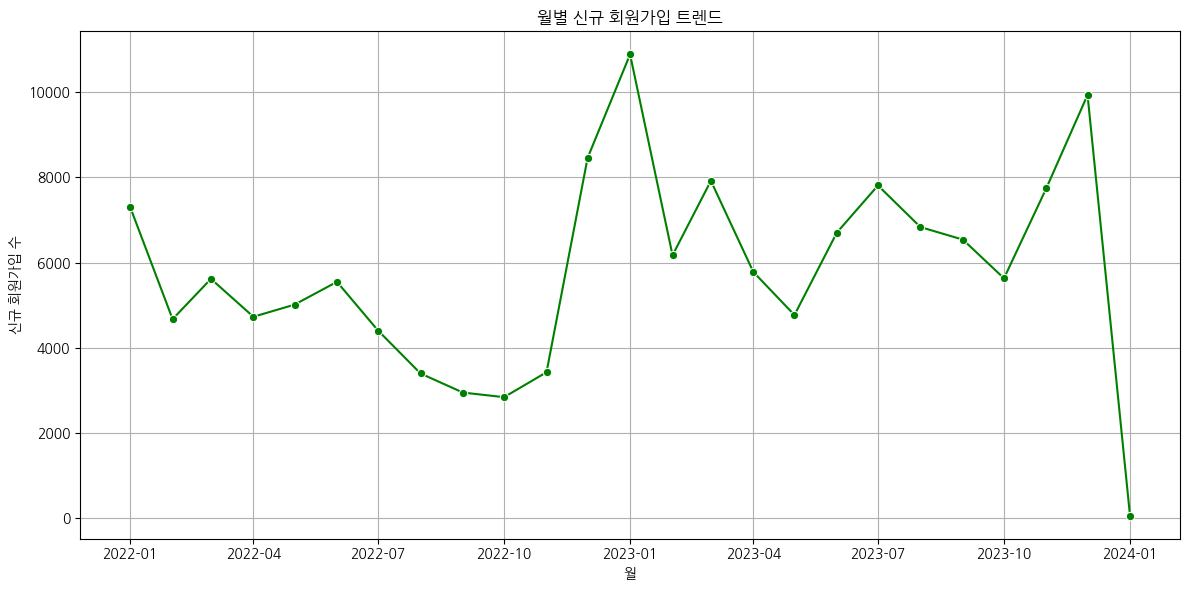

In [ ]:
# ÏãúÍ∞ÅÌôî: ÏõîÎ≥Ñ Ïã†Í∑ú ÌöåÏõêÍ∞ÄÏûÖ Ìä∏Î†åÎìú
plt.figure(figsize=(12, 6))

# ÏÑ† Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
sns.lineplot(x='signup_month_dt', y='new_signups', data=monthly_signups, marker='o', color='green')

# Í∞í ÎùºÎ≤® Ï∂îÍ∞Ä(ÌïÑÏöîÌïòÎã§Î©¥ Ï£ºÏÑù Ï≤òÎ¶¨Î•º Ï†úÍ±∞ÌïòÏó¨ ÌôúÏö© Í∞ÄÎä•)
# for i in range(len(monthly_signups)):
    # x = monthly_signups['signup_month_dt'].iloc[i]
    # y = monthly_signups['new_signups'].iloc[i]
    # plt.text(x, y + 3, f'{y}', ha='center', va='bottom', fontsize=9)

# Í∏∞ÌÉÄ ÏÑ§Ï†ï
plt.title('ÏõîÎ≥Ñ Ïã†Í∑ú ÌöåÏõêÍ∞ÄÏûÖ Ìä∏Î†åÎìú')
plt.xlabel('Ïõî')
plt.ylabel('Ïã†Í∑ú ÌöåÏõêÍ∞ÄÏûÖ Ïàò')
plt.grid(True)
plt.tight_layout()
plt.show()

## ÌöåÏõê Î°úÍ∑∏ ÎåÄÎπÑ Í∞ÄÏûÖÎ•†

In [ ]:
# ÏÇ¨Ïö©ÏûêÎ≥Ñ Ï≤´ ÌôúÎèô ÏãúÍ∞Ñ Í≥ÑÏÇ∞
first_event_df = all_events.loc[all_events.groupby('user_id')['client_event_time'].idxmin()]
first_event_df = first_event_df[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'first_event_time'})

print(f"\nÏ¥ù Í≥†Ïú† ÏÇ¨Ïö©Ïûê Ïàò (Ï≤´ ÌôúÎèô Í∏∞Ï§Ä): {first_event_df['user_id'].nunique()}")
print("\n--- ÏÇ¨Ïö©ÏûêÎ≥Ñ Ï≤´ ÌôúÎèô ÏãúÍ∞Ñ (ÏÉòÌîå) ---")
print(first_event_df.head())


Ï¥ù Í≥†Ïú† ÏÇ¨Ïö©Ïûê Ïàò (Ï≤´ ÌôúÎèô Í∏∞Ï§Ä): 179756

--- ÏÇ¨Ïö©ÏûêÎ≥Ñ Ï≤´ ÌôúÎèô ÏãúÍ∞Ñ (ÏÉòÌîå) ---
                                   user_id                 first_event_time
7069068   0000572f2ba8079bcefd2760b632e820 2023-03-18 19:33:16.237000+09:00
7097844   000087537cbfd934375364218ff10f91 2023-03-27 13:54:01.257000+09:00
7162932   000117267e1dd62481ef3ae7fb420107 2022-12-16 14:05:24.926000+09:00
31744668  00012b6dbfccfb458ad0d08f34477944 2022-01-02 10:18:06.966000+09:00
30325340  0001435bc6c0c0f05315192f89275425 2023-01-16 09:59:10.191000+09:00


In [ ]:
total_first_users = first_event_df['user_id'].nunique()
total_signups = complete_signup_df['user_id'].nunique()

if total_first_users > 0:
    overall_signup_rate = (total_signups / total_first_users) * 100
    print(f"--- Ï†ÑÏ≤¥ Í∏∞Í∞Ñ Î∂ÑÏÑù ---")
    print(f"Ï¥ù Ï≤´ Îì±Ïû• ÏÇ¨Ïö©Ïûê: {total_first_users}")
    print(f"Ï¥ù ÌöåÏõêÍ∞ÄÏûÖ ÏÇ¨Ïö©Ïûê: {total_signups}")
    print(f"Ï†ÑÏ≤¥ Í∏∞Í∞Ñ Ï≤´ Îì±Ïû• ÎåÄÎπÑ Í∞ÄÏûÖÎ•†: {overall_signup_rate:.2f}%")
else:
    print("\nÏ≤´ Îì±Ïû• ÏÇ¨Ïö©ÏûêÍ∞Ä ÏóÜÏñ¥ Ï†ÑÏ≤¥ Í∏∞Í∞Ñ Í∞ÄÏûÖÎ•†ÏùÑ Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

--- Ï†ÑÏ≤¥ Í∏∞Í∞Ñ Î∂ÑÏÑù ---
Ï¥ù Ï≤´ Îì±Ïû• ÏÇ¨Ïö©Ïûê: 179756
Ï¥ù ÌöåÏõêÍ∞ÄÏûÖ ÏÇ¨Ïö©Ïûê: 145133
Ï†ÑÏ≤¥ Í∏∞Í∞Ñ Ï≤´ Îì±Ïû• ÎåÄÎπÑ Í∞ÄÏûÖÎ•†: 80.74%


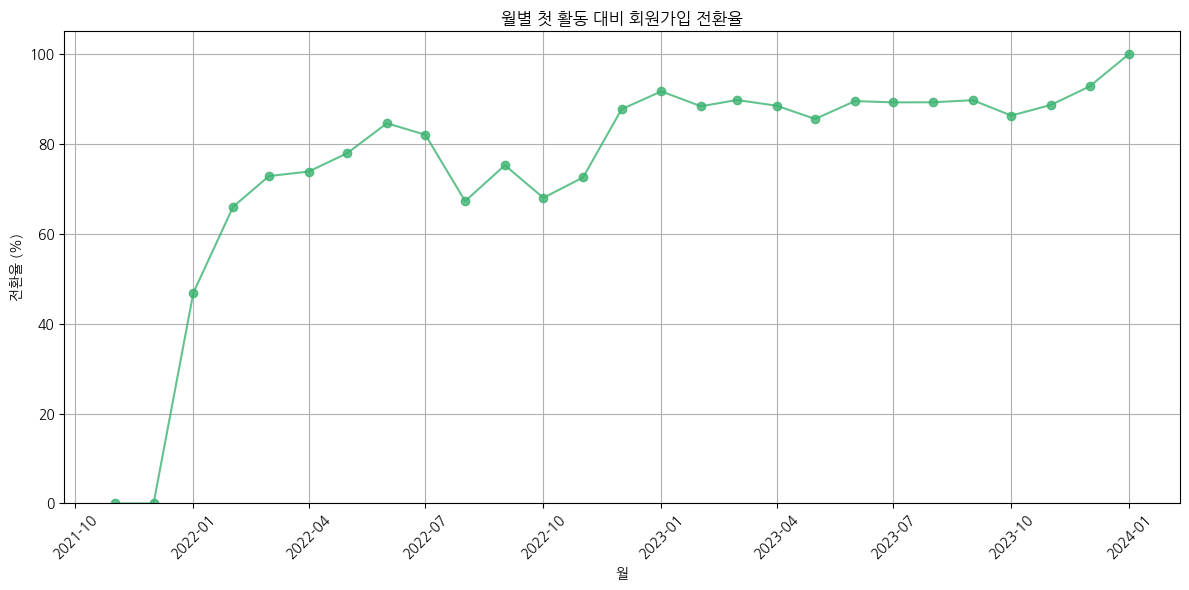

ÏõîÎ≥Ñ Ï≤´ ÌôúÎèô ÎåÄÎπÑ ÌöåÏõêÍ∞ÄÏûÖ Ï†ÑÌôòÏú®
     month_dt  new_users  new_signups  conversion_rate  conversion_rate_pct
0  2021-11-01          7            0         0.000000             0.000000
1  2021-12-01         33            0         0.000000             0.000000
2  2022-01-01      15604         7307         0.468277            46.827736
3  2022-02-01       7076         4669         0.659836            65.983607
4  2022-03-01       7715         5617         0.728062            72.806222
5  2022-04-01       6403         4727         0.738248            73.824770
6  2022-05-01       6432         5010         0.778918            77.891791
7  2022-06-01       6561         5548         0.845603            84.560280
8  2022-07-01       5368         4401         0.819858            81.985842
9  2022-08-01       5047         3393         0.672281            67.228056
10 2022-09-01       3914         2944         0.752172            75.217169
11 2022-10-01       4172         2836   

In [ ]:
# 1. Ïú†Ï†ÄÎ≥Ñ Ï≤´ ÌôúÎèô
first_activity = (
    all_events.sort_values('client_event_time')
    .groupby('user_id')
    .first()
    .reset_index()[['user_id', 'client_event_time']]
)
first_activity['month_dt'] = first_activity['client_event_time'].dt.to_period('M').dt.to_timestamp()

# 2. Í∞ÄÏûÖ Ïú†Ï†Ä (Í∞ÄÏûÖÏùºÎßå Ï∂îÏ∂ú)
complete_signup['signup_month'] = complete_signup['client_event_time'].dt.to_period('M').dt.to_timestamp()

# 3. Î≥ëÌï© Î∞è Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨
merged = (
    first_activity
    .merge(complete_signup[['user_id', 'client_event_time']], on='user_id', how='left')
    .rename(columns={'client_event_time_y': 'signup_time'})
)

# 4. ÏõîÎ≥Ñ ÏßëÍ≥Ñ
monthly = merged.groupby('month_dt').agg(
    new_users=('user_id', 'count'),
    new_signups=('signup_time', lambda x: x.notnull().sum())
).reset_index()
monthly['conversion_rate'] = monthly['new_signups'] / monthly['new_users']
monthly['conversion_rate_pct'] = monthly['conversion_rate'] * 100

# 5. ÏãúÍ∞ÅÌôî
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)
plt.figure(figsize=(12, 6))
plt.plot(monthly['month_dt'], monthly['conversion_rate_pct'], marker='o', color='mediumseagreen', alpha=0.8)
plt.title('ÏõîÎ≥Ñ Ï≤´ ÌôúÎèô ÎåÄÎπÑ ÌöåÏõêÍ∞ÄÏûÖ Ï†ÑÌôòÏú®')
plt.xlabel('Ïõî')
plt.ylabel('Ï†ÑÌôòÏú® (%)')
plt.ylim(0, 105)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Ìëú Ï∂úÎ†•
print("ÏõîÎ≥Ñ Ï≤´ ÌôúÎèô ÎåÄÎπÑ ÌöåÏõêÍ∞ÄÏûÖ Ï†ÑÌôòÏú®")
print(monthly)

## ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖÏûê Ïàò(Ïã†Í∑ú Í≥†Í∞ù ÌöçÎìù Ïàò)

In [ ]:
# ÏãúÍ∞Ñ Ïª¨Îüº Ï∂îÏ∂ú
signup_df['signup_hour'] = signup_df['signup_time'].dt.hour

# ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Ïàò ÏßëÍ≥Ñ
hourly_signups = (
    signup_df
    .groupby('signup_hour')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'unique_signup_count'})
)

# Í≤∞Í≥º ÌôïÏù∏
print(hourly_signups)

    signup_hour  unique_signup_count
0             0                 6323
1             1                 4241
2             2                 2745
3             3                 1840
4             4                 1355
5             5                 1285
6             6                 1716
7             7                 2763
8             8                 4570
9             9                 6082
10           10                 7113
11           11                 7384
12           12                 6660
13           13                 8145
14           14                 8689
15           15                 9082
16           16                 9068
17           17                 8671
18           18                 7340
19           19                 7664
20           20                 8369
21           21                 8933
22           22                 8717
23           23                 6378


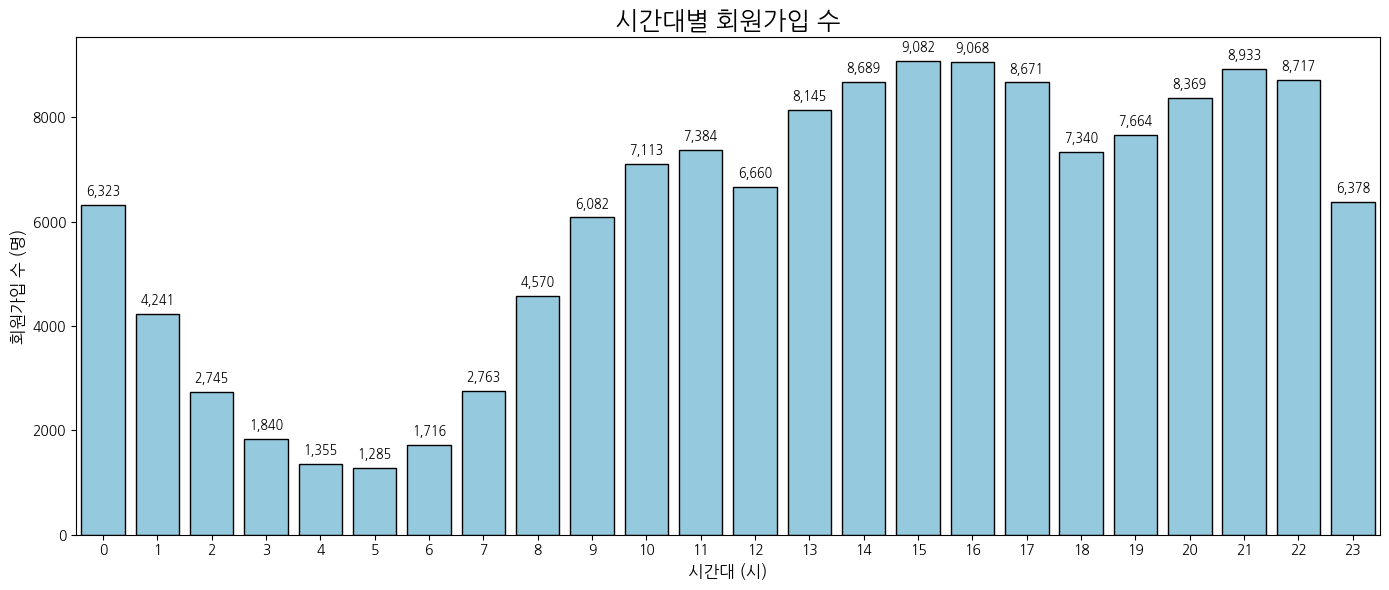

In [ ]:
plt.figure(figsize=(14, 6))

# Î∞î Í∑∏ÎûòÌîÑ
barplot = sns.barplot(
    data=hourly_signups,
    x='signup_hour',
    y='unique_signup_count',
    color='skyblue',
    edgecolor='black'
)

# Ïà´Ïûê ÎùºÎ≤® ÌëúÏãú
for p in barplot.patches:
    barplot.annotate(
        f'{int(p.get_height()):,}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=9, color='black', xytext=(0, 5),
        textcoords='offset points',
    )

plt.rc('font', family='NanumGothic')
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Ïàò', fontsize=18)
plt.xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)', fontsize=12)
plt.ylabel('ÌöåÏõêÍ∞ÄÏûÖ Ïàò (Î™Ö)', fontsize=12)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

## ÏöîÏùºÎ≥Ñ Ïã†Í∑ú Í≥†Í∞ù Ïú†ÏûÖ Ìå®ÌÑ¥ Î∂ÑÏÑù

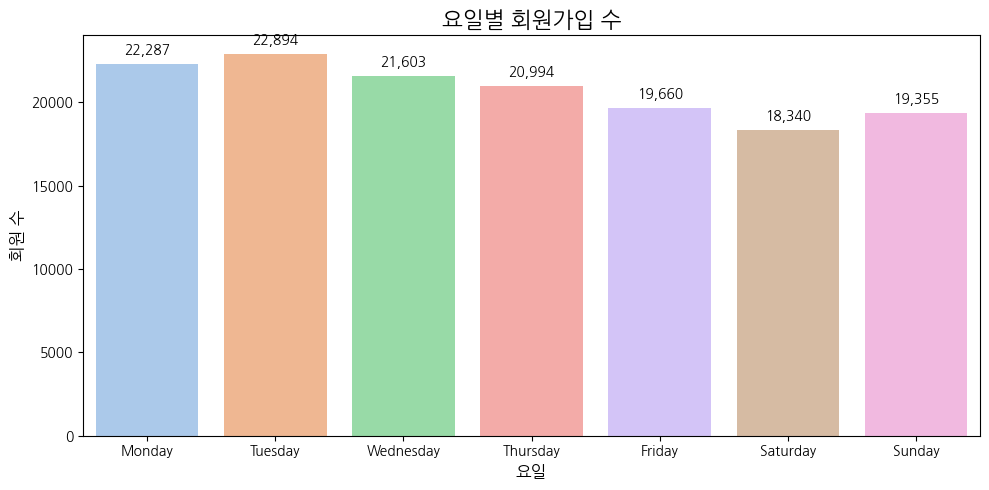

In [ ]:
# 1. ÏöîÏùº Ïª¨Îüº
signup_df['weekday'] = signup_df['signup_time'].dt.day_name()

# 2. ÏöîÏùº ÏàúÏÑú
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
signup_df['weekday'] = pd.Categorical(signup_df['weekday'], categories=weekday_order, ordered=True)

# 3. ÏßëÍ≥Ñ
weekday_signup = (
    signup_df.groupby('weekday')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'signup_users'})
)

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=weekday_signup, x='weekday', y='signup_users', palette='pastel')

# ÏàòÏπò ÌëúÏãú Ï∂îÍ∞Ä
for p in barplot.patches:
    value = int(p.get_height())
    barplot.annotate(f'{value:,}',  # ÏâºÌëú Ìè¨Ìï® Ïà´Ïûê
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, xytext=(0, 5),
        textcoords='offset points'
    )

plt.title('ÏöîÏùºÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Ïàò', fontsize=16)
plt.xlabel('ÏöîÏùº', fontsize=12)
plt.ylabel('ÌöåÏõê Ïàò', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## ÏöîÏùº-ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïú†ÏûÖ Ìå®ÌÑ¥ Î∂ÑÏÑù

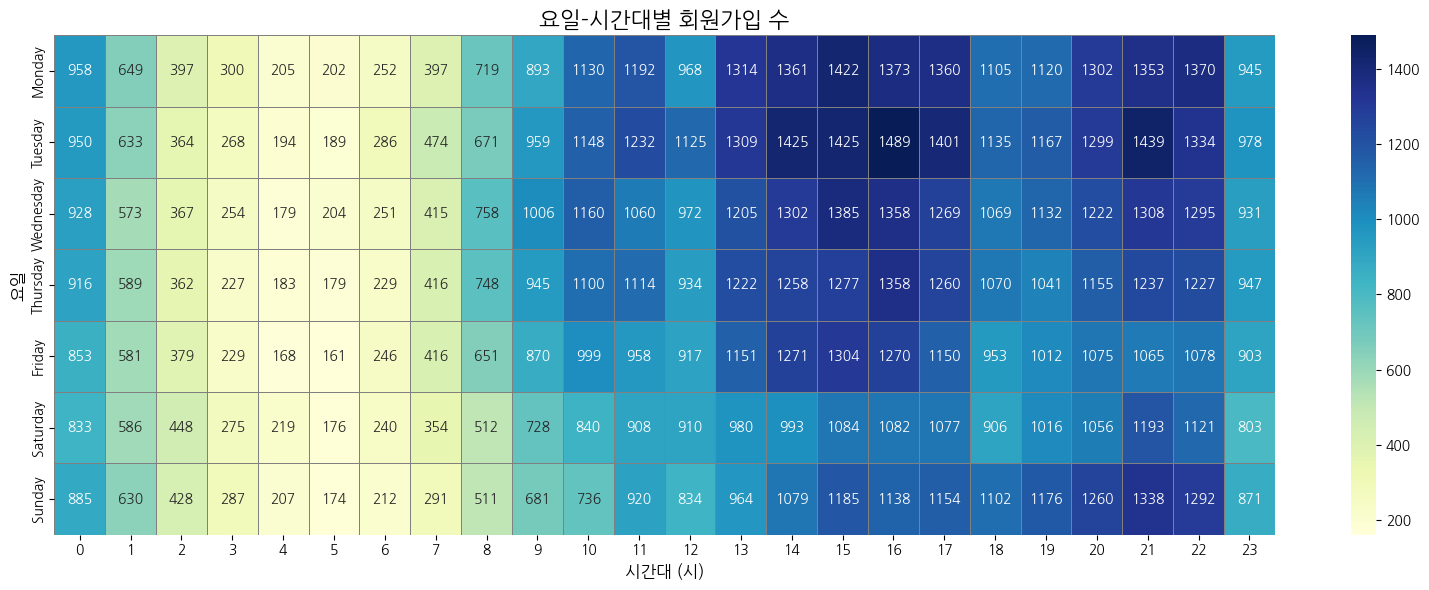

In [ ]:
# 1. ÏãúÍ∞Ñ Î∞è ÏöîÏùº Ïª¨Îüº Ï∂îÍ∞Ä
signup_df['signup_time'] = pd.to_datetime(signup_df['signup_time'])
signup_df['hour'] = signup_df['signup_time'].dt.hour
signup_df['weekday'] = signup_df['signup_time'].dt.day_name()

# 2. ÏöîÏùº ÏàúÏÑú ÏßÄÏ†ï
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
signup_df['weekday'] = pd.Categorical(signup_df['weekday'], categories=weekday_order, ordered=True)

# 3. ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±: ÏöîÏùº x ÏãúÍ∞ÑÎåÄ ‚Üí Í≥†Ïú† ÌöåÏõê Ïàò
heatmap_data = (
    signup_df.groupby(['weekday', 'hour'])['user_id']
    .nunique()
    .reset_index()
    .pivot(index='weekday', columns='hour', values='user_id')
    .fillna(0)
)

# 4. ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=.5, linecolor='gray')

plt.title('ÏöîÏùº-ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Ïàò', fontsize=16)
plt.rc('font', family='AppleGothic') # MacOS ÏòàÏãú
plt.xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)', fontsize=12)
plt.ylabel('ÏöîÏùº', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# ÏöîÏùº-ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïú†ÏûÖ Î≤°ÌÑ∞
X = heatmap_data.copy()

# Î™®Îì† ÏöîÏùºÏùÑ 0~1 ÏÇ¨Ïù¥Î°ú Ï†ïÍ∑úÌôî (ÎπÑÏú® Í∏∞Î∞ò Ìå®ÌÑ¥ ÌååÏïÖ Î™©Ï†Å)
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

In [ ]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÎäî ÏùºÎã® 2~4 Ï§ë Ïã§Ìóò Í∞ÄÎä•
kmeans = KMeans(n_clusters=3, random_state=42)
X_scaled['cluster'] = kmeans.fit_predict(X_scaled)

weekday
Monday       2
Tuesday      2
Wednesday    0
Thursday     0
Friday       0
Saturday     1
Sunday       1
Name: cluster, dtype: int32


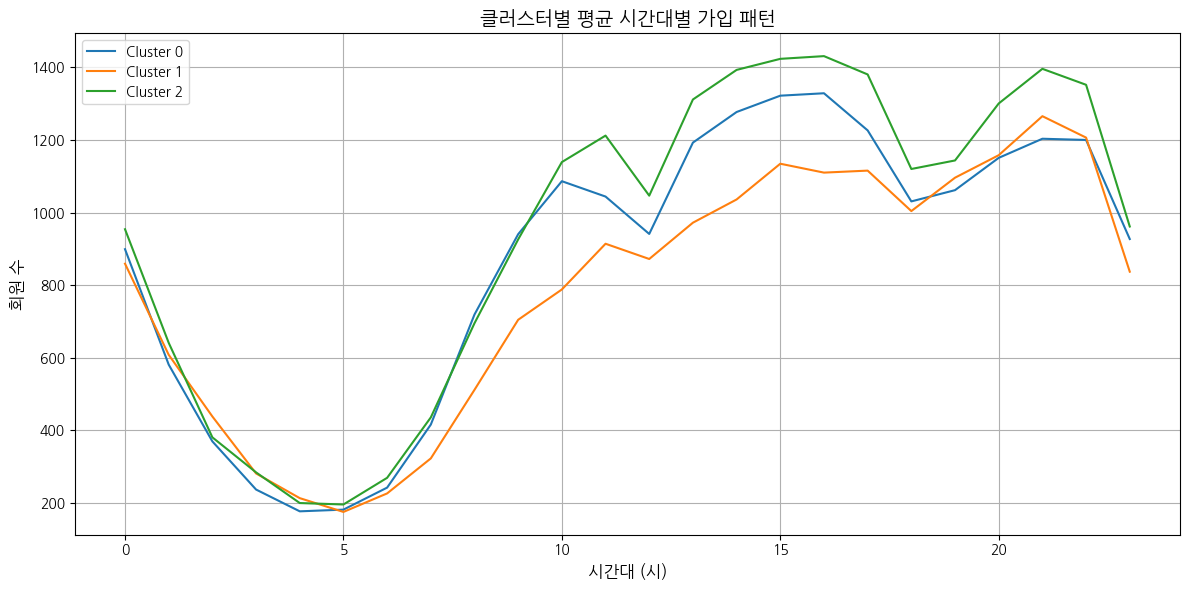

In [ ]:
# ÏöîÏùºÎ≥Ñ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º Ï∂úÎ†•
print(X_scaled['cluster'])

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Ìå®ÌÑ¥ ÏãúÍ∞ÅÌôî (Ïä§ÌååÍ≤åÌã∞ Ï∞®Ìä∏)
plt.figure(figsize=(12, 6))
for cluster_id in sorted(X_scaled['cluster'].unique()):
    cluster_days = X_scaled[X_scaled['cluster'] == cluster_id].index
    avg_pattern = X.loc[cluster_days].mean()
    plt.plot(avg_pattern.index, avg_pattern.values, label=f'Cluster {cluster_id}')

plt.title('ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† ÏãúÍ∞ÑÎåÄÎ≥Ñ Í∞ÄÏûÖ Ìå®ÌÑ¥', fontsize=14)
plt.rc('font', family='NanumGothic')
plt.xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)', fontsize=12)
plt.ylabel('ÌöåÏõê Ïàò', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ÎîîÎ∞îÏù¥Ïä§/Ïñ∏Ïñ¥/Íµ≠Í∞Ä/ÎèÑÏãúÎ≥Ñ Ïú†ÏûÖ Î∂ÑÌè¨

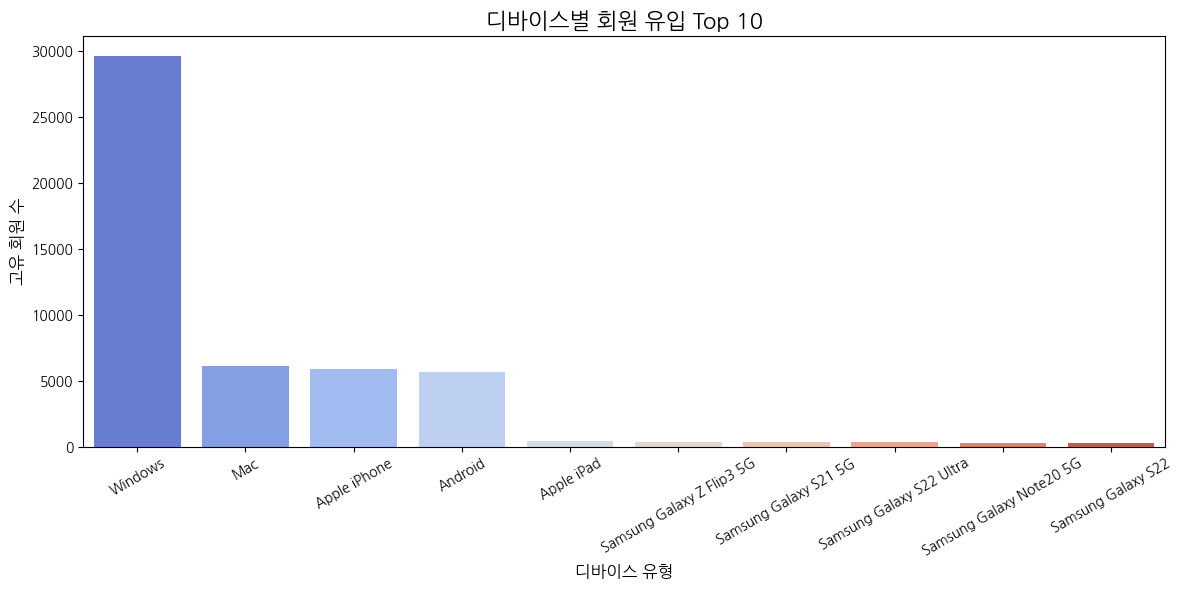

In [ ]:
# 1. ÌöåÏõêÍ∞ÄÏûÖ Ïú†Ï†Ä ID Ï∂îÏ∂ú
signup_users = complete_signup[['user_id']].drop_duplicates()

# 2. ÎîîÎ∞îÏù¥Ïä§ Ï†ïÎ≥¥ Ìè¨Ìï®Îêú enter_mainÏóêÏÑú Ïú†Ï†ÄÎ≥Ñ ÎåÄÌëú device_type Ï∂îÏ∂ú
device_info = (
    enter_main[['user_id', 'device_type']]
    .dropna()
    .drop_duplicates(subset='user_id')  # Ïú†Ï†ÄÎ≥Ñ ÎåÄÌëú ÎîîÎ∞îÏù¥Ïä§ 1Í∞ú
)

# 3. ÌöåÏõêÍ∞ÄÏûÖ Ïú†Ï†ÄÏôÄ ÎîîÎ∞îÏù¥Ïä§ Ï†ïÎ≥¥ Î≥ëÌï©
signup_users = signup_users.astype(str)
device_info = device_info.astype(str)
signup_with_device = signup_users.merge(device_info, on='user_id', how='left')

# 4. ÎîîÎ∞îÏù¥Ïä§Î≥Ñ Ïú†ÏûÖ Ïàò ÏßëÍ≥Ñ (Top 10)
device_counts = (
    signup_with_device['device_type']
    .value_counts()
    .head(10)
    .reset_index()
)

device_counts.columns = ['device_type', 'user_count']  # Ïª¨ÎüºÎ™Ö Î™ÖÌôïÌûà ÏßÄÏ†ï

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.rc('font', family='NanumGothic')
sns.barplot(data=device_counts, x='device_type', y='user_count', palette='coolwarm')

plt.title('ÎîîÎ∞îÏù¥Ïä§Î≥Ñ ÌöåÏõê Ïú†ÏûÖ Top 10', fontsize=16)
plt.xlabel('ÎîîÎ∞îÏù¥Ïä§ Ïú†Ìòï', fontsize=12)
plt.ylabel('Í≥†Ïú† ÌöåÏõê Ïàò', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

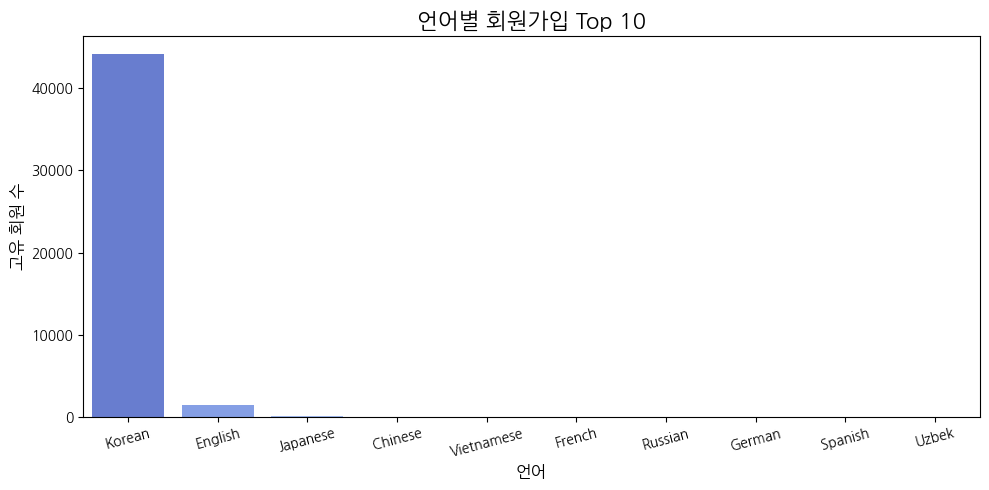

In [ ]:
# 1. ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å Ïú†Ï†Ä Ï§ë Ïñ∏Ïñ¥Î≥Ñ Í≥†Ïú† Ïú†Ï†Ä Ïàò ÏßëÍ≥Ñ
language_dist_top10 = (
    complete_signup.groupby('language')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'unique_user_count'})
    .sort_values(by='unique_user_count', ascending=False)
    .head(10)
)

# 2. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
sns.barplot(x='language', y='unique_user_count', data=language_dist_top10, palette='coolwarm')

plt.title('Ïñ∏Ïñ¥Î≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Top 10', fontsize=16)
plt.xlabel('Ïñ∏Ïñ¥', fontsize=12)
plt.ylabel('Í≥†Ïú† ÌöåÏõê Ïàò', fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

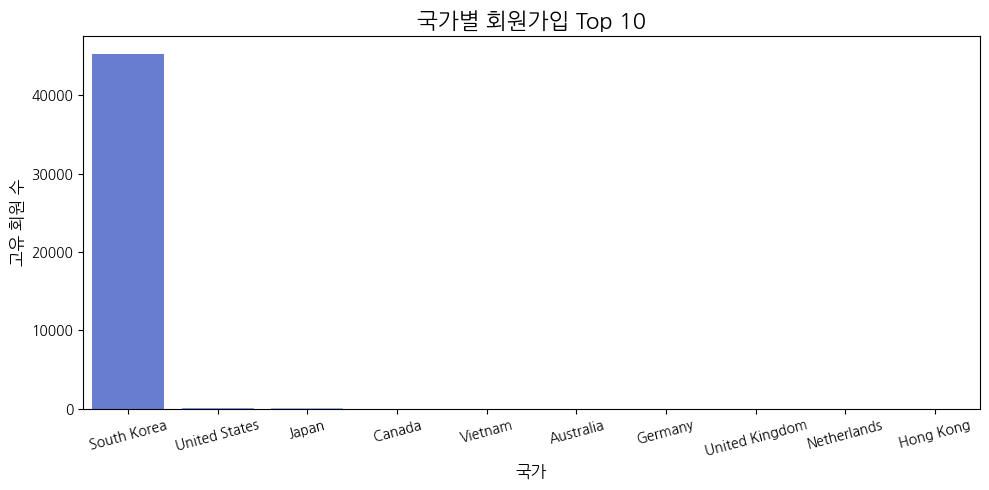

In [ ]:
# 1. complete_signup Í∏∞Ï§Ä Íµ≠Í∞ÄÎ≥Ñ Í≥†Ïú† Ïú†Ï†Ä Ïàò ÏßëÍ≥Ñ
country_dist_top10 = (
    complete_signup.groupby('country')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'unique_user_count'})
    .sort_values(by='unique_user_count', ascending=False)
    .head(10)
)

# 2. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
sns.barplot(x='country', y='unique_user_count', data=country_dist_top10, palette='coolwarm')

plt.title('Íµ≠Í∞ÄÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Top 10', fontsize=16)
plt.rc('font', family='NanumGothic')
plt.xlabel('Íµ≠Í∞Ä', fontsize=12)
plt.ylabel('Í≥†Ïú† ÌöåÏõê Ïàò', fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

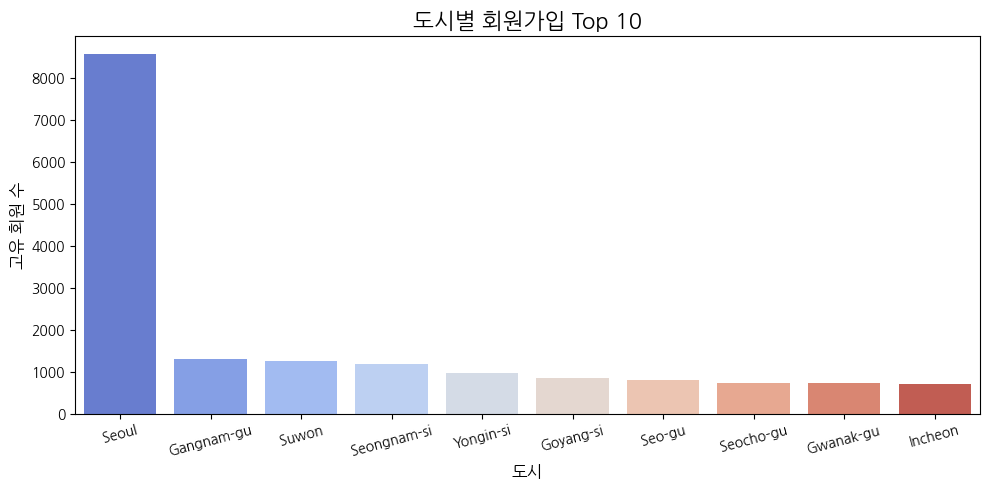

In [ ]:
# 1. complete_signup Í∏∞Ï§Ä ÎèÑÏãúÎ≥Ñ Í≥†Ïú† Ïú†Ï†Ä Ïàò ÏßëÍ≥Ñ
city_dist_top10 = (
    complete_signup.groupby('city')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'unique_user_count'})
    .sort_values(by='unique_user_count', ascending=False)
    .head(10)
)

# 2. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
sns.barplot(x='city', y='unique_user_count', data=city_dist_top10, palette='coolwarm')

plt.title('ÎèÑÏãúÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Top 10', fontsize=16)
plt.rc('font', family='NanumGothic')
plt.xlabel('ÎèÑÏãú', fontsize=12)
plt.ylabel('Í≥†Ïú† ÌöåÏõê Ïàò', fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## ÏõîÎ≥Ñ Í∞ÄÏûÖ Ï†Ñ ÌôúÎèô Ïú†Ï†Ä vs ÌöåÏõêÍ∞ÄÏûÖ(Ïã†Í∑ú Í≥†Í∞ù ÌöçÎìù)

- ÌöåÏõêÍ∞ÄÏûÖÏùÑ Ìïú Ïú†Ï†Ä Ï§ëÏóêÏÑú Í∞ÄÏûÖ ÏãúÏ†ê Ïù¥Ï†ÑÏóê ÌÉêÏÉâÏùÑ ÌïòÍ≥† Í∞ÄÏûÖÌïú Ïú†Ï†Ä vs ÌÉêÏÉâ ÏóÜÏù¥ Î∞îÎ°ú Í∞ÄÏûÖÌïú Ïú†Ï†Ä
    - ÌÉêÏÉâ ÌõÑ Í∞ÄÏûÖ Ïú†Ï†Ä: Í∞ÄÏûÖ ÏôÑÎ£å ÏãúÏ†ê Ïù¥Ï†ÑÏóê Î°úÍ∑∏(Í∞ÄÏûÖ Í¥ÄÎ†® Ïù¥Î≤§Ìä∏Îäî Ï†úÏô∏)Í∞Ä ÌïòÎÇòÎùºÎèÑ ÎÇ®ÏùÄ Ïú†Ï†Ä
    - ÏôÑÏ†Ñ Ïã†Í∑ú Ïú†Ï†Ä: Í∞ÄÏûÖ ÏôÑÎ£å ÏãúÏ†ê Ïù¥Ï†ÑÏóê Î°úÍ∑∏(Í∞ÄÏûÖ Í¥ÄÎ†® Ïù¥Î≤§Ìä∏Îäî Ï†úÏô∏)Í∞Ä ÌïòÎÇòÎèÑ ÏóÜÎäî Ïú†Ï†Ä

In [ ]:
# 1. ÏãúÍ∞Ñ ÌòïÏãù Ï†ïÎ¶¨
signup_df['signup_time'] = pd.to_datetime(signup_df['signup_time'])
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'])

# 2. Í∞ÄÏûÖ Ïú†Ï†ÄÏùò Í∞ÄÏûÖ ÏãúÍ∞Ñ ÎîïÏÖîÎÑàÎ¶¨Ìôî
signup_time_dict = dict(zip(signup_df['user_id'], signup_df['signup_time']))

# 3. ÌÉêÏÉâ Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ (Í∞ÄÏûÖ ÌîåÎ°úÏö∞Ïóê Ìè¨Ìï®ÎêòÎäî Í±¥ Ï†úÏô∏)
non_navigational_events = ['complete_signup', 'enter_main', 'enter_signup']
filtered_events = all_events[
    (all_events['event_type'].isin(non_navigational_events) == False) &
    (all_events['user_id'].isin(signup_time_dict))
].copy()

# 4. Í∞ÄÏûÖ Ï†Ñ ÌÉêÏÉâÏù∏ÏßÄ Ïó¨Î∂Ä ÌåêÎ≥Ñ
filtered_events['is_before_signup'] = filtered_events.apply(
    lambda row: row['client_event_time'] < signup_time_dict.get(row['user_id'], pd.Timestamp.max),
    axis=1
)

# 5. ÏßÑÏßú ÌÉêÏÉâ Ïú†Ï†Ä ÏßëÌï© ÏÉùÏÑ±
visited_before_set = set(filtered_events[filtered_events['is_before_signup']]['user_id'])

# 6. Í∞ÄÏûÖ Îç∞Ïù¥ÌÑ∞Ïóê ÌîåÎûòÍ∑∏ ÏÉùÏÑ±
signup_df['visited_before_signup'] = signup_df['user_id'].isin(visited_before_set)

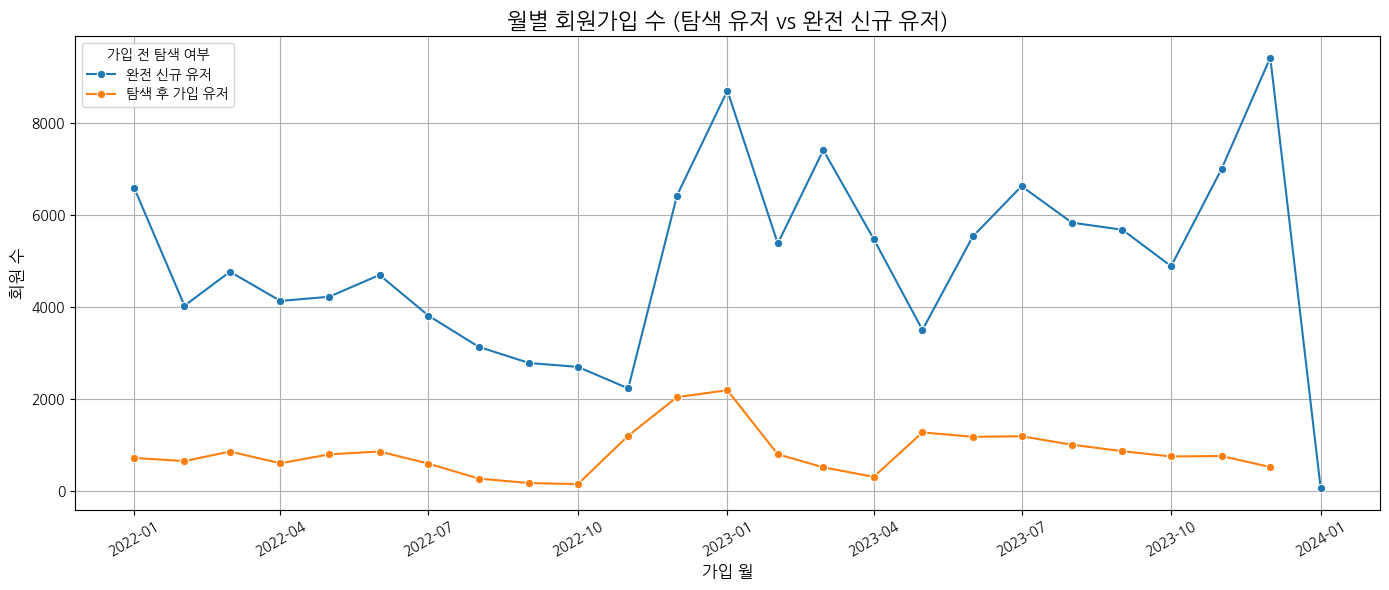

In [ ]:
# 1. Í∞ÄÏûÖÏùº Í∏∞Ï§Ä Ïõî Ï∂îÏ∂ú
signup_df['signup_month'] = signup_df['signup_time'].dt.to_period('M')

# 2. Í∑∏Î£πÎ≥Ñ ÏõîÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò ÏßëÍ≥Ñ
monthly_acquisition = (
    signup_df
    .groupby(['signup_month', 'visited_before_signup'])['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'signup_user_count'})
)

# 3. Period ‚Üí datetime Î≥ÄÌôò
monthly_acquisition['signup_month'] = monthly_acquisition['signup_month'].dt.to_timestamp()

# 4. ÌÉêÏÉâ Ïó¨Î∂Ä ÎùºÎ≤® ÏßÄÏ†ï
monthly_acquisition['ÌÉêÏÉâÏó¨Î∂Ä'] = monthly_acquisition['visited_before_signup'].map({
    True: 'ÌÉêÏÉâ ÌõÑ Í∞ÄÏûÖ Ïú†Ï†Ä',
    False: 'ÏôÑÏ†Ñ Ïã†Í∑ú Ïú†Ï†Ä'
})

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
plt.rc('font', family='NanumGothic')
sns.lineplot(data=monthly_acquisition,
             x='signup_month',
             y='signup_user_count',
             hue='ÌÉêÏÉâÏó¨Î∂Ä',
             marker='o')

plt.title('ÏõîÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Ïàò (ÌÉêÏÉâ Ïú†Ï†Ä vs ÏôÑÏ†Ñ Ïã†Í∑ú Ïú†Ï†Ä)', fontsize=16)
plt.xlabel('Í∞ÄÏûÖ Ïõî', fontsize=12)
plt.ylabel('ÌöåÏõê Ïàò', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend(title='Í∞ÄÏûÖ Ï†Ñ ÌÉêÏÉâ Ïó¨Î∂Ä')
plt.tight_layout()
plt.show()

- Îã®ÏàúÌïòÍ≤å Ìï¥Îãπ ÏãúÏ†êÏóê Í∞ÄÏûÖÏùÑ Ïïà ÌïòÍ≥† ÌôúÎèôÌïòÎäî Ïú†Ï†Ä vs Í∞ÄÏûÖ ÏôÑÎ£åÌïú Ïú†Ï†ÄÎ•º ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑ
    - ÌÉêÏÉâÎßå Ìïú Ïú†Ï†Ä: Ìï¥Îãπ ÏãúÏ†êÏóê Í∞ÄÏûÖ ÏôÑÎ£å ÏãúÏ†ê Ïù¥Ï†ÑÏóê Î°úÍ∑∏Í∞Ä ÌïòÎÇòÎùºÎèÑ ÎÇ®ÏùÄ Ïú†Ï†Ä
    - Í∞ÄÏûÖ Ïú†Ï†Ä: Ìï¥Îãπ ÏãúÏ†êÏóê Í∞ÄÏûÖ ÏôÑÎ£åÌïú Ïú†Ï†Ä

In [ ]:
# 1. Í∞ÄÏûÖ Ïú†Ï†Ä Í∞ÄÏûÖ ÏãúÍ∞Ñ ÎîïÏÖîÎÑàÎ¶¨Î°ú Î≥ÄÌôò
signup_time_dict = dict(zip(signup_df['user_id'], signup_df['signup_time']))

# 2. Ï†úÏô∏Ìï† Ïù¥Î≤§Ìä∏ Î™©Î°ù (Í∞ÄÏûÖ ÌîåÎ°úÏö∞ÏóêÏÑú Î∞úÏÉùÌïòÎäî Ïù¥Î≤§Ìä∏Îì§)
non_navigational_events = ['complete_signup', 'enter_main', 'enter_signup']

# 3. Í∞ÄÏûÖ Ïú†Ï†ÄÎßå ÌïÑÌÑ∞ÎßÅÌïòÍ≥†, ÌÉêÏÉâ Ïù¥Î≤§Ìä∏Îßå ÎÇ®Í∏∞Í∏∞
filtered = all_events[
    (all_events['user_id'].isin(signup_time_dict)) &
    (~all_events['event_type'].isin(non_navigational_events))
].copy()

# 4. Í∞ÄÏûÖ Ï†Ñ ÌñâÎèôÏù∏ÏßÄ Ïó¨Î∂Ä ÌåêÎã®
filtered['is_before_signup'] = filtered.apply(
    lambda row: row['client_event_time'] < signup_time_dict.get(row['user_id'], pd.Timestamp.max),
    axis=1
)

# 5. Í∞ÄÏûÖ Ï†Ñ ÌÉêÏÉâ ÌñâÎèôÏù¥ ÏûàÏóàÎçò Ïú†Ï†Ä Ï∂îÏ∂ú
visited_before_set = set(filtered[filtered['is_before_signup']]['user_id'])

# 6. Í≤∞Í≥º ÌîåÎûòÍ∑∏ ÏÉùÏÑ±
signup_df['visited_before_signup'] = signup_df['user_id'].isin(visited_before_set)

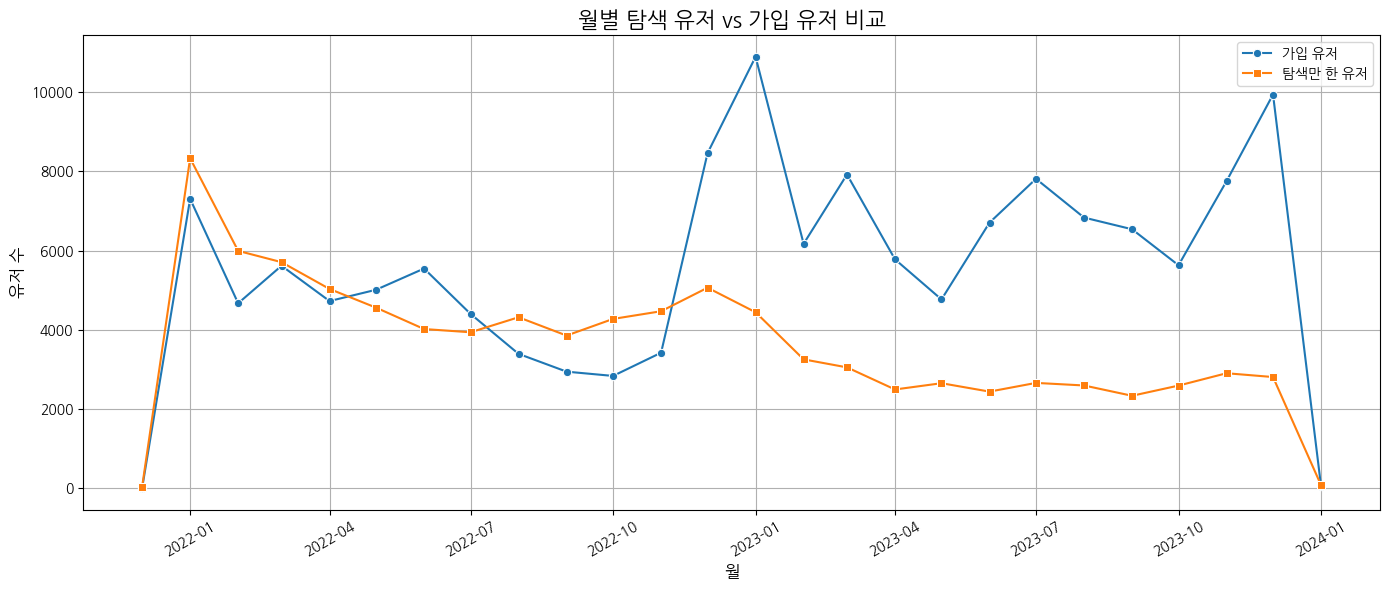

In [ ]:
# 1. Ïù¥ÏÉÅÏπò Ï†úÍ±∞
all_events = all_events.dropna(subset=['client_event_time'])
signup_df = signup_df.dropna(subset=['signup_time'])
all_events = all_events[all_events['client_event_time'] > '2021-12-01']
signup_df = signup_df[signup_df['signup_time'] > '2000-01-01']

# 2. ÌÉêÏÉâÏúºÎ°ú Í∞ÑÏ£ºÌïòÏßÄ ÏïäÏùÑ Ïù¥Î≤§Ìä∏ Ï†úÍ±∞
non_navigational_events = ['complete_signup', 'enter_main', 'enter_signup']
exploratory_events = all_events[~all_events['event_type'].isin(non_navigational_events)].copy()

# 3. Ïõî Îã®ÏúÑÎ°ú Î≥ÄÌôò
exploratory_events['month'] = exploratory_events['client_event_time'].dt.to_period('M')
signup_df['signup_month'] = signup_df['signup_time'].dt.to_period('M')

# 4. ÏõîÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò
signup_monthly = signup_df.groupby('signup_month')['user_id'].nunique().reset_index(name='signup_users')

# 5. Í∞ÄÏûÖÌïòÏßÄ ÏïäÏùÄ ÌÉêÏÉâ Ïú†Ï†ÄÎßå ÌïÑÌÑ∞ÎßÅ
non_signup_events = exploratory_events[~exploratory_events['user_id'].isin(signup_df['user_id'])]

# 6. ÏõîÎ≥Ñ ÌÉêÏÉâ Ïú†Ï†Ä Ïàò ÏßëÍ≥Ñ
non_signup_monthly = (
    non_signup_events.groupby('month')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'month': 'signup_month', 'user_id': 'non_signup_users'})
)

# 7. Î≥ëÌï© Î∞è Ï†ïÎ¶¨
acquisition_compare = signup_monthly.merge(non_signup_monthly, on='signup_month', how='outer').fillna(0)
acquisition_compare['signup_month'] = acquisition_compare['signup_month'].dt.to_timestamp()

# 8. ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.lineplot(data=acquisition_compare, x='signup_month', y='signup_users', label='Í∞ÄÏûÖ Ïú†Ï†Ä', marker='o')
sns.lineplot(data=acquisition_compare, x='signup_month', y='non_signup_users', label='ÌÉêÏÉâÎßå Ìïú Ïú†Ï†Ä', marker='s')

plt.title('ÏõîÎ≥Ñ ÌÉêÏÉâ Ïú†Ï†Ä vs Í∞ÄÏûÖ Ïú†Ï†Ä ÎπÑÍµê', fontsize=16)
plt.rc('font', family='NanumGothic')
plt.xlabel('Ïõî', fontsize=12)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## ÏõîÎ≥Ñ Ïã†Í∑ú Í≥†Í∞ù vs Ïû¨Î∞©Î¨∏ Ïú†Ï†Ä

- Í∞ÄÏûÖ Ïù¥ÌõÑ ÏãúÏ†êÏùò Î™®Îì† Î°úÍ∑∏Î•º Ïû¨Î∞©Î¨∏ ÌôúÎèôÏúºÎ°ú Í∞ÑÏ£ºÌï®

In [ ]:
# 1. ÏãúÍ∞Ñ Ï†ïÎ¶¨
signup_df['signup_time'] = pd.to_datetime(signup_df['signup_time'])
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'])

# 2. Í∞ÄÏûÖ Ïú†Ï†Ä Í∏∞Ï§ÄÏúºÎ°ú all_events Ï°∞Ïù∏
user_events = all_events.merge(signup_df[['user_id', 'signup_time']], on='user_id', how='inner')

# 3. Í∞ÄÏûÖ Ïù¥ÌõÑ Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ ‚Üí Ïû¨Î∞©Î¨∏
after_signup_events = user_events[user_events['client_event_time'] > user_events['signup_time']].copy()
after_signup_events['revisit_month'] = after_signup_events['client_event_time'].dt.to_period('M')

# 4. ÏõîÎ≥Ñ Ïû¨Î∞©Î¨∏ Ïú†Ï†Ä Ïàò ÏßëÍ≥Ñ (Í≥†Ïú† Ïú†Ï†Ä Ïàò)
revisit_monthly = (
    after_signup_events
    .groupby('revisit_month')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'revisit_users'})
)

# 5. ÏõîÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò (Í∏∞Ï°¥ Í∞ÄÏûÖÏõî Í∏∞Ï§Ä)
signup_df['signup_month'] = signup_df['signup_time'].dt.to_period('M')
signup_monthly = (
    signup_df.groupby('signup_month')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'signup_users'})
)

# 6. Î≥ëÌï© ÌõÑ ÏãúÍ∞ÅÌôîÏö© Î≥ÄÌôò
compare_df = pd.merge(signup_monthly, revisit_monthly, left_on='signup_month', right_on='revisit_month', how='outer')
compare_df = compare_df.rename(columns={'signup_month': 'month'}).drop(columns=['revisit_month'])
compare_df = compare_df.sort_values('month').fillna(0)
compare_df['month'] = compare_df['month'].dt.to_timestamp()

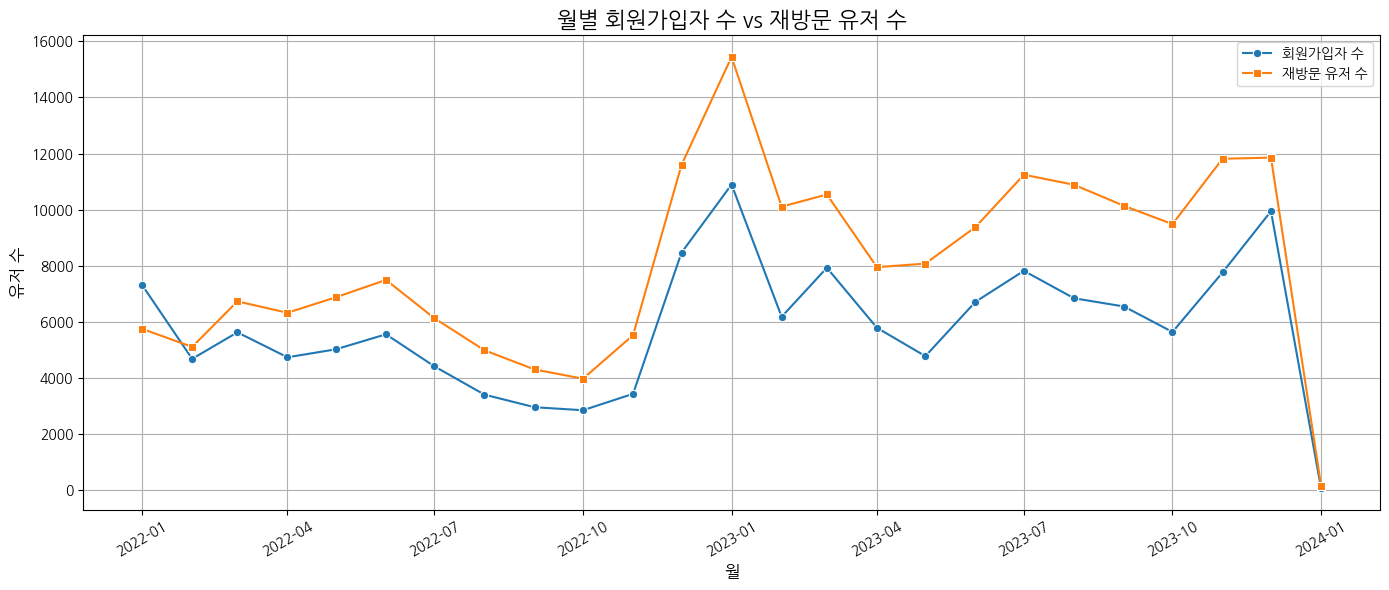

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=compare_df, x='month', y='signup_users', label='ÌöåÏõêÍ∞ÄÏûÖÏûê Ïàò', marker='o')
sns.lineplot(data=compare_df, x='month', y='revisit_users', label='Ïû¨Î∞©Î¨∏ Ïú†Ï†Ä Ïàò', marker='s')

plt.title('ÏõîÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖÏûê Ïàò vs Ïû¨Î∞©Î¨∏ Ïú†Ï†Ä Ïàò', fontsize=16)
plt.rc('font', family='NanumGothic')
plt.xlabel('Ïõî', fontsize=12)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

- Í∞ÄÏûÖ Ïù¥ÌõÑ ÏãúÏ†êÏóêÏÑú Í∞ÄÏû• Ï≤´ Î≤àÏß∏Î°ú ÏÉùÍ∏¥ Î°úÍ∑∏Î•º Ï≤´ Ïû¨Î∞©Î¨∏ÏúºÎ°ú Í∞ÑÏ£ºÌïòÍ≥† Ï≤´ Ïû¨Î∞©Î¨∏Îßå Î∂ÑÏÑùÌï®

In [ ]:
# 1. ÏãúÍ∞Ñ ÌòïÏãù Ï†ïÎ¶¨
signup_df['signup_time'] = pd.to_datetime(signup_df['signup_time'])
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'])

# 2. Í∞ÄÏûÖ Ïù¥ÌõÑ Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
user_events = all_events.merge(signup_df[['user_id', 'signup_time']], on='user_id', how='inner')
after_signup_events = user_events[user_events['client_event_time'] > user_events['signup_time']].copy()

# 3. Ïú†Ï†ÄÎãπ ÏµúÏ¥à Ïû¨Î∞©Î¨∏ ÏãúÍ∞Ñ Ï∂îÏ∂ú
first_revisit = (
    after_signup_events
    .sort_values('client_event_time')
    .drop_duplicates(subset='user_id', keep='first')
    .copy()
)
first_revisit['revisit_month'] = first_revisit['client_event_time'].dt.to_period('M')

# 4. ÏõîÎ≥Ñ ÏµúÏ¥à Ïû¨Î∞©Î¨∏ Ïú†Ï†Ä Ïàò
first_revisit_monthly = (
    first_revisit
    .groupby('revisit_month')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'first_revisit_users'})
)

# 5. ÏõîÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò
signup_df['signup_month'] = signup_df['signup_time'].dt.to_period('M')
signup_monthly = (
    signup_df.groupby('signup_month')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'signup_users'})
)

# 6. Î≥ëÌï©
compare_df = pd.merge(signup_monthly, first_revisit_monthly,
                      left_on='signup_month', right_on='revisit_month', how='outer')
compare_df = compare_df.rename(columns={'signup_month': 'month'}).drop(columns=['revisit_month'])
compare_df = compare_df.sort_values('month').fillna(0)
compare_df['month'] = compare_df['month'].dt.to_timestamp()

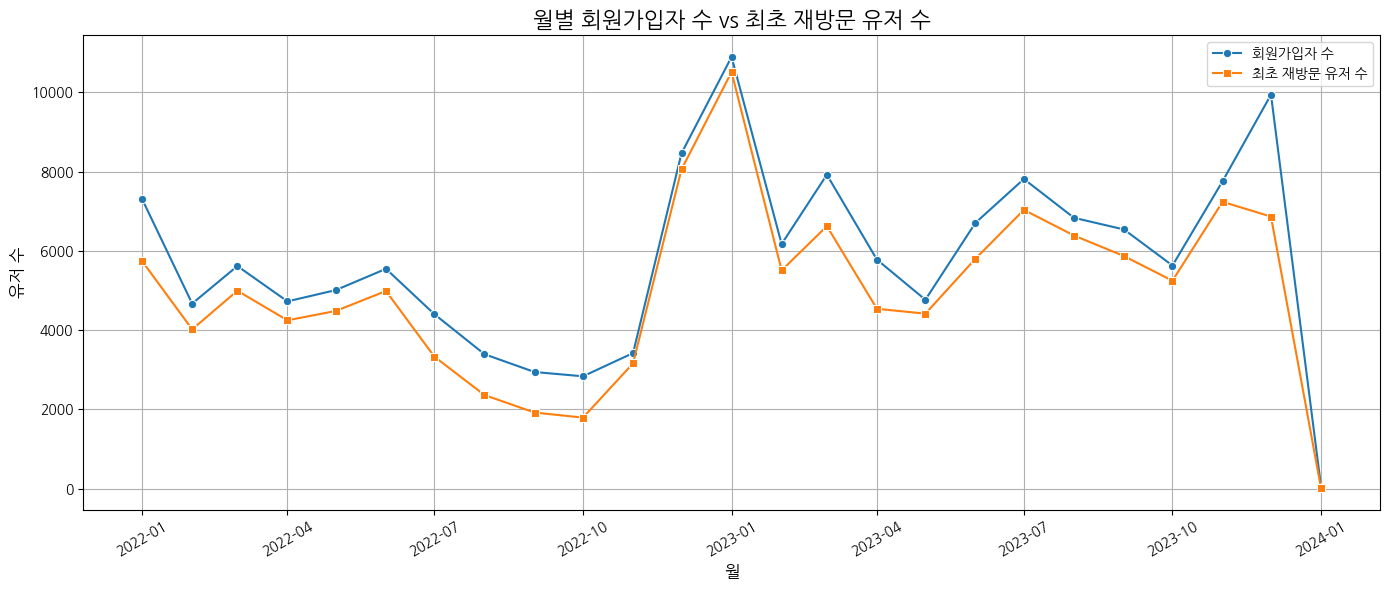

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=compare_df, x='month', y='signup_users', label='ÌöåÏõêÍ∞ÄÏûÖÏûê Ïàò', marker='o')
sns.lineplot(data=compare_df, x='month', y='first_revisit_users', label='ÏµúÏ¥à Ïû¨Î∞©Î¨∏ Ïú†Ï†Ä Ïàò', marker='s')

plt.title('ÏõîÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖÏûê Ïàò vs ÏµúÏ¥à Ïû¨Î∞©Î¨∏ Ïú†Ï†Ä Ïàò', fontsize=16)
plt.xlabel('Ïõî', fontsize=12)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Activation(ÌôúÏÑ±Ìôî)

## ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ ÏïÑÌïò Î™®Î®ºÌä∏ Í≤ΩÌóò

- ÏïÑÌïò Î™®Î®ºÌä∏: Ï≤´ Î†àÏä® ÏôÑÎ£å(complete_lesson)

### ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ï≤òÏùåÏúºÎ°ú Í≤ΩÌóòÌïú Ïù¥Î≤§Ìä∏

In [ ]:
# 1. complete_signupÏóêÏÑú Í∞ÄÏûÖÏãúÍ∞Ñ Ï∂îÏ∂ú
signup_df = complete_signup[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'signup_time'})

# 2. complete_lessonÏóêÏÑú Ï≤´ Î†àÏä® ÏôÑÎ£åÏãúÍ∞Ñ Ï∂îÏ∂ú
lesson_complete_df = complete_lesson[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'first_lesson_complete_time'})
lesson_complete_df = (
    lesson_complete_df
    .sort_values('first_lesson_complete_time')
    .groupby('user_id')
    .first()
    .reset_index()
)

# 3. Í∞ÄÏûÖÏ†ïÎ≥¥ÏôÄ Î†àÏä® ÏôÑÎ£åÏ†ïÎ≥¥ Î≥ëÌï©
activation_df = signup_df.merge(lesson_complete_df, on='user_id', how='left')

# 4. ÌôúÏÑ±ÌôîÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (Ïùº Îã®ÏúÑ)
activation_df['activation_days'] = (
    (activation_df['first_lesson_complete_time'] - activation_df['signup_time']).dt.total_seconds() / (60*60*24)
)

# 5. Î†àÏä® ÏôÑÎ£å Ïó¨Î∂Ä Ï∂îÍ∞Ä
activation_df['lesson_completed'] = ~activation_df['activation_days'].isna()

# Í≤∞Í≥º ÌôïÏù∏
print("\n--- activation_df ÏÉòÌîå ---")
print(activation_df.head())


--- activation_df ÏÉòÌîå ---
                            user_id                      signup_time  \
0  74d17c27a41656e7788b0c81d9f76cda 2023-04-06 06:33:26.068000+09:00   
1  06b6868000a5d576180aca47896d6cce 2023-04-06 06:45:18.672000+09:00   
2  e131c319972bd580146c5a2faba26613 2023-04-10 23:47:56.424000+09:00   
3  e3b8bfa80d866f296aad139e09023ef3 2023-04-10 23:25:45.920000+09:00   
4  5208a60918f18562ac9d668a35b20303 2023-04-10 23:09:50.698000+09:00   

        first_lesson_complete_time  activation_days  lesson_completed  
0                              NaT              NaN             False  
1 2023-04-06 06:51:21.238000+09:00         0.004196              True  
2 2023-04-11 19:46:13.456000+09:00         0.832142              True  
3                              NaT              NaN             False  
4                              NaT              NaN             False  


In [ ]:
# 1. complete_signupÏóêÏÑú Í∞ÄÏûÖÏãúÍ∞Ñ Í∞ÄÏ†∏Ïò§Í∏∞
signup_info = complete_signup[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'signup_time'})

# 2. all_eventsÏóê signup_time Î∂ôÏù¥Í∏∞
events_with_signup = all_events.merge(signup_info, on='user_id', how='left')

# 3. Í∞ÄÏûÖ Ïù¥ÌõÑ Î∞úÏÉùÌïú Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
events_after_signup = events_with_signup[events_with_signup['client_event_time'] > events_with_signup['signup_time']]

# 4. Í∞ÄÏûÖ ÌõÑ Ï≤´ ÌñâÎèô Ï∂îÏ∂ú (user_idÎ≥Ñ Í∞ÄÏû• Îπ†Î•∏ client_event_time)
idx_first_event = events_after_signup.groupby('user_id')['client_event_time'].idxmin()
first_event_log_per_user = events_after_signup.loc[idx_first_event].copy()

# 5. Ïª¨Îüº Ï†ïÎ¶¨ (client_event_time -> first_event_time, event_type -> first_event_source)
first_event_log_per_user = first_event_log_per_user.rename(
    columns={'client_event_time': 'first_event_time', 'event_type': 'first_event_source'}
)
first_event_log_per_user = first_event_log_per_user.reset_index(drop=True)

# 6. complete_signup Ïù¥Î≤§Ìä∏ Ï†úÏô∏
first_event_log_per_user_filtered = first_event_log_per_user[
    first_event_log_per_user['first_event_source'] != 'complete_signup'
].copy()

# 7. activation_dfÏóê Ï≤´ ÌñâÎèô Î∂ôÏù¥Í∏∞
activation_with_first_action = activation_df.merge(
    first_event_log_per_user_filtered[['user_id', 'first_event_source']],
    on='user_id',
    how='left'
)

# Í≤∞Í≥º ÌôïÏù∏
print("\n--- Í∞ÄÏûÖ Ïù¥ÌõÑ Ï≤´ ÌñâÎèô Ïú†Ìòï (complete_signup Ï†úÏô∏) ---")
print(activation_with_first_action.head())


--- Í∞ÄÏûÖ Ïù¥ÌõÑ Ï≤´ ÌñâÎèô Ïú†Ìòï (complete_signup Ï†úÏô∏) ---
                            user_id                      signup_time  \
0  74d17c27a41656e7788b0c81d9f76cda 2023-04-06 06:33:26.068000+09:00   
1  06b6868000a5d576180aca47896d6cce 2023-04-06 06:45:18.672000+09:00   
2  e131c319972bd580146c5a2faba26613 2023-04-10 23:47:56.424000+09:00   
3  e3b8bfa80d866f296aad139e09023ef3 2023-04-10 23:25:45.920000+09:00   
4  5208a60918f18562ac9d668a35b20303 2023-04-10 23:09:50.698000+09:00   

        first_lesson_complete_time  activation_days  lesson_completed  \
0                              NaT              NaN             False   
1 2023-04-06 06:51:21.238000+09:00         0.004196              True   
2 2023-04-11 19:46:13.456000+09:00         0.832142              True   
3                              NaT              NaN             False   
4                              NaT              NaN             False   

   first_event_source  
0  enter.payment_page  
1  enter.payme

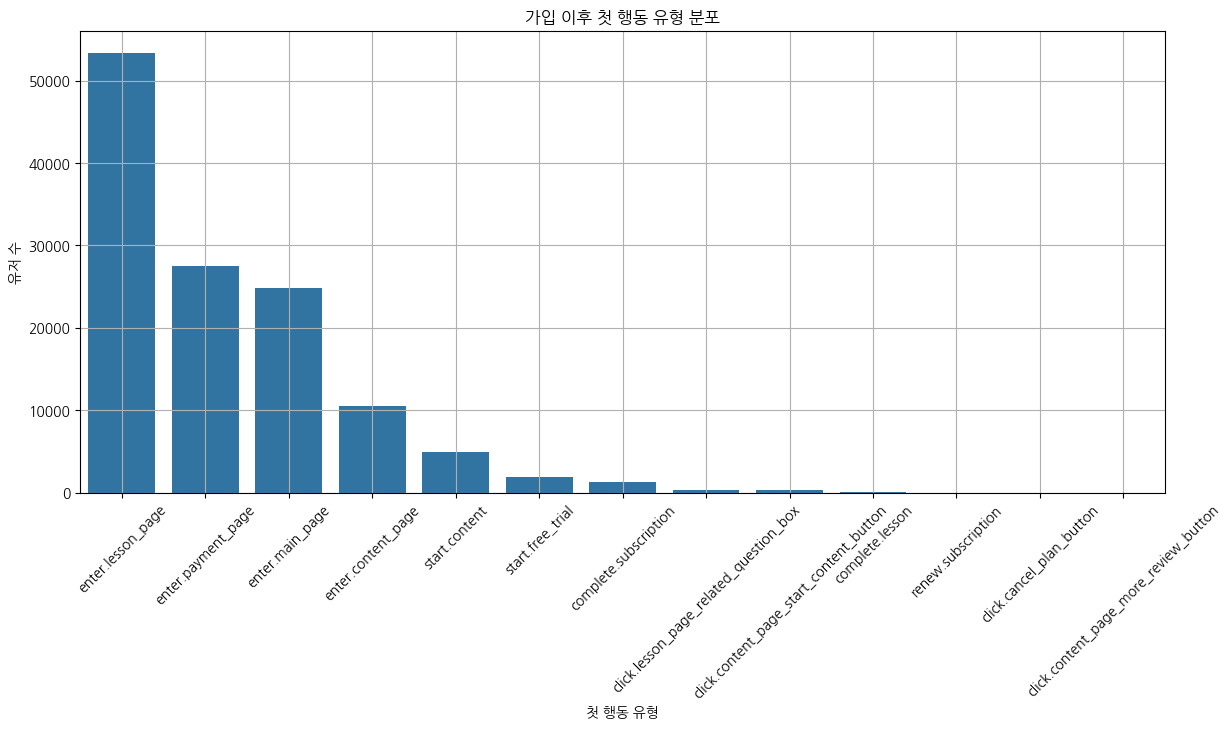

In [ ]:
# 1. Ï≤´ ÌñâÎèô Ïú†ÌòïÎ≥Ñ Ïú†Ï†Ä Ïàò ÏÑ∏Í∏∞
first_action_distribution = (
    activation_with_first_action['first_event_source']
    .value_counts()
    .rename_axis('first_event_source')
    .reset_index(name='user_count')
)

# 2. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14,6))
sns.barplot(data=first_action_distribution, x='first_event_source', y='user_count')
plt.title('Í∞ÄÏûÖ Ïù¥ÌõÑ Ï≤´ ÌñâÎèô Ïú†Ìòï Î∂ÑÌè¨')
plt.xlabel('Ï≤´ ÌñâÎèô Ïú†Ìòï')
plt.ylabel('Ïú†Ï†Ä Ïàò')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Ï≤´ ÌñâÎèô Ïú†ÌòïÎ≥Ñ ÌèâÍ∑† ÌôúÏÑ±Ìôî ÏãúÍ∞ÑÍ≥º Î†àÏä® ÏôÑÎ£åÏú® Í≥ÑÏÇ∞
first_action_summary = (
    activation_with_first_action
    .groupby('first_event_source')
    .agg(
        user_count=('user_id', 'count'),
        activation_days_avg=('activation_days', 'mean'),
        lesson_completion_rate=('lesson_completed', 'mean')
    )
    .reset_index()
)

# ÏôÑÎ£åÏú®ÏùÑ %Î°ú Î≥ÄÌôò
first_action_summary['lesson_completion_rate'] = first_action_summary['lesson_completion_rate'] * 100

# Í≤∞Í≥º Ï∂úÎ†•
print("\n--- Ï≤´ ÌñâÎèô Ïú†ÌòïÎ≥Ñ ÌôúÏÑ±Ìôî Ìå®ÌÑ¥ ---")
print(first_action_summary)


--- Ï≤´ ÌñâÎèô Ïú†ÌòïÎ≥Ñ ÌôúÏÑ±Ìôî Ìå®ÌÑ¥ ---
                         first_event_source  user_count  activation_days_avg  \
0                  click.cancel_plan_button          13             2.723338   
1     click.content_page_more_review_button           7                  NaN   
2   click.content_page_start_content_button         333            13.253794   
3    click.lesson_page_related_question_box         375            49.787756   
4                           complete.lesson          84             5.504381   
5                     complete.subscription        1317            10.607129   
6                        enter.content_page       10480            24.536066   
7                         enter.lesson_page       53379            23.182075   
8                           enter.main_page       24858            57.577522   
9                        enter.payment_page       27542            24.830325   
10                       renew.subscription          17             2.706

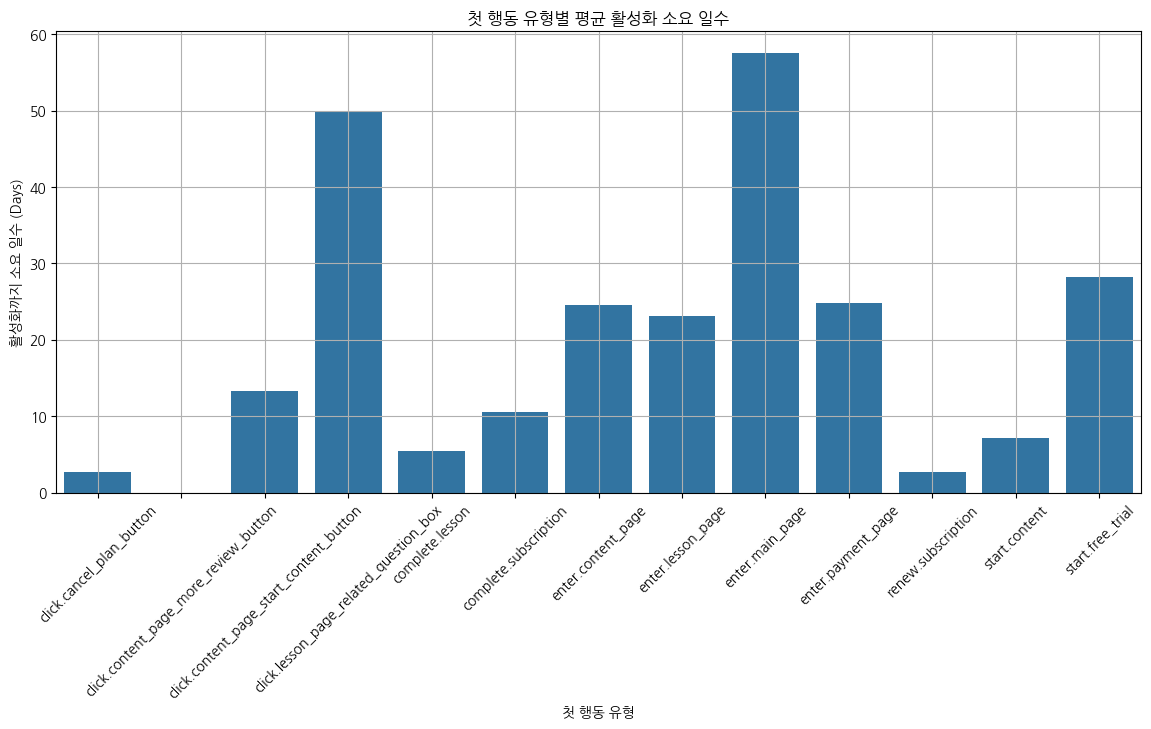

In [ ]:
# ÌôúÏÑ±ÌôîÍπåÏßÄ Í±∏Î¶∞ ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞Ñ
plt.figure(figsize=(14,6))
sns.barplot(data=first_action_summary, x='first_event_source', y='activation_days_avg')
plt.title('Ï≤´ ÌñâÎèô Ïú†ÌòïÎ≥Ñ ÌèâÍ∑† ÌôúÏÑ±Ìôî ÏÜåÏöî ÏùºÏàò')
plt.xlabel('Ï≤´ ÌñâÎèô Ïú†Ìòï')
plt.ylabel('ÌôúÏÑ±ÌôîÍπåÏßÄ ÏÜåÏöî ÏùºÏàò (Days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# click.content_page_more_review_button Ïú†Ï†Ä Ïàò
activation_with_first_action.query("first_event_source == 'click.content_page_more_review_button'")['user_id'].nunique()

7

In [ ]:
# click.content_page_more_review_button ÌñâÎèô Ïú†Ï†ÄÏùò activation_days ÌôïÏù∏
activation_with_first_action.query("first_event_source == 'click.content_page_more_review_button'")[['activation_days', 'lesson_completed']]

activation_days  lesson_completed
5545                NaN             False
6240                NaN             False
6807                NaN             False
14238               NaN             False
16287               NaN             False
77032               NaN             False
116990              NaN             False

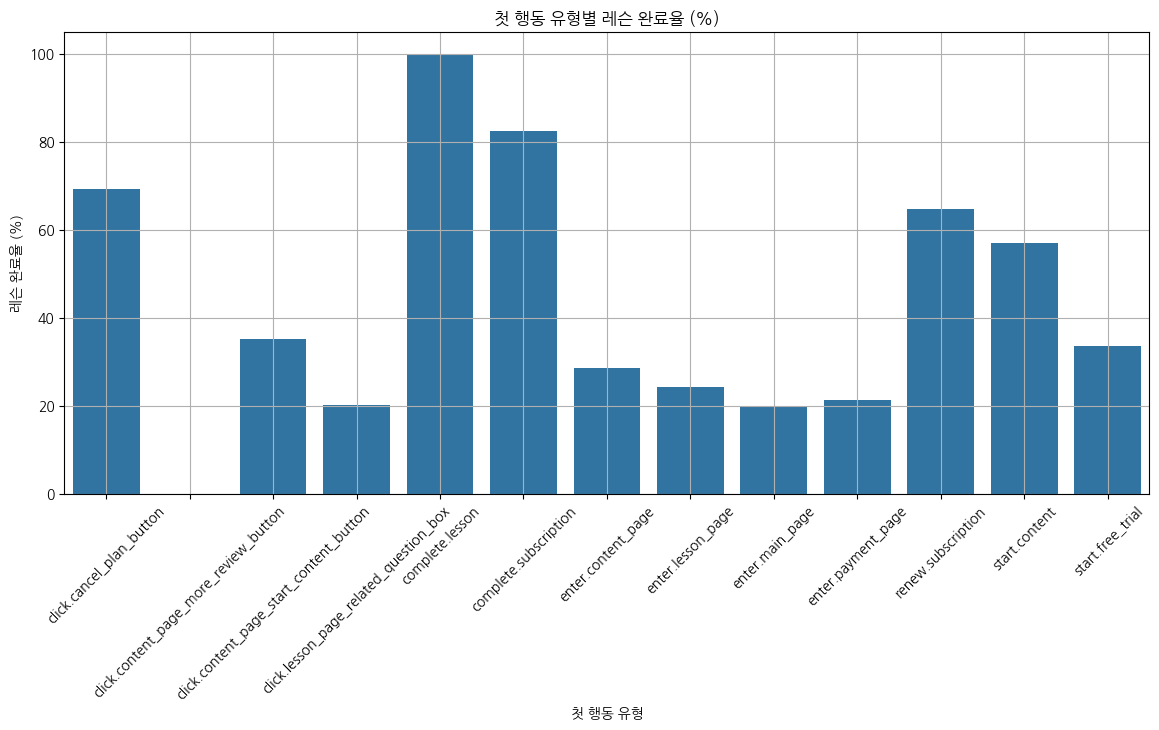

In [ ]:
# Î†àÏä® ÏôÑÎ£åÏú®
plt.figure(figsize=(14,6))
sns.barplot(data=first_action_summary, x='first_event_source', y='lesson_completion_rate')
plt.title('Ï≤´ ÌñâÎèô Ïú†ÌòïÎ≥Ñ Î†àÏä® ÏôÑÎ£åÏú® (%)')
plt.xlabel('Ï≤´ ÌñâÎèô Ïú†Ìòï')
plt.ylabel('Î†àÏä® ÏôÑÎ£åÏú® (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ï≤´ Î†àÏä® ÏãúÏûë

In [ ]:
# ÌôúÏÑ±Ìôî Ïù¥Î≤§Ìä∏ Î∞úÏÉùÏûê ÏãùÎ≥Ñ Î∞è ÌïÑÌÑ∞ÎßÅ
activation_events = enter_lesson[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'activation_time'})

# Í∞ÄÏûÖ Ï†ïÎ≥¥ÏôÄ ÌôúÏÑ±Ìôî Ïù¥Î≤§Ìä∏ Ï†ïÎ≥¥ Î≥ëÌï© (Í∞ÄÏûÖÌïú Ïú†Ï†ÄÎßå Í≥†Î†§)
signup_info = complete_signup.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
signup_info = signup_info[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'signup_time'})
merged_df = pd.merge(activation_events, signup_info, on='user_id', how='inner')

# Í∞ÄÏûÖ ÏãúÍ∞Ñ Ïù¥ÌõÑÏóê Î∞úÏÉùÌïú ÌôúÏÑ±Ìôî Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
valid_activation_events = merged_df[merged_df['activation_time'] > merged_df['signup_time']].copy()

if valid_activation_events.empty:
    print("Ï†ïÎ≥¥: ÌöåÏõêÍ∞ÄÏûÖ Ïù¥ÌõÑ Î∞úÏÉùÌïú ÌôúÏÑ±Ìôî Ïù¥Î≤§Ìä∏Í∞Ä ÏóÜÏäµÎãàÎã§.")
    n_activated = 0
    activation_rate = 0
    first_activation_df = pd.DataFrame() # Ïù¥ÌõÑ Î∂ÑÏÑù ÏúÑÌï¥ Îπà DF ÏÉùÏÑ±
else:
    # Ï≤´ ÌôúÏÑ±Ìôî ÏãúÏ†ê Í≥ÑÏÇ∞
    # ÏÇ¨Ïö©ÏûêÎ≥ÑÎ°ú Í∞ÄÏûÖ ÌõÑ Ï≤´ ÌôúÏÑ±Ìôî Ïù¥Î≤§Ìä∏ ÏãúÍ∞Ñ Í≥ÑÏÇ∞
    first_activation_df = valid_activation_events.sort_values('activation_time').drop_duplicates('user_id', keep='first')
    activated_user_ids = set(first_activation_df['user_id'].unique())
    n_activated = len(activated_user_ids)
	# --- 6. ÌôúÏÑ±ÌôîÏú® Í≥ÑÏÇ∞ ---
    activation_rate = (n_activated / total_signups * 100) if total_signups > 0 else 0
    print(f"Ï¥ù ÌöåÏõêÍ∞ÄÏûÖ Ïàò: {total_signups}")
    print(f"ÌôúÏÑ±Ìôî ÏôÑÎ£å ÏÇ¨Ïö©Ïûê Ïàò (Í∞ÄÏûÖ ÌõÑ Ï≤´ 'Î†àÏä® ÏãúÏûë' Î∞úÏÉù): {n_activated}")
    print(f"ÌôúÏÑ±ÌôîÏú®: {activation_rate:.2f}%")

Ï¥ù ÌöåÏõêÍ∞ÄÏûÖ Ïàò: 145133
ÌôúÏÑ±Ìôî ÏôÑÎ£å ÏÇ¨Ïö©Ïûê Ïàò (Í∞ÄÏûÖ ÌõÑ Ï≤´ 'Î†àÏä® ÏãúÏûë' Î∞úÏÉù): 87454
ÌôúÏÑ±ÌôîÏú®: 60.26%


In [ ]:
# ÌôúÏÑ±Ìôî ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÏÑù
if not first_activation_df.empty:
    first_activation_df['time_to_activate'] = first_activation_df['activation_time'] - first_activation_df['signup_time']

    # TimedeltaÎ•º Î∂ÑÏÑùÌïòÍ∏∞ Ïâ¨Ïö¥ Îã®ÏúÑ(Ïòà: ÏãúÍ∞Ñ)Î°ú Î≥ÄÌôò
    first_activation_df['time_to_activate_hours'] = first_activation_df['time_to_activate'].dt.total_seconds() / 3600

    print("\n--- ÌôúÏÑ±Ìôî ÏÜåÏöî ÏãúÍ∞Ñ (Í∞ÄÏûÖ ~ Ï≤´ ÌôúÏÑ±Ìôî) ÌÜµÍ≥Ñ (Îã®ÏúÑ: ÏãúÍ∞Ñ) ---")
    print(first_activation_df['time_to_activate_hours'].describe())


--- ÌôúÏÑ±Ìôî ÏÜåÏöî ÏãúÍ∞Ñ (Í∞ÄÏûÖ ~ Ï≤´ ÌôúÏÑ±Ìôî) ÌÜµÍ≥Ñ (Îã®ÏúÑ: ÏãúÍ∞Ñ) ---
count    8.745400e+04
mean     2.554300e+02
std      1.308452e+03
min      2.777778e-07
25%      3.002778e-04
50%      2.318750e-03
75%      5.260382e-02
max      1.699153e+04
Name: time_to_activate_hours, dtype: float64


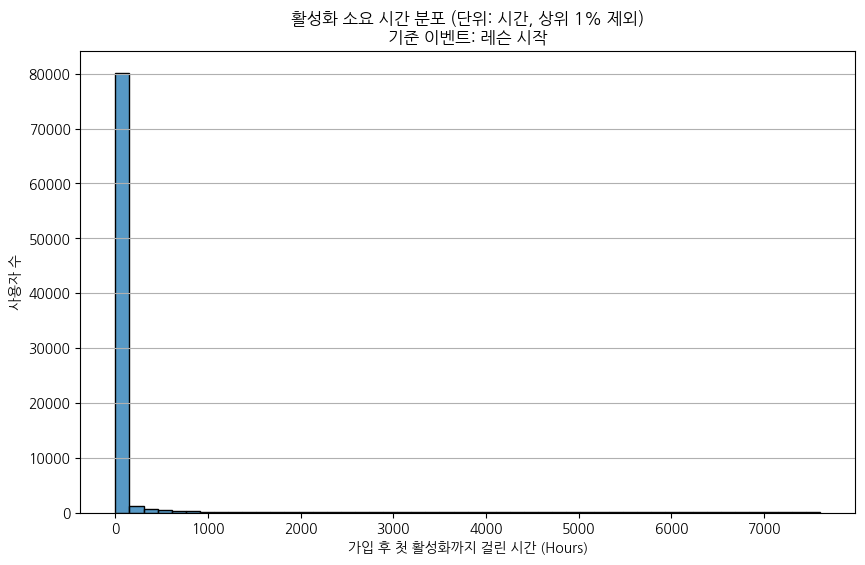

In [ ]:
# ÏãúÍ∞ÅÌôî: ÌôúÏÑ±Ìôî ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨ (ÌûàÏä§ÌÜ†Í∑∏Îû®)
plt.figure(figsize=(10, 6))
# ÎÑàÎ¨¥ ÌÅ∞ Í∞í Ï†úÏô∏ (Ïòà: ÏÉÅÏúÑ 1% Ï†úÏô∏ ÎòêÎäî ÌäπÏ†ï ÏãúÍ∞Ñ Í∏∞Ï§Ä ÏÑ§Ï†ï)
upper_limit = first_activation_df['time_to_activate_hours'].quantile(0.99)
sns.histplot(first_activation_df[first_activation_df['time_to_activate_hours'] <= upper_limit]['time_to_activate_hours'], bins=50, kde=False)
plt.title('ÌôúÏÑ±Ìôî ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨ (Îã®ÏúÑ: ÏãúÍ∞Ñ, ÏÉÅÏúÑ 1% Ï†úÏô∏)\nÍ∏∞Ï§Ä Ïù¥Î≤§Ìä∏: Î†àÏä® ÏãúÏûë')
plt.xlabel('Í∞ÄÏûÖ ÌõÑ Ï≤´ ÌôúÏÑ±ÌôîÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞Ñ (Hours)')
plt.ylabel('ÏÇ¨Ïö©Ïûê Ïàò')
plt.grid(axis='y')
plt.show()

### ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ï≤´ Î†àÏä® ÏôÑÎ£å(ÏïÑÌïò Î™®Î®ºÌä∏)

In [ ]:
# ÌôúÏÑ±Ìôî Ïù¥Î≤§Ìä∏ Î∞úÏÉùÏûê ÏãùÎ≥Ñ Î∞è ÌïÑÌÑ∞ÎßÅ
activation_events = complete_lesson[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'activation_time'})

# Í∞ÄÏûÖ Ï†ïÎ≥¥ÏôÄ ÌôúÏÑ±Ìôî Ïù¥Î≤§Ìä∏ Ï†ïÎ≥¥ Î≥ëÌï© (Í∞ÄÏûÖÌïú Ïú†Ï†ÄÎßå Í≥†Î†§)
signup_info = complete_signup.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
signup_info = signup_info[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'signup_time'})
merged_df = pd.merge(activation_events, signup_info, on='user_id', how='inner')

# Í∞ÄÏûÖ ÏãúÍ∞Ñ Ïù¥ÌõÑÏóê Î∞úÏÉùÌïú ÌôúÏÑ±Ìôî Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
valid_activation_events = merged_df[merged_df['activation_time'] > merged_df['signup_time']].copy()

if valid_activation_events.empty:
    print("Ï†ïÎ≥¥: ÌöåÏõêÍ∞ÄÏûÖ Ïù¥ÌõÑ Î∞úÏÉùÌïú ÌôúÏÑ±Ìôî Ïù¥Î≤§Ìä∏Í∞Ä ÏóÜÏäµÎãàÎã§.")
    n_activated = 0
    activation_rate = 0
    first_activation_df = pd.DataFrame() # Ïù¥ÌõÑ Î∂ÑÏÑù ÏúÑÌï¥ Îπà DF ÏÉùÏÑ±
else:
    # Ï≤´ ÌôúÏÑ±Ìôî ÏãúÏ†ê Í≥ÑÏÇ∞
    # ÏÇ¨Ïö©ÏûêÎ≥ÑÎ°ú Í∞ÄÏûÖ ÌõÑ Ï≤´ ÌôúÏÑ±Ìôî Ïù¥Î≤§Ìä∏ ÏãúÍ∞Ñ Í≥ÑÏÇ∞
    first_activation_df = valid_activation_events.sort_values('activation_time').drop_duplicates('user_id', keep='first')
    activated_user_ids = set(first_activation_df['user_id'].unique())
    n_activated = len(activated_user_ids)
	# ÌôúÏÑ±ÌôîÏú® Í≥ÑÏÇ∞
    activation_rate = (n_activated / total_signups * 100) if total_signups > 0 else 0
    print(f"Ï¥ù ÌöåÏõêÍ∞ÄÏûÖ Ïàò: {total_signups}")
    print(f"ÌôúÏÑ±Ìôî ÏôÑÎ£å ÏÇ¨Ïö©Ïûê Ïàò (Í∞ÄÏûÖ ÌõÑ Ï≤´ 'Î†àÏä® ÏôÑÎ£åÎ£å' Î∞úÏÉù): {n_activated}")
    print(f"ÌôúÏÑ±ÌôîÏú®: {activation_rate:.2f}%")

Ï¥ù ÌöåÏõêÍ∞ÄÏûÖ Ïàò: 145133
ÌôúÏÑ±Ìôî ÏôÑÎ£å ÏÇ¨Ïö©Ïûê Ïàò (Í∞ÄÏûÖ ÌõÑ Ï≤´ 'Î†àÏä® ÏôÑÎ£åÎ£å' Î∞úÏÉù): 31545
ÌôúÏÑ±ÌôîÏú®: 21.74%


In [ ]:
# ÌôúÏÑ±Ìôî ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÏÑù
if not first_activation_df.empty:
    first_activation_df['time_to_activate'] = first_activation_df['activation_time'] - first_activation_df['signup_time']

    # TimedeltaÎ•º Î∂ÑÏÑùÌïòÍ∏∞ Ïâ¨Ïö¥ Îã®ÏúÑ(Ïòà: ÏãúÍ∞Ñ)Î°ú Î≥ÄÌôò
    first_activation_df['time_to_activate_hours'] = first_activation_df['time_to_activate'].dt.total_seconds() / 3600

    print("\n--- ÌôúÏÑ±Ìôî ÏÜåÏöî ÏãúÍ∞Ñ (Í∞ÄÏûÖ ~ Ï≤´ ÌôúÏÑ±Ìôî) ÌÜµÍ≥Ñ (Îã®ÏúÑ: ÏãúÍ∞Ñ) ---")
    print(first_activation_df['time_to_activate_hours'].describe())


--- ÌôúÏÑ±Ìôî ÏÜåÏöî ÏãúÍ∞Ñ (Í∞ÄÏûÖ ~ Ï≤´ ÌôúÏÑ±Ìôî) ÌÜµÍ≥Ñ (Îã®ÏúÑ: ÏãúÍ∞Ñ) ---
count    31545.000000
mean       652.383255
std       2037.490880
min          0.001584
25%          0.098798
50%          1.781140
75%        145.053484
max      17464.473673
Name: time_to_activate_hours, dtype: float64


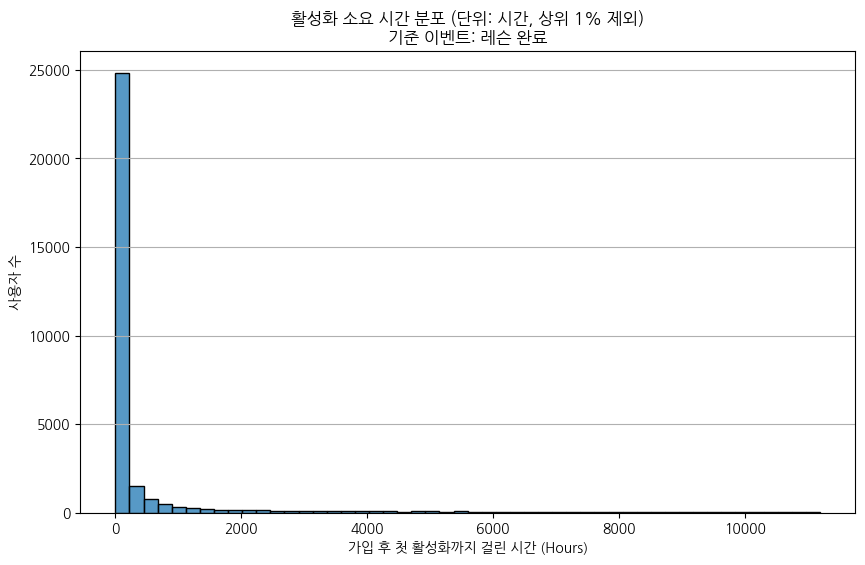

In [ ]:
# ÏãúÍ∞ÅÌôî: ÌôúÏÑ±Ìôî ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨ (ÌûàÏä§ÌÜ†Í∑∏Îû®)
plt.figure(figsize=(10, 6))
# ÎÑàÎ¨¥ ÌÅ∞ Í∞í Ï†úÏô∏ (Ïòà: ÏÉÅÏúÑ 1% Ï†úÏô∏ ÎòêÎäî ÌäπÏ†ï ÏãúÍ∞Ñ Í∏∞Ï§Ä ÏÑ§Ï†ï)
upper_limit = first_activation_df['time_to_activate_hours'].quantile(0.99)
sns.histplot(first_activation_df[first_activation_df['time_to_activate_hours'] <= upper_limit]['time_to_activate_hours'], bins=50, kde=False)
plt.title('ÌôúÏÑ±Ìôî ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨ (Îã®ÏúÑ: ÏãúÍ∞Ñ, ÏÉÅÏúÑ 1% Ï†úÏô∏)\nÍ∏∞Ï§Ä Ïù¥Î≤§Ìä∏: Î†àÏä® ÏôÑÎ£å')
plt.xlabel('Í∞ÄÏûÖ ÌõÑ Ï≤´ ÌôúÏÑ±ÌôîÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞Ñ (Hours)')
plt.ylabel('ÏÇ¨Ïö©Ïûê Ïàò')
plt.grid(axis='y')
plt.show()

In [ ]:
# 1. Í∞ïÏùò ÏôÑÍ∞ï Ïó¨Î∂Ä
completed_users = complete_lesson['user_id'].nunique()
total_users = signup_df['user_id'].nunique()

completion_rate = completed_users / total_users
print(f"Í∞ïÏùò 1Í∞ú Ïù¥ÏÉÅ ÏôÑÍ∞ïÌïú ÌöåÏõê ÎπÑÏú®: {completion_rate:.2%}")

# 2. Ïú†Ï†ÄÎ≥Ñ Î†àÏä® ÏãúÏûë/ÏôÑÍ∞ï Í∞úÏàò
start_count = enter_lesson.groupby('user_id')['lesson.id'].nunique().reset_index()
start_count.columns = ['user_id', 'num_started_lessons']

complete_count = complete_lesson.groupby('user_id')['lesson.id'].nunique().reset_index()
complete_count.columns = ['user_id', 'num_completed_lessons']

# Î≥ëÌï©ÌïòÏó¨ ÎπÑÍµê
engagement_df = start_count.merge(complete_count, on='user_id', how='outer').fillna(0)

print("ÌèâÍ∑† Î†àÏä® ÏãúÏûë Í∞úÏàò:", round(engagement_df['num_started_lessons'].mean(), 2))
print("ÌèâÍ∑† Î†àÏä® ÏôÑÎ£å Í∞úÏàò:", round(engagement_df['num_completed_lessons'].mean(), 2))

Í∞ïÏùò 1Í∞ú Ïù¥ÏÉÅ ÏôÑÍ∞ïÌïú ÌöåÏõê ÎπÑÏú®: 34.23%
ÌèâÍ∑† Î†àÏä® ÏãúÏûë Í∞úÏàò: 47.98
ÌèâÍ∑† Î†àÏä® ÏôÑÎ£å Í∞úÏàò: 46.65


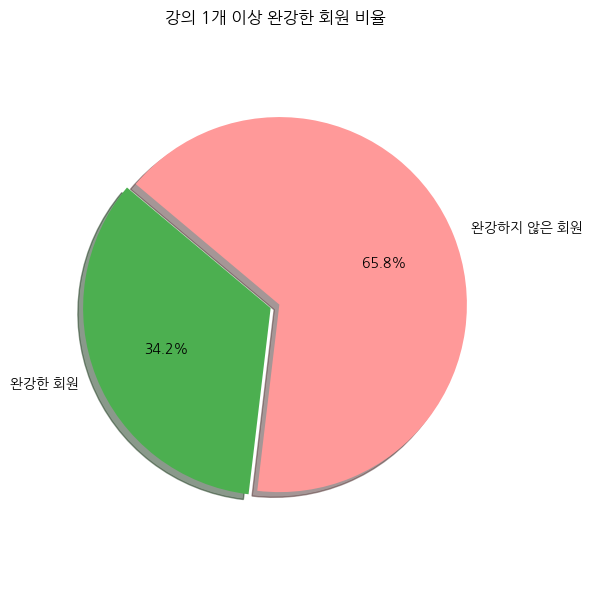

In [ ]:
completed_users = complete_lesson['user_id'].nunique()
total_users = signup_df['user_id'].nunique()
non_completed_users = total_users - completed_users

labels = ['ÏôÑÍ∞ïÌïú ÌöåÏõê', 'ÏôÑÍ∞ïÌïòÏßÄ ÏïäÏùÄ ÌöåÏõê']
sizes = [completed_users, non_completed_users]
colors = ['#4CAF50', '#FF9999']
explode = (0.05, 0)  # ÏôÑÍ∞ï ÌöåÏõê Ï™ΩÎßå ÏïΩÍ∞Ñ ÎùÑÏö∞Í∏∞

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, shadow=True)
plt.title('Í∞ïÏùò 1Í∞ú Ïù¥ÏÉÅ ÏôÑÍ∞ïÌïú ÌöåÏõê ÎπÑÏú®')
plt.axis('equal')  # ÎèôÍ∑∏ÎûÄ Ïõê Ïú†ÏßÄ
plt.tight_layout()
plt.show()

## ÏΩîÌò∏Ìä∏Î≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£å

### Í∞ÄÏûÖ Ïõî Í∏∞Ï§Ä ÏΩîÌò∏Ìä∏


--- ÏΩîÌò∏Ìä∏Î≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöî ÏùºÏàò ---
   signup_month  activation_days
0    2022-01-01        90.704107
1    2022-02-01        91.849438
2    2022-03-01        77.637462
3    2022-04-01        90.192557
4    2022-05-01        83.151933
5    2022-06-01        80.478262
6    2022-07-01        58.819771
7    2022-08-01        55.523478
8    2022-09-01        63.312174
9    2022-10-01        69.890339
10   2022-11-01        33.869881
11   2022-12-01        52.218637
12   2023-01-01        47.596214
13   2023-02-01        41.001042
14   2023-03-01        38.674135
15   2023-04-01        18.187101
16   2023-05-01        11.197216
17   2023-06-01         6.654787
18   2023-07-01         5.863105
19   2023-08-01         4.457464
20   2023-09-01         5.831019
21   2023-10-01         4.220457
22   2023-11-01         1.711980
23   2023-12-01         0.881081
24   2024-01-01         0.007273


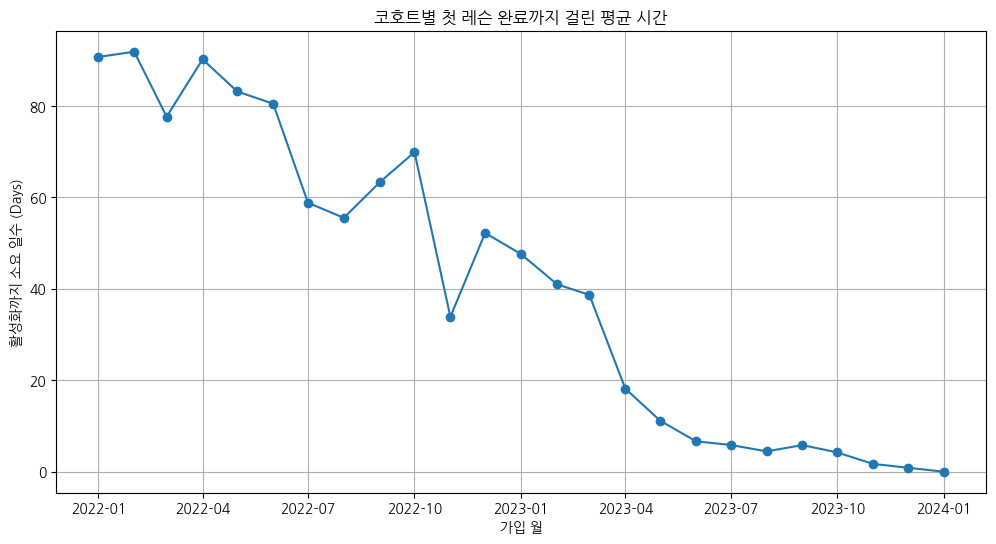

In [ ]:
# 1. Í∞ÄÏûÖÏùº Ï∂îÏ∂ú (complete_signup)
signup_df = complete_signup[['user_id', 'client_event_time']].copy()
signup_df.rename(columns={'client_event_time': 'signup_time'}, inplace=True)

# 2. Ï≤´ Î†àÏä® ÏôÑÎ£åÏùº Ï∂îÏ∂ú (complete_lesson)
lesson_complete_df = complete_lesson[['user_id', 'client_event_time']].copy()
lesson_complete_df.rename(columns={'client_event_time': 'first_lesson_complete_time'}, inplace=True)
lesson_complete_df = (
    lesson_complete_df
    .sort_values('first_lesson_complete_time')
    .groupby('user_id')
    .first()
    .reset_index()
)

# 3. Í∞ÄÏûÖÍ≥º Ï≤´ Î†àÏä® ÏôÑÎ£å Î≥ëÌï©
activation_df = signup_df.merge(lesson_complete_df, on='user_id', how='left')

# 4. ÌôúÏÑ±ÌôîÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (Îã®ÏúÑ: Ïùº)
activation_df['activation_days'] = (activation_df['first_lesson_complete_time'] - activation_df['signup_time']).dt.total_seconds() / (60*60*24)

# 5. Í∞ÄÏûÖ Ïõî(ÏΩîÌò∏Ìä∏) Ï∂îÍ∞Ä
activation_df['signup_month'] = activation_df['signup_time'].dt.to_period('M').dt.to_timestamp()

# 6. ÏΩîÌò∏Ìä∏Î≥Ñ ÌèâÍ∑† ÌôúÏÑ±Ìôî ÏãúÍ∞Ñ Í≥ÑÏÇ∞
cohort_activation = (
    activation_df
    .groupby('signup_month')['activation_days']
    .mean()
    .reset_index()
)

# 7. Í≤∞Í≥º Ï∂úÎ†•
print("\n--- ÏΩîÌò∏Ìä∏Î≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöî ÏùºÏàò ---")
print(cohort_activation)

# 8. (ÏÑ†ÌÉù) ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,6))
plt.plot(cohort_activation['signup_month'], cohort_activation['activation_days'], marker='o')
plt.title('ÏΩîÌò∏Ìä∏Î≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÍπåÏßÄ Í±∏Î¶∞ ÌèâÍ∑† ÏãúÍ∞Ñ')
plt.xlabel('Í∞ÄÏûÖ Ïõî')
plt.ylabel('ÌôúÏÑ±ÌôîÍπåÏßÄ ÏÜåÏöî ÏùºÏàò (Days)')
plt.grid(True)
plt.show()

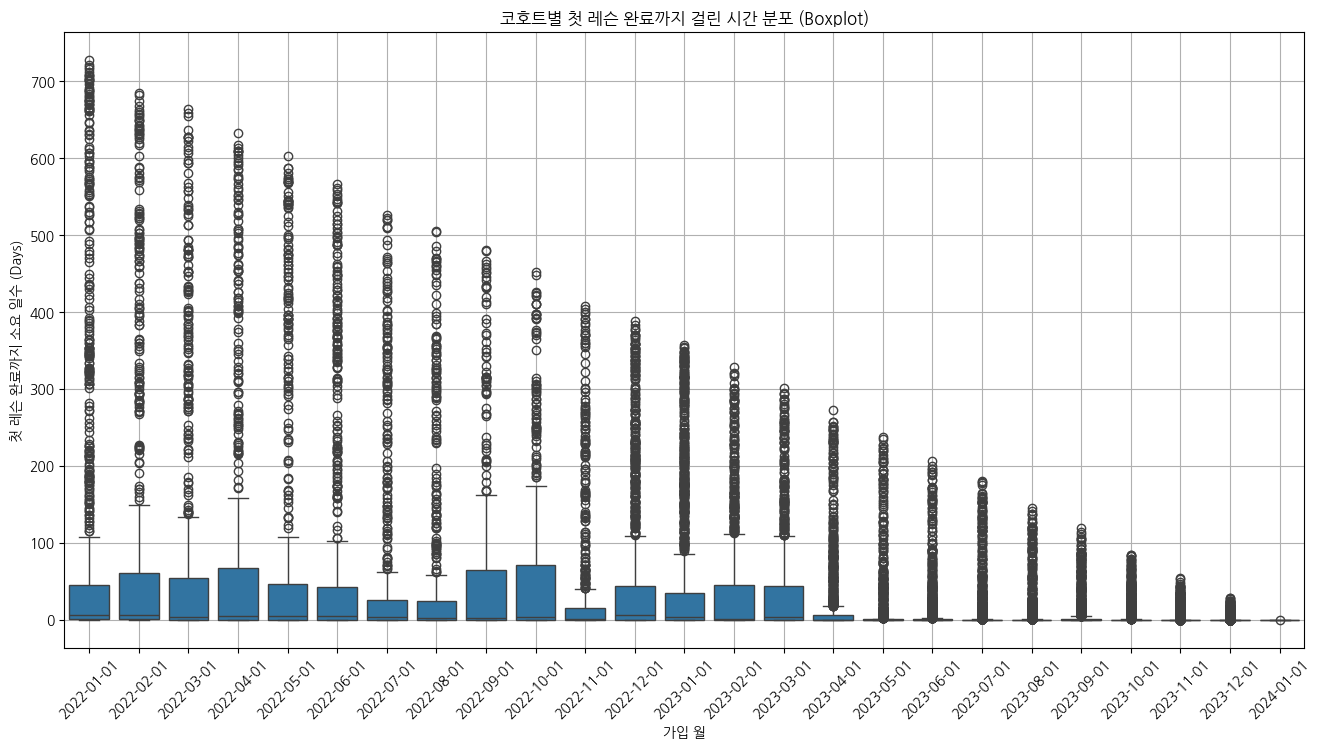

In [ ]:
# 1. signup_monthÏôÄ activation_daysÍ∞Ä ÏûàÎäî activation_df ÏÇ¨Ïö©
# 2. activation_daysÍ∞Ä Ï°¥Ïû¨ÌïòÎäî(Ï¶â, Î†àÏä® ÏôÑÎ£åÌïú) Ïú†Ï†ÄÎßå ÌïÑÌÑ∞
activated_users = activation_df.dropna(subset=['activation_days'])

# 3. xÏ∂ïÏóê ÏÇ¨Ïö©Ìï† Ïõî Î¶¨Ïä§Ìä∏ (ÏãúÍ∞Ñ Ïàú Ï†ïÎ†¨)
ordered_months = activated_users['signup_month'].sort_values().drop_duplicates()

# 4. Boxplot Í∑∏Î¶¨Í∏∞ (order ÏòµÏÖò Ï∂îÍ∞Ä)
plt.figure(figsize=(16,8))
sns.boxplot(
    x='signup_month',
    y='activation_days',
    data=activated_users,
    order=ordered_months  # << Ïó¨Í∏∞ Ï∂îÍ∞Ä
)
plt.title('ÏΩîÌò∏Ìä∏Î≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞Ñ Î∂ÑÌè¨ (Boxplot)')
plt.xlabel('Í∞ÄÏûÖ Ïõî')
plt.ylabel('Ï≤´ Î†àÏä® ÏôÑÎ£åÍπåÏßÄ ÏÜåÏöî ÏùºÏàò (Days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


--- ÏΩîÌò∏Ìä∏Î≥Ñ ÏïÑÌïò Î™®Î®ºÌä∏ ÎèÑÎã¨Ïú® (%) ---
   signup_month   aha_rate
0    2022-01-01  14.453874
1    2022-02-01  15.760171
2    2022-03-01  13.263308
3    2022-04-01  12.166737
4    2022-05-01  12.272999
5    2022-06-01  12.168740
6    2022-07-01  15.038619
7    2022-08-01  18.538167
8    2022-09-01  14.028533
9    2022-10-01  13.046544
10   2022-11-01  24.313267
11   2022-12-01  14.903676
12   2023-01-01  14.027357
13   2023-02-01  15.019443
14   2023-03-01  12.384800
15   2023-04-01  24.571725
16   2023-05-01  29.851059
17   2023-06-01  35.475693
18   2023-07-01  36.111111
19   2023-08-01  36.157448
20   2023-09-01  29.132895
21   2023-10-01  29.751332
22   2023-11-01  34.782048
23   2023-12-01  27.605634
24   2024-01-01   9.803922


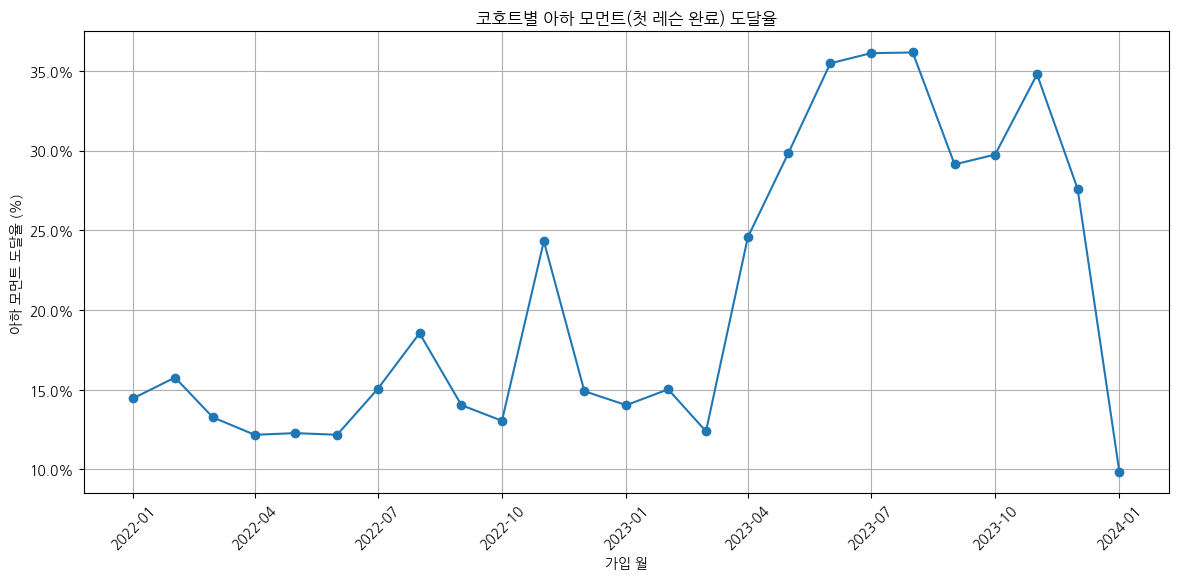

In [ ]:
# 1. Î†àÏä® ÏôÑÎ£å Ïó¨Î∂Ä Ïª¨Îüº Ï∂îÍ∞Ä
activation_df['lesson_completed'] = ~activation_df['activation_days'].isna()

# 2. ÏΩîÌò∏Ìä∏Î≥Ñ Í∞ÄÏûÖÏûê Ïàò, Î†àÏä® ÏôÑÎ£åÏûê Ïàò ÏßëÍ≥Ñ
cohort_aha_rate = (
    activation_df
    .groupby('signup_month')
    .agg(
        total_users=('user_id', 'count'),
        completed_users=('lesson_completed', 'sum')
    )
    .reset_index()
)

# 3. ÏïÑÌïò Î™®Î®ºÌä∏ ÎèÑÎã¨Ïú® (%) Í≥ÑÏÇ∞
cohort_aha_rate['aha_rate'] = 100 * (cohort_aha_rate['completed_users'] / cohort_aha_rate['total_users'])

# 4. Í≤∞Í≥º Ï∂úÎ†•
print("\n--- ÏΩîÌò∏Ìä∏Î≥Ñ ÏïÑÌïò Î™®Î®ºÌä∏ ÎèÑÎã¨Ïú® (%) ---")
print(cohort_aha_rate[['signup_month', 'aha_rate']])

# 5. ÏãúÍ∞ÅÌôî
import matplotlib.ticker as mtick

plt.figure(figsize=(14,6))
plt.plot(cohort_aha_rate['signup_month'], cohort_aha_rate['aha_rate'], marker='o')
plt.title('ÏΩîÌò∏Ìä∏Î≥Ñ ÏïÑÌïò Î™®Î®ºÌä∏(Ï≤´ Î†àÏä® ÏôÑÎ£å) ÎèÑÎã¨Ïú®')
plt.xlabel('Í∞ÄÏûÖ Ïõî')
plt.ylabel('ÏïÑÌïò Î™®Î®ºÌä∏ ÎèÑÎã¨Ïú® (%)')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())  # yÏ∂ïÏùÑ %Î°ú
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


--- ÏΩîÌò∏Ìä∏Î≥Ñ Î†àÏä® ÏôÑÎ£å Ïã§Ìå®Ïú® (%) ---
   signup_month  failure_rate
0    2022-01-01     85.546126
1    2022-02-01     84.239829
2    2022-03-01     86.736692
3    2022-04-01     87.833263
4    2022-05-01     87.727001
5    2022-06-01     87.831260
6    2022-07-01     84.961381
7    2022-08-01     81.461833
8    2022-09-01     85.971467
9    2022-10-01     86.953456
10   2022-11-01     75.686733
11   2022-12-01     85.096324
12   2023-01-01     85.972643
13   2023-02-01     84.980557
14   2023-03-01     87.615200
15   2023-04-01     75.428275
16   2023-05-01     70.148941
17   2023-06-01     64.524307
18   2023-07-01     63.888889
19   2023-08-01     63.842552
20   2023-09-01     70.867105
21   2023-10-01     70.248668
22   2023-11-01     65.217952
23   2023-12-01     72.394366
24   2024-01-01     90.196078


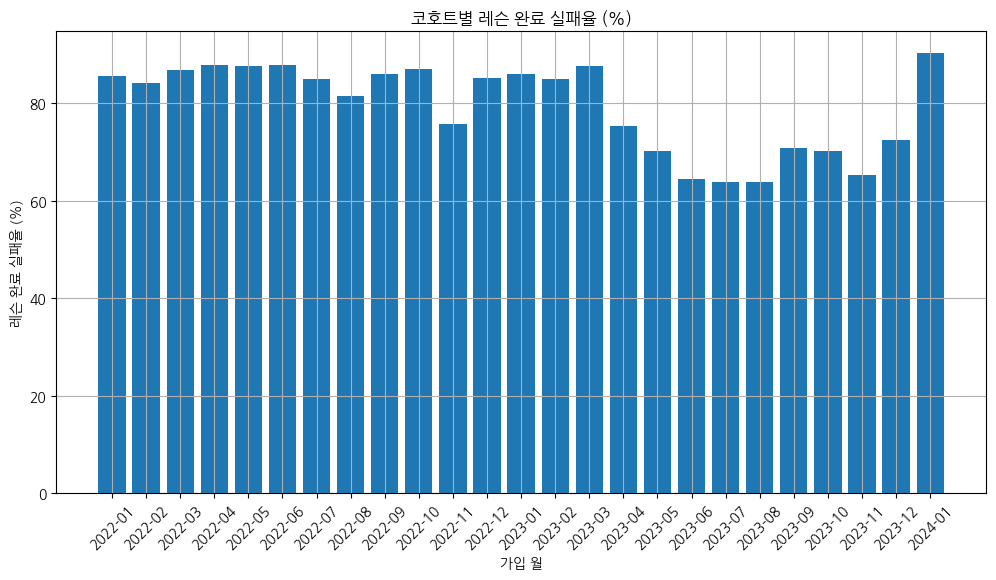

In [ ]:
# 1. Î†àÏä® ÏôÑÎ£å Ïó¨Î∂Ä Ïª¨Îüº Ï∂îÍ∞Ä
activation_df['lesson_completed'] = ~activation_df['activation_days'].isna()

# 2. ÏΩîÌò∏Ìä∏Î≥Ñ Ïã§Ìå®Ïú® Í≥ÑÏÇ∞
cohort_failure = (
    activation_df
    .groupby('signup_month')
    .agg(
        total_users=('user_id', 'count'),
        completed_users=('lesson_completed', 'sum')
    )
    .reset_index()
)

# 3. Ïã§Ìå®Ïú®(%) Ï∂îÍ∞Ä
cohort_failure['failure_rate'] = 100 * (1 - cohort_failure['completed_users'] / cohort_failure['total_users'])

# 4. Í≤∞Í≥º Ï∂úÎ†•
print("\n--- ÏΩîÌò∏Ìä∏Î≥Ñ Î†àÏä® ÏôÑÎ£å Ïã§Ìå®Ïú® (%) ---")
print(cohort_failure[['signup_month', 'failure_rate']])

# 5. (ÏÑ†ÌÉù) ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,6))
plt.bar(cohort_failure['signup_month'].dt.strftime('%Y-%m'), cohort_failure['failure_rate'])
plt.title('ÏΩîÌò∏Ìä∏Î≥Ñ Î†àÏä® ÏôÑÎ£å Ïã§Ìå®Ïú® (%)')
plt.xlabel('Í∞ÄÏûÖ Ïõî')
plt.ylabel('Î†àÏä® ÏôÑÎ£å Ïã§Ìå®Ïú® (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂Ä Í∏∞Ï§Ä ÏΩîÌò∏Ìä∏

In [ ]:
# Î¨¥Î£åÏ≤¥Ìóò ÏãúÏûëÌïú Ïú†Ï†Ä Î™©Î°ù
free_trial_users = free_trial['user_id'].unique()

# activation_dfÏóê Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂Ä Ïª¨Îüº Ï∂îÍ∞Ä
activation_df['is_free_trial'] = activation_df['user_id'].isin(free_trial_users)

# Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂ÄÎ≥Ñ ÌôúÏÑ±Ìôî ÏÜåÏöî ÏãúÍ∞Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
trial_vs_nontrial = (
    activation_df[~activation_df['activation_days'].isna()]  # Î†àÏä® ÏôÑÎ£åÌïú Ïú†Ï†ÄÎßå
    .groupby('is_free_trial')['activation_days']
    .mean()
    .reset_index()
)

print("\n--- Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂ÄÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöî ÏùºÏàò ---")
print(trial_vs_nontrial)

# Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂ÄÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÏú® Í≥ÑÏÇ∞
trial_vs_nontrial_rate = (
    activation_df
    .groupby('is_free_trial')
    .agg(
        total_users=('user_id', 'count'),
        completed_users=('lesson_completed', 'sum')
    )
    .reset_index()
)

trial_vs_nontrial_rate['completion_rate'] = 100 * (trial_vs_nontrial_rate['completed_users'] / trial_vs_nontrial_rate['total_users'])

print("\n--- Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂ÄÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÏú® (%) ---")
print(trial_vs_nontrial_rate[['is_free_trial', 'completion_rate']])


--- Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂ÄÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöî ÏùºÏàò ---
   is_free_trial  activation_days
0          False        24.530439
1           True        41.971243

--- Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂ÄÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÏú® (%) ---
   is_free_trial  completion_rate
0          False        20.445165
1           True        33.533729


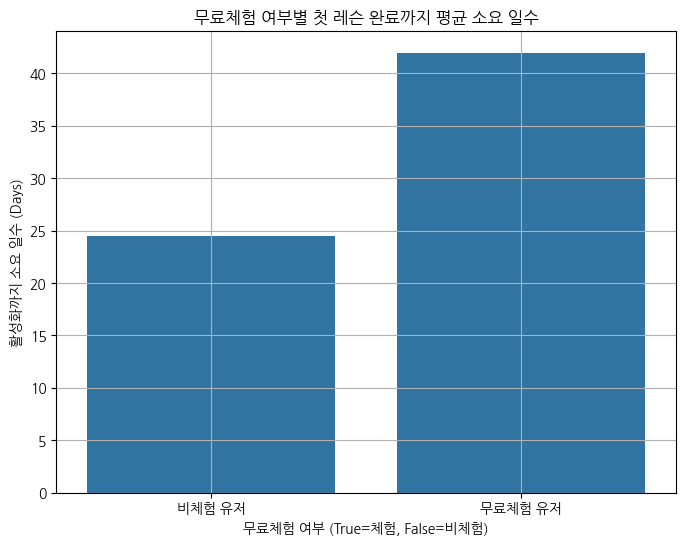

In [ ]:
# Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂ÄÎ≥Ñ ÌôúÏÑ±Ìôî ÏÜåÏöî ÏãúÍ∞Ñ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,6))
sns.barplot(x='is_free_trial', y='activation_days', data=trial_vs_nontrial)
plt.title('Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂ÄÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöî ÏùºÏàò')
plt.xlabel('Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂Ä (True=Ï≤¥Ìóò, False=ÎπÑÏ≤¥Ìóò)')
plt.ylabel('ÌôúÏÑ±ÌôîÍπåÏßÄ ÏÜåÏöî ÏùºÏàò (Days)')
plt.xticks([0,1], ['ÎπÑÏ≤¥Ìóò Ïú†Ï†Ä', 'Î¨¥Î£åÏ≤¥Ìóò Ïú†Ï†Ä'])  # xÏ∂ï ÎùºÎ≤® ÏàòÏ†ï
plt.grid(True)
plt.show()

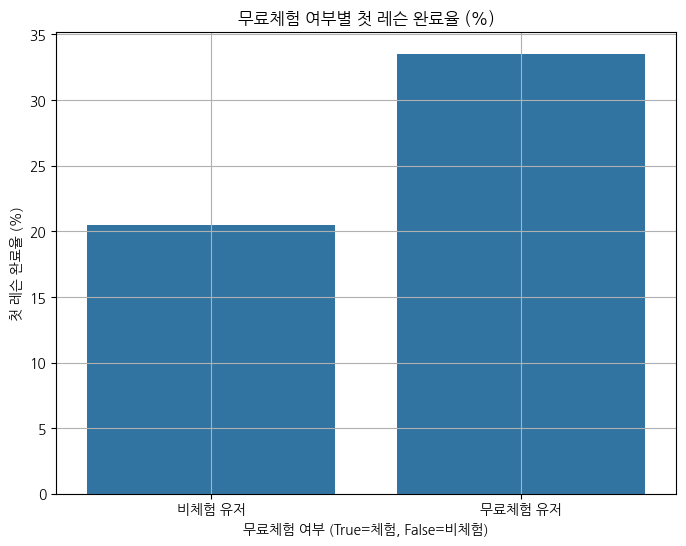

In [ ]:
# Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂ÄÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÏú® ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,6))
sns.barplot(x='is_free_trial', y='completion_rate', data=trial_vs_nontrial_rate)
plt.title('Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂ÄÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÏú® (%)')
plt.xlabel('Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂Ä (True=Ï≤¥Ìóò, False=ÎπÑÏ≤¥Ìóò)')
plt.ylabel('Ï≤´ Î†àÏä® ÏôÑÎ£åÏú® (%)')
plt.xticks([0,1], ['ÎπÑÏ≤¥Ìóò Ïú†Ï†Ä', 'Î¨¥Î£åÏ≤¥Ìóò Ïú†Ï†Ä'])  # xÏ∂ï ÎùºÎ≤® ÏàòÏ†ï
plt.grid(True)
plt.show()

In [ ]:
# Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂Ä + ÏõîÎ≥Ñ ÌèâÍ∑† ÌôúÏÑ±Ìôî ÏãúÍ∞Ñ
monthly_activation = (
    activation_df[~activation_df['activation_days'].isna()]
    .groupby(['signup_month', 'is_free_trial'])['activation_days']
    .mean()
    .reset_index()
)

# Î™®Îì† Ï°∞Ìï© ÎßåÎì§Í∏∞ (signup_month x is_free_trial)
all_months = activation_df['signup_month'].drop_duplicates()
full_index = pd.MultiIndex.from_product([all_months, [True, False]], names=['signup_month', 'is_free_trial'])

# full indexÎ°ú Ïû¨Íµ¨ÏÑ±
monthly_activation = monthly_activation.set_index(['signup_month', 'is_free_trial']).reindex(full_index).reset_index()

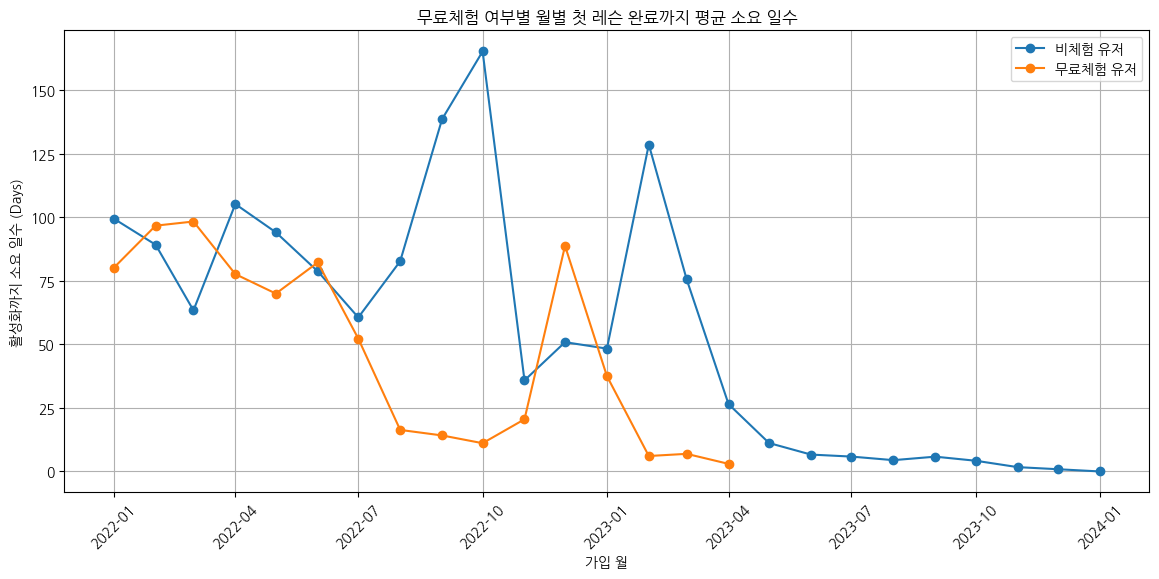

In [ ]:
# Î¨¥Î£åÏ≤¥Ìóò Ïú†Ï†Ä / ÎπÑÏ≤¥Ìóò Ïú†Ï†Ä ÎÇòÎàÑÍ∏∞ + Ï†ïÎ†¨!!
free_trial_data = monthly_activation[monthly_activation['is_free_trial'] == True].sort_values('signup_month')
non_trial_data = monthly_activation[monthly_activation['is_free_trial'] == False].sort_values('signup_month')

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14,6))

# ÎπÑÏ≤¥Ìóò Ïú†Ï†Ä (ÌååÎûÄÏÉâ)
plt.plot(non_trial_data['signup_month'], non_trial_data['activation_days'], marker='o', label='ÎπÑÏ≤¥Ìóò Ïú†Ï†Ä')

# Î¨¥Î£åÏ≤¥Ìóò Ïú†Ï†Ä (Ï£ºÌô©ÏÉâ)
plt.plot(free_trial_data['signup_month'], free_trial_data['activation_days'], marker='o', label='Î¨¥Î£åÏ≤¥Ìóò Ïú†Ï†Ä')

plt.title('Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂ÄÎ≥Ñ ÏõîÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöî ÏùºÏàò')
plt.xlabel('Í∞ÄÏûÖ Ïõî')
plt.ylabel('ÌôúÏÑ±ÌôîÍπåÏßÄ ÏÜåÏöî ÏùºÏàò (Days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# 1. Î¨¥Î£åÏ≤¥Ìóò Ïú†Ï†ÄÎßå ÌïÑÌÑ∞ÎßÅ
free_trial_users_df = activation_df[activation_df['is_free_trial'] == True]

# 2. Î¨¥Î£åÏ≤¥Ìóò Ïú†Ï†Ä ÏõîÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò ÏßëÍ≥Ñ
free_trial_monthly_counts = (
    free_trial_users_df
    .groupby('signup_month')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'free_trial_user_count'})
)

# Í≤∞Í≥º Ï∂úÎ†•
print("\n--- ÏõîÎ≥Ñ Î¨¥Î£åÏ≤¥Ìóò Ïú†Ï†Ä Ïàò ---")
print(free_trial_monthly_counts)


--- ÏõîÎ≥Ñ Î¨¥Î£åÏ≤¥Ìóò Ïú†Ï†Ä Ïàò ---
   signup_month  free_trial_user_count
0    2022-01-01                   2048
1    2022-02-01                   1364
2    2022-03-01                   1822
3    2022-04-01                   1683
4    2022-05-01                   1804
5    2022-06-01                   1868
6    2022-07-01                    569
7    2022-08-01                    291
8    2022-09-01                    291
9    2022-10-01                    263
10   2022-11-01                    124
11   2022-12-01                     48
12   2023-01-01                    122
13   2023-02-01                    810
14   2023-03-01                    634
15   2023-04-01                    564


In [ ]:
# Î†àÏä® ÏôÑÎ£å Ïó¨Î∂Ä Ïª¨Îüº Îã§Ïãú Ï∂îÍ∞Ä (ÌòπÏãú Îπ†Ï°åÏùÑÍπåÎ¥ê)
activation_df['lesson_completed'] = ~activation_df['activation_days'].isna()

# Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂Ä + Í∞ÄÏûÖÏõîÎ≥Ñ Ï¥ù Ïú†Ï†ÄÏàò, ÏôÑÎ£å Ïú†Ï†ÄÏàò ÏßëÍ≥Ñ
monthly_completion = (
    activation_df
    .groupby(['signup_month', 'is_free_trial'])
    .agg(
        total_users=('user_id', 'count'),
        completed_users=('lesson_completed', 'sum')
    )
    .reset_index()
)

# ÏôÑÎ£åÏú®(%) Ï∂îÍ∞Ä
monthly_completion['completion_rate'] = 100 * (monthly_completion['completed_users'] / monthly_completion['total_users'])


In [ ]:
# signup_month x is_free_trial Ï°∞Ìï©ÏùÑ ÏôÑÏÑ±
full_index = pd.MultiIndex.from_product(
    [activation_df['signup_month'].drop_duplicates().sort_values(), [True, False]],
    names=['signup_month', 'is_free_trial']
)

# reindex
monthly_completion = monthly_completion.set_index(['signup_month', 'is_free_trial']).reindex(full_index).reset_index()

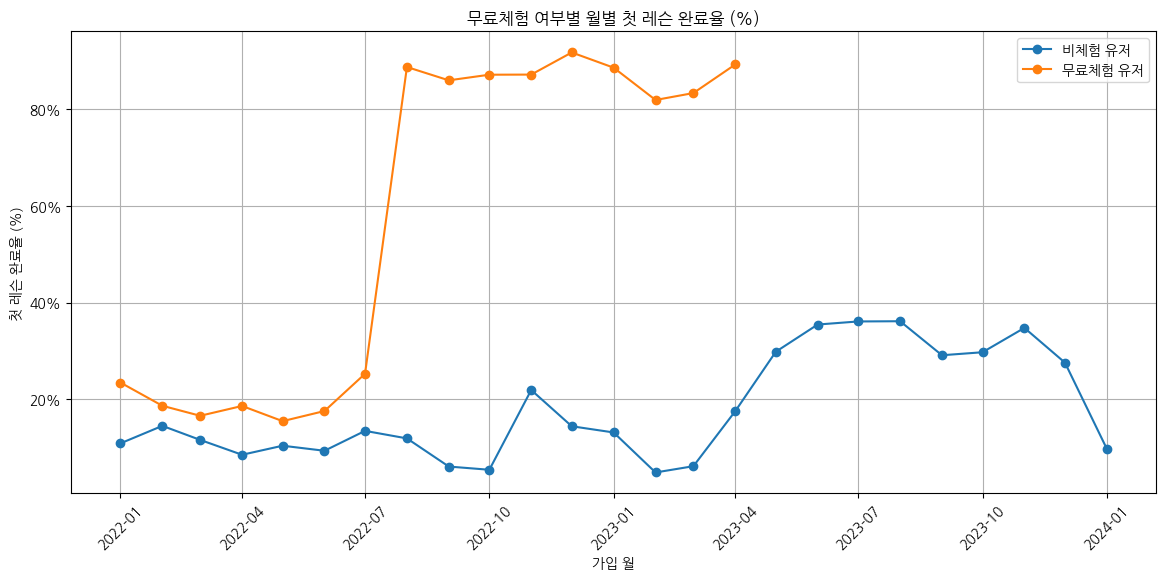

In [ ]:
# Î¨¥Î£åÏ≤¥Ìóò / ÎπÑÏ≤¥Ìóò Ïú†Ï†Ä Îç∞Ïù¥ÌÑ∞ Îî∞Î°ú Î∂ÑÎ¶¨ + Ï†ïÎ†¨
free_trial_completion = monthly_completion[monthly_completion['is_free_trial'] == True].sort_values('signup_month')
non_trial_completion = monthly_completion[monthly_completion['is_free_trial'] == False].sort_values('signup_month')

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14,6))

# ÎπÑÏ≤¥Ìóò Ïú†Ï†Ä (ÌååÎûÄÏÉâ)
plt.plot(non_trial_completion['signup_month'], non_trial_completion['completion_rate'], marker='o', label='ÎπÑÏ≤¥Ìóò Ïú†Ï†Ä')

# Î¨¥Î£åÏ≤¥Ìóò Ïú†Ï†Ä (Ï£ºÌô©ÏÉâ)
plt.plot(free_trial_completion['signup_month'], free_trial_completion['completion_rate'], marker='o', label='Î¨¥Î£åÏ≤¥Ìóò Ïú†Ï†Ä')

plt.title('Î¨¥Î£åÏ≤¥Ìóò Ïó¨Î∂ÄÎ≥Ñ ÏõîÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÏú® (%)')
plt.xlabel('Í∞ÄÏûÖ Ïõî')
plt.ylabel('Ï≤´ Î†àÏä® ÏôÑÎ£åÏú® (%)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid(True)
plt.legend()
plt.show()

### Ï≤´ ÏΩòÌÖêÏ∏† ÎÇúÏù¥ÎèÑ Í∏∞Ï§Ä ÏΩîÌò∏Ìä∏


--- ÎÇúÏù¥ÎèÑÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöî ÏùºÏàò ---
  content.difficulty  activation_days
0           advanced        30.571523
1           beginner        26.331719
2               hard        65.133598
3       intermediate        32.213166


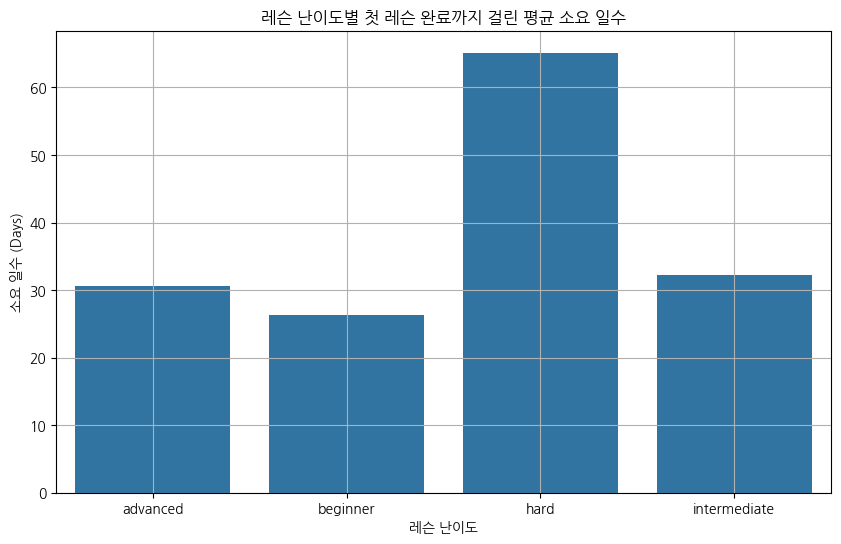

In [ ]:
# 1. complete_lessonÏóêÏÑú user_id, content_id, client_event_time Ï∂îÏ∂ú
lesson_complete_info = complete_lesson[['user_id', 'content.id', 'client_event_time']].copy()

# 2. start_contentÏóêÏÑú content_id, content.difficulty Ï∂îÏ∂ú
content_info = start_content[['content.id', 'content.difficulty']].drop_duplicates()

# 3. complete_lessonÏóê content.difficulty Îß§Ïπ≠
lesson_complete_with_difficulty = lesson_complete_info.merge(content_info, on='content.id', how='left')

# 4. Ïú†Ï†ÄÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÎßå Ï∂îÏ∂ú
first_complete = (
    lesson_complete_with_difficulty
    .sort_values('client_event_time')
    .groupby('user_id')
    .first()
    .reset_index()
)

# 5. Í∞ÄÏûÖ Îç∞Ïù¥ÌÑ∞ÏôÄ Î≥ëÌï© (activation_df Í∏∞Ï§Ä)
activation_with_difficulty = activation_df.merge(first_complete[['user_id', 'content.difficulty']], on='user_id', how='left')

# 6. ÎÇúÏù¥ÎèÑÎ≥Ñ ÌôúÏÑ±Ìôî ÏÜåÏöî ÏãúÍ∞Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
difficulty_activation = (
    activation_with_difficulty[~activation_with_difficulty['activation_days'].isna()]  # Î†àÏä® ÏôÑÎ£åÌïú Ïú†Ï†ÄÎßå
    .groupby('content.difficulty')['activation_days']
    .mean()
    .reset_index()
)

print("\n--- ÎÇúÏù¥ÎèÑÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöî ÏùºÏàò ---")
print(difficulty_activation)

# 7. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,6))
sns.barplot(x='content.difficulty', y='activation_days', data=difficulty_activation)
plt.title('Î†àÏä® ÎÇúÏù¥ÎèÑÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÍπåÏßÄ Í±∏Î¶∞ ÌèâÍ∑† ÏÜåÏöî ÏùºÏàò')
plt.xlabel('Î†àÏä® ÎÇúÏù¥ÎèÑ')
plt.ylabel('ÏÜåÏöî ÏùºÏàò (Days)')
plt.grid(True)
plt.show()


--- ÎÇúÏù¥ÎèÑÎ≥Ñ Î†àÏä® ÏôÑÎ£åÏú® ---
  content.difficulty  start_count  complete_count  completion_rate (%)
0           advanced      7983184         2273564                 28.5
1           beginner      3869378         1095212                 28.3
2               hard       874923          299487                 34.2
3       intermediate     10324804         2334621                 22.6


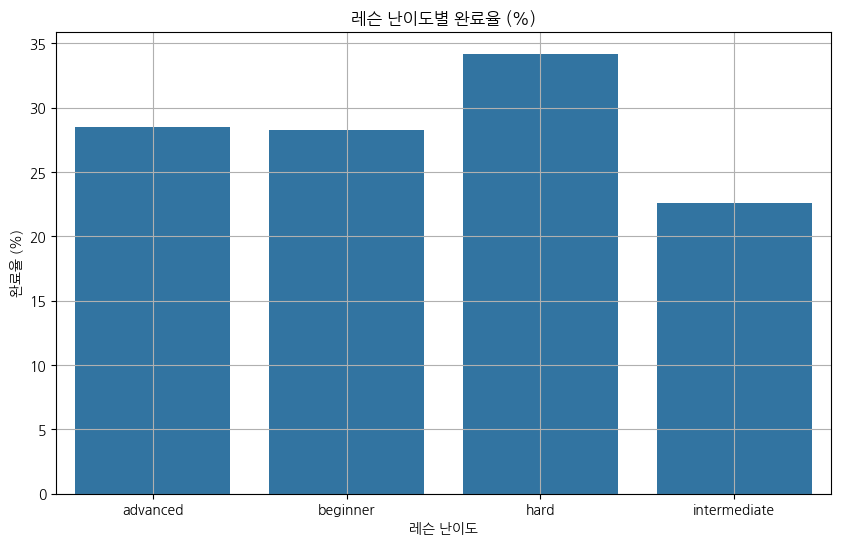

In [ ]:
# 1. lesson_start_dfÏóê content.difficulty Î∂ôÏù¥Í∏∞
lesson_start_info = enter_lesson[['user_id', 'content.id', 'lesson.id', 'client_event_time']].copy()
lesson_start_info = lesson_start_info.merge(
    start_content[['content.id', 'content.difficulty']].drop_duplicates(),
    on='content.id',
    how='left'
)

# 2. complete_lessonÏóêÎèÑ content.difficulty Î∂ôÏù¥Í∏∞
lesson_complete_info = complete_lesson[['user_id', 'content.id', 'lesson.id', 'client_event_time']].copy()
lesson_complete_info = lesson_complete_info.merge(
    start_content[['content.id', 'content.difficulty']].drop_duplicates(),
    on='content.id',
    how='left'
)

# 3. ÎÇúÏù¥ÎèÑÎ≥Ñ Î†àÏä® ÏãúÏûë Í±¥Ïàò
start_counts = lesson_start_info.groupby('content.difficulty')['lesson.id'].count().rename('start_count')

# 4. ÎÇúÏù¥ÎèÑÎ≥Ñ Î†àÏä® ÏôÑÎ£å Í±¥Ïàò
complete_counts = lesson_complete_info.groupby('content.difficulty')['lesson.id'].count().rename('complete_count')

# 5. ÎÇúÏù¥ÎèÑÎ≥Ñ ÏôÑÎ£åÏú® Í≥ÑÏÇ∞
difficulty_completion = (
    pd.concat([start_counts, complete_counts], axis=1)
    .fillna(0)
)

difficulty_completion['completion_rate (%)'] = (difficulty_completion['complete_count'] / difficulty_completion['start_count']) * 100
difficulty_completion = difficulty_completion.round(1).reset_index()

# 6. Í≤∞Í≥º Ï∂úÎ†•
print("\n--- ÎÇúÏù¥ÎèÑÎ≥Ñ Î†àÏä® ÏôÑÎ£åÏú® ---")
print(difficulty_completion)

# 7. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,6))
sns.barplot(x='content.difficulty', y='completion_rate (%)', data=difficulty_completion)
plt.title('Î†àÏä® ÎÇúÏù¥ÎèÑÎ≥Ñ ÏôÑÎ£åÏú® (%)')
plt.xlabel('Î†àÏä® ÎÇúÏù¥ÎèÑ')
plt.ylabel('ÏôÑÎ£åÏú® (%)')
plt.grid(True)
plt.show()


--- ÏõîÎ≥Ñ ÎÇúÏù¥ÎèÑÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöî ÏùºÏàò ---
   complete_month content.difficulty  activation_days
0      2022-01-01           advanced         2.618421
1      2022-01-01           beginner         2.898000
2      2022-01-01               hard         1.000000
3      2022-01-01       intermediate         3.804348
4      2022-02-01           advanced         7.027397
..            ...                ...              ...
93     2023-12-01           beginner        33.770800
94     2023-12-01               hard       312.000000
95     2023-12-01       intermediate        69.850000
96     2024-01-01           advanced              NaN
97     2024-01-01           beginner        35.200000

[98 rows x 3 columns]


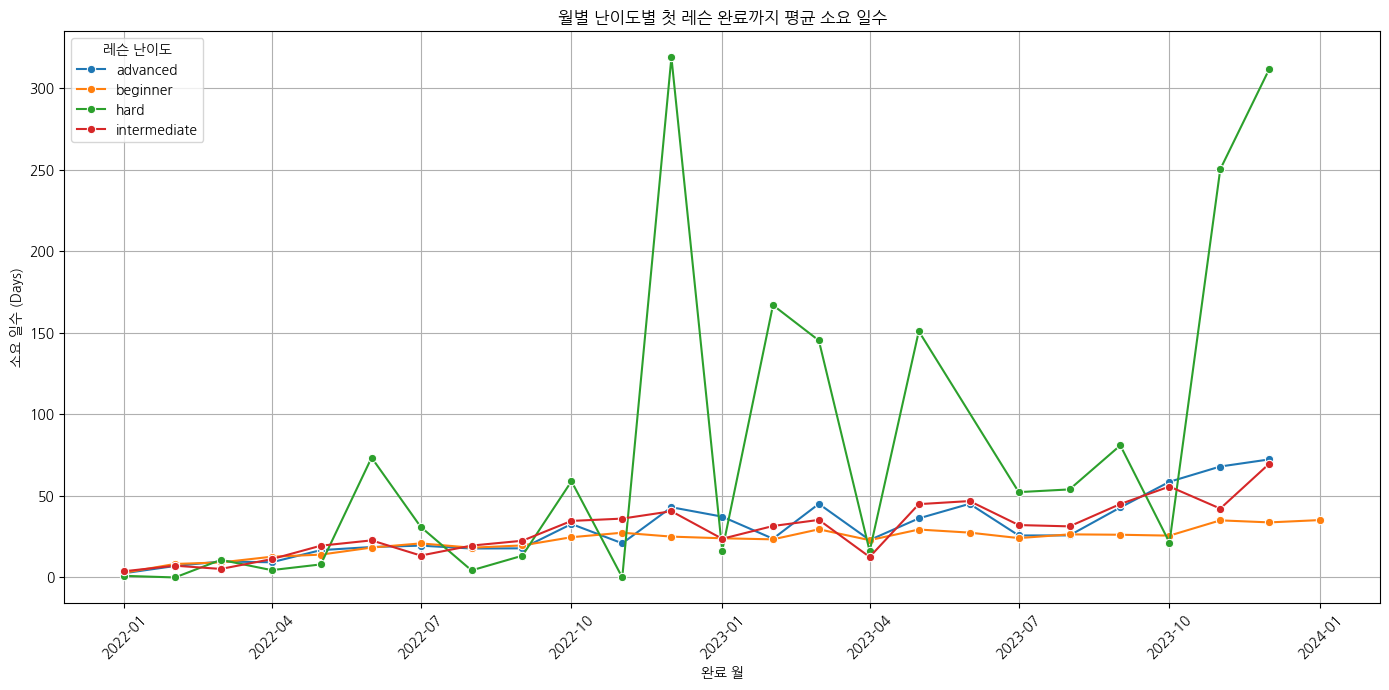

In [ ]:
# 1. complete_signupÏóêÏÑú user_id, signup_time Í∞ÄÏ†∏Ïò§Í∏∞
signup_info = complete_signup[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'signup_time'})
signup_info['signup_time'] = pd.to_datetime(signup_info['signup_time'])

# 2. complete_lessonÏóêÏÑú user_id, content.id, client_event_time Í∞ÄÏ†∏Ïò§Í∏∞
lesson_complete_info = complete_lesson[['user_id', 'content.id', 'client_event_time']].copy()
lesson_complete_info['client_event_time'] = pd.to_datetime(lesson_complete_info['client_event_time'])

# 3. content_infoÏóêÏÑú content.idÎ≥Ñ content.difficulty Í∞ÄÏ†∏Ïò§Í∏∞
content_info = start_content[['content.id', 'content.difficulty']].drop_duplicates()

# 4. Î†àÏä® ÏôÑÎ£å Îç∞Ïù¥ÌÑ∞Ïóê content.difficulty Î∂ôÏù¥Í∏∞
lesson_complete_with_difficulty = lesson_complete_info.merge(content_info, on='content.id', how='left')

# 5. ÌöåÏõêÍ∞ÄÏûÖÏãúÍ∞ÑÍ≥º Î†àÏä®ÏôÑÎ£åÏãúÍ∞Ñ Î≥ëÌï©
lesson_complete_with_signup = lesson_complete_with_difficulty.merge(signup_info, on='user_id', how='left')

# 6. activation_days Í≥ÑÏÇ∞ (ÏôÑÎ£åÏãúÍ∞Ñ - Í∞ÄÏûÖÏãúÍ∞Ñ)
lesson_complete_with_signup['activation_days'] = (lesson_complete_with_signup['client_event_time'] - lesson_complete_with_signup['signup_time']).dt.days

# 7. ÏôÑÎ£å Ïõî Ïª¨Îüº Ï∂îÍ∞Ä
lesson_complete_with_signup['complete_month'] = lesson_complete_with_signup['client_event_time'].dt.to_period('M').dt.to_timestamp()

# 8. Ïú†Ï†ÄÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÎßå Ï∂îÏ∂ú
first_complete_per_user = (
    lesson_complete_with_signup
    .sort_values('client_event_time')
    .groupby('user_id')
    .first()
    .reset_index()
)

# 9. ÏõîÎ≥Ñ ÎÇúÏù¥ÎèÑÎ≥Ñ ÌèâÍ∑† activation_days
monthly_activation = (
    first_complete_per_user
    .groupby(['complete_month', 'content.difficulty'])['activation_days']
    .mean()
    .reset_index()
)

print("\n--- ÏõîÎ≥Ñ ÎÇúÏù¥ÎèÑÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöî ÏùºÏàò ---")
print(monthly_activation)

# 10. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14,7))
sns.lineplot(x='complete_month', y='activation_days', hue='content.difficulty', data=monthly_activation, marker='o')
plt.title('ÏõîÎ≥Ñ ÎÇúÏù¥ÎèÑÎ≥Ñ Ï≤´ Î†àÏä® ÏôÑÎ£åÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöî ÏùºÏàò')
plt.xlabel('ÏôÑÎ£å Ïõî')
plt.ylabel('ÏÜåÏöî ÏùºÏàò (Days)')
plt.grid(True)
plt.legend(title='Î†àÏä® ÎÇúÏù¥ÎèÑ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 1. content.difficulty Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
content_info = start_content[['content.id', 'content.difficulty']].drop_duplicates()

# 2. Î†àÏä® ÏãúÏûë/ÏôÑÎ£å Ï†ïÎ≥¥ Î≥µÏÇ¨
lesson_start_info = enter_lesson[['user_id', 'content.id', 'lesson.id', 'client_event_time']].copy()
lesson_complete_info = complete_lesson[['user_id', 'content.id', 'lesson.id', 'client_event_time']].copy()

# 3. content.difficulty Î∂ôÏù¥Í∏∞
lesson_start_info = lesson_start_info.merge(content_info, on='content.id', how='left')

# 4. ÏãúÏûë Ïõî Ï∂îÍ∞Ä
lesson_start_info['start_month'] = lesson_start_info['client_event_time'].dt.to_period('M').dt.to_timestamp()

# 5. 'ÏôÑÎ£å Ïó¨Î∂Ä'Î•º Ï†ïÌôïÌïòÍ≤å Îß§Ïπ≠ (user_id + lesson.id ÎèôÏãúÏóê)
# ÏôÑÎ£åÌïú Î†àÏä®ÏùÑ (user_id, lesson.id) ÌäúÌîåÎ°ú ÎßåÎì§Í∏∞
completed_lessons = set(zip(lesson_complete_info['user_id'], lesson_complete_info['lesson.id']))

# ÏãúÏûë Î†àÏä®Ïóê ÏôÑÎ£å Ïó¨Î∂Ä Ï∂îÍ∞Ä
lesson_start_info['is_completed'] = lesson_start_info.apply(
    lambda x: (x['user_id'], x['lesson.id']) in completed_lessons,
    axis=1
)

# 6. ÏõîÎ≥Ñ + ÎÇúÏù¥ÎèÑÎ≥Ñ ÏãúÏûë/ÏôÑÎ£å Í±¥Ïàò ÏßëÍ≥Ñ
monthly_completion = (
    lesson_start_info
    .groupby(['start_month', 'content.difficulty'])
    .agg(
        start_count=('lesson.id', 'count'),
        complete_count=('is_completed', 'sum')
    )
    .reset_index()
)

# 7. ÏôÑÎ£åÏú® Í≥ÑÏÇ∞
monthly_completion['completion_rate (%)'] = (monthly_completion['complete_count'] / monthly_completion['start_count']) * 100
monthly_completion = monthly_completion.round(1)

# 8. Í≤∞Í≥º Ï∂úÎ†•
print("\n--- ÏõîÎ≥Ñ ÎÇúÏù¥ÎèÑÎ≥Ñ Î†àÏä® ÏôÑÎ£åÏú® (ÏôÑÏ†Ñ ÏàòÏ†ïÎ≥∏) ---")
print(monthly_completion)

# 9. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14,7))
sns.lineplot(x='start_month', y='completion_rate (%)', hue='content.difficulty', data=monthly_completion, marker='o')
plt.title('ÏõîÎ≥Ñ ÎÇúÏù¥ÎèÑÎ≥Ñ Î†àÏä® ÏôÑÎ£åÏú® (%)')
plt.xlabel('ÏãúÏûë Ïõî')
plt.ylabel('ÏôÑÎ£åÏú® (%)')
plt.grid(True)
plt.legend(title='Î†àÏä® ÎÇúÏù¥ÎèÑ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

MemoryError: 

## ÌôúÏÑ±Ìôî Ïã§Ìå® Ïú†Ï†Ä ÌñâÎèô Î∂ÑÏÑù

- ÌöåÏõêÍ∞ÄÏûÖÏùÄ ÌñàÏßÄÎßå Î†àÏä® ÏôÑÎ£åÎ•º ÌïòÏßÄ Î™ªÌïú Ïú†Ï†Ä

In [ ]:
# 1. ÌôúÏÑ±Ìôî Ïã§Ìå® Ïú†Ï†Ä Î¶¨Ïä§Ìä∏ Ï∂îÏ∂ú
failed_users = activation_with_first_action[activation_with_first_action['lesson_completed'] == False]['user_id'].unique()

print(f"\n--- ÌôúÏÑ±Ìôî Ïã§Ìå® Ïú†Ï†Ä Ïàò: {len(failed_users)}Î™Ö ---")


--- ÌôúÏÑ±Ìôî Ïã§Ìå® Ïú†Ï†Ä Ïàò: 113588Î™Ö ---


In [ ]:
# 2. all_eventsÏóêÏÑú Ïã§Ìå® Ïú†Ï†ÄÎì§Ïùò ÌñâÎèôÎßå Ï∂îÏ∂ú
failed_user_events = all_events[all_events['user_id'].isin(failed_users)].copy()

print(f"\n--- Ïã§Ìå® Ïú†Ï†Ä ÌñâÎèô Î°úÍ∑∏ ÏÉòÌîå ---")
print(failed_user_events.head())



--- Ïã§Ìå® Ïú†Ï†Ä ÌñâÎèô Î°úÍ∑∏ ÏÉòÌîå ---
                             user_id                client_event_time  \
3   40acc1ddfc012f3d2f58a3de95e9e748 2023-03-12 17:32:39.271000+09:00   
17  c4fc69f67c8c96458e51072b5474ff5d 2023-03-18 19:00:24.428000+09:00   
32  3275a306653a1d829e65ed680ac2c18e 2023-02-08 11:52:55.181000+09:00   
36  a2569bd2dfcec62b753eb972a9054dd0 2023-03-08 18:38:12.384000+09:00   
37  b5be6979349d14373cc0a24c1274b9a7 2023-03-08 18:57:20.724000+09:00   

                  event_type  
3   click.cancel_plan_button  
17  click.cancel_plan_button  
32  click.cancel_plan_button  
36  click.cancel_plan_button  
37  click.cancel_plan_button  


In [ ]:
# 3. Ïú†Ï†ÄÎ≥Ñ ÌñâÎèô Ïàò, ÌñâÎèô Ï¢ÖÎ•ò Ïàò ÏßëÍ≥Ñ
failed_user_behavior_summary = (
    failed_user_events
    .groupby('user_id')
    .agg(
        action_count=('event_type', 'count'),
        unique_action_count=('event_type', 'nunique')
    )
    .reset_index()
)

print(f"\n--- Ïã§Ìå® Ïú†Ï†ÄÎ≥Ñ ÌñâÎèô ÏöîÏïΩ ---")
print(failed_user_behavior_summary.head())


--- Ïã§Ìå® Ïú†Ï†ÄÎ≥Ñ ÌñâÎèô ÏöîÏïΩ ---
                            user_id  action_count  unique_action_count
0  000117267e1dd62481ef3ae7fb420107             2                    2
1  0001f28a707789a7d78dc28fd2e84dce             8                    3
2  0002a612daa63284cc741241df6f4b11             5                    3
3  0002cebfe69ec57026c34088069384ab             5                    4
4  00030c0a1787ff2a9d612cbff11d9ba8             2                    2


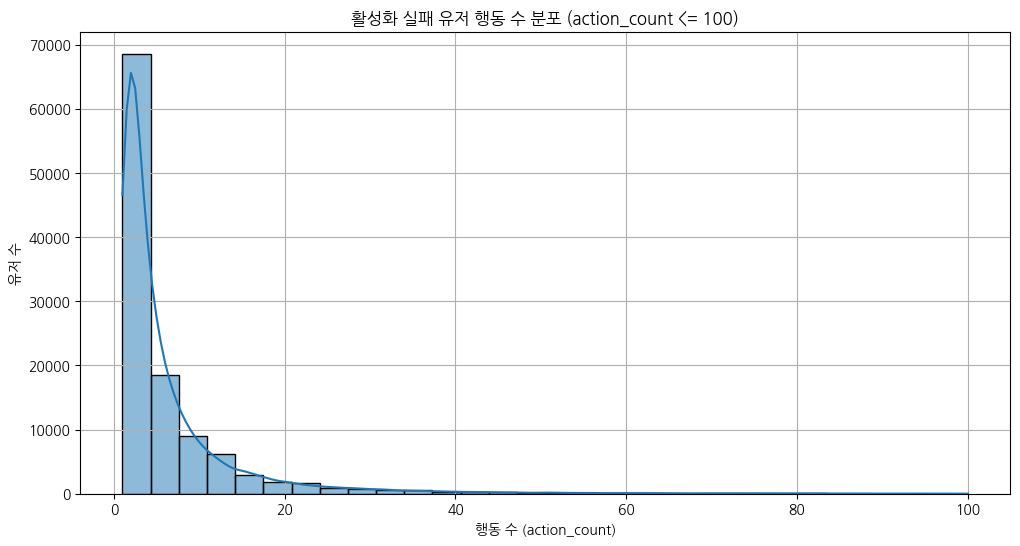

In [ ]:
# ÌñâÎèô Ïàò 100 Ïù¥ÌïòÎßå ÌïÑÌÑ∞ÎßÅ
filtered_behavior = failed_user_behavior_summary[failed_user_behavior_summary['action_count'] <= 100]

plt.figure(figsize=(12,6))
sns.histplot(filtered_behavior['action_count'], bins=30, kde=True)
plt.title('ÌôúÏÑ±Ìôî Ïã§Ìå® Ïú†Ï†Ä ÌñâÎèô Ïàò Î∂ÑÌè¨ (action_count <= 100)')
plt.xlabel('ÌñâÎèô Ïàò (action_count)')
plt.ylabel('Ïú†Ï†Ä Ïàò')
plt.grid(True)
plt.show()

- Í¥ÄÏ∞∞
    - ÎåÄÎã§Ïàò Ïú†Ï†ÄÎäî ÌñâÎèô ÏàòÍ∞Ä 1~5Ìöå Ïù¥ÎÇ¥
    - ÌñâÎèô ÏàòÍ∞Ä 10ÌöåÎ•º ÎÑòÎäî Ïú†Ï†ÄÎäî Í±∞Ïùò ÏóÜÏùå
    - Í∑πÏÜåÏàòÎßå 20Ìöå Ïù¥ÏÉÅ ÌñâÎèô

- Ìï¥ÏÑù
    - Ïã§Ìå® Ïú†Ï†ÄÎì§ÏùÄ ÎåÄÎ∂ÄÎ∂Ñ Î™á Î≤à ÌÅ¥Î¶≠Ìï¥Î≥¥Í≥† Î∞îÎ°ú Ïù¥ÌÉà
    - ÏÑúÎπÑÏä§Ïóê "ÍπäÍ≤å Î™∞ÏûÖ"ÌïòÍ±∞ÎÇò "Ïó¨Îü¨ Í∏∞Îä•ÏùÑ ÌÉêÏÉâ"Ìï¥Î≥¥ÏßÄÎèÑ Î™ªÌïòÍ≥† Îñ†ÎÇ®ÎÇ®

- Ïù∏ÏÇ¨Ïù¥Ìä∏
    - Í∞ÄÏûÖ ÏßÅÌõÑ 1~5Î≤à ÌñâÎèô ÏïàÏóê Ïú†Ï†ÄÎ•º Îß§Î£åÏãúÌÇ§ÏßÄ ÏïäÏúºÎ©¥ Ïù¥ÌÉà Í∞ÄÎä•ÏÑ± Îß§Ïö∞ ÎÜíÏùå
    - Ï¥àÎ∞ò 1~2Î≤à ÌñâÎèô Îïå Î∞îÎ°ú Í∞ïÌïú Ïò®Î≥¥Îî©(ex: Ï∂îÏ≤ú ÏΩòÌÖêÏ∏† Ï†úÏãú, ÌÄòÏä§Ìä∏ Î∂ÄÏó¨)Ïù¥ ÌïÑÏöî

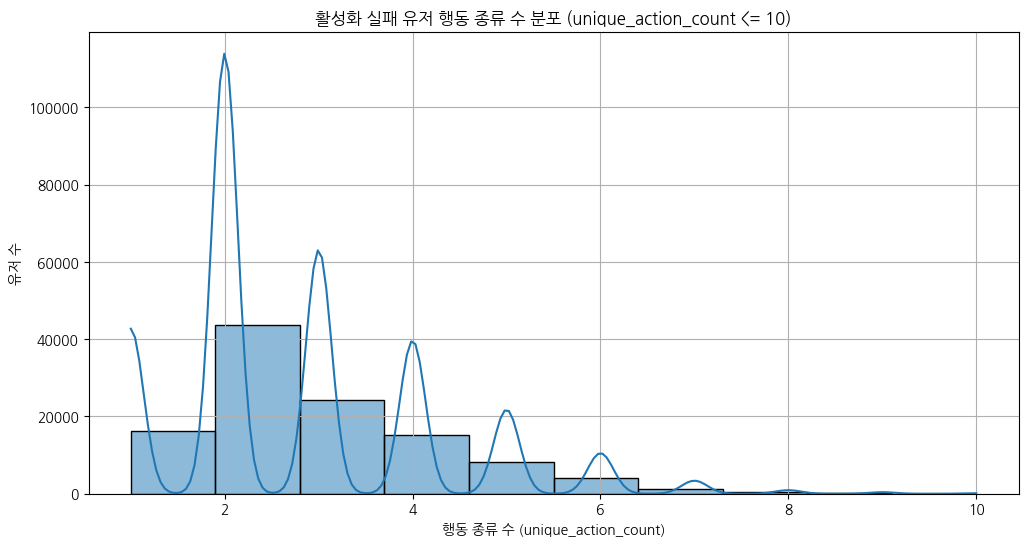

In [ ]:
# ÌñâÎèô Ï¢ÖÎ•ò Ïàò 10 Ïù¥ÌïòÎßå ÌïÑÌÑ∞ÎßÅ
filtered_behavior = failed_user_behavior_summary[failed_user_behavior_summary['unique_action_count'] <= 10]

plt.figure(figsize=(12,6))
sns.histplot(filtered_behavior['unique_action_count'], bins=10, kde=True)
plt.title('ÌôúÏÑ±Ìôî Ïã§Ìå® Ïú†Ï†Ä ÌñâÎèô Ï¢ÖÎ•ò Ïàò Î∂ÑÌè¨ (unique_action_count <= 10)')
plt.xlabel('ÌñâÎèô Ï¢ÖÎ•ò Ïàò (unique_action_count)')
plt.ylabel('Ïú†Ï†Ä Ïàò')
plt.grid(True)
plt.show()

- Í¥ÄÏ∞∞
    - ÌñâÎèô Ï¢ÖÎ•òÍ∞Ä 2~3Í∞úÏù∏ Ïú†Ï†ÄÍ∞Ä Í∞ÄÏû• ÎßéÏùåÏùå
    - ÌñâÎèô Ï¢ÖÎ•òÍ∞Ä 4Í∞úÎ•º ÎÑòÎäî Í≤ΩÏö∞Îäî Í∏âÍ≤©Ìûà ÎÇÆÏïÑÏßêÏßê

- Ìï¥ÏÑù
    - Ïã§Ìå® Ïú†Ï†ÄÎì§ÏùÄ ÎåÄÎ∂ÄÎ∂Ñ 2~3Í∞ÄÏßÄ Í∏∞Îä• Ï†ïÎèÑÎßå Ï≤¥ÌóòÌïòÍ≥† Ïù¥ÌÉà
    - ÌïúÎëê Í∞ÄÏßÄ Ï£ºÏöî ÌñâÎèô(ex: ÏΩòÌÖêÏ∏† Î≥¥Í∏∞, Î©îÏù∏ ÌéòÏù¥ÏßÄ Ïù¥Îèô)Îßå ÌïòÍ≥† ‚Üí Îçî Îã§ÏñëÌïú Í∏∞Îä•ÏùÄ Ï≤¥ÌóòÌïòÏßÄ Î™ªÌï®Ìï®

- Ïù∏ÏÇ¨Ïù¥Ìä∏
    - Ïò®Î≥¥Îî© Îã®Í≥ÑÏóêÏÑú Ïú†Ï†ÄÍ∞Ä Îã§ÏñëÌïú Í∏∞Îä•Ïóê ÏûêÏó∞Ïä§ÎüΩÍ≤å ÎÖ∏Ï∂úÎêòÍ≤å Ïú†ÎèÑ
    - 'Ìïú Í∞ÄÏßÄ Í∏∞Îä•Îßå Ïì∞Í≥† Ïù¥ÌÉà'ÌïòÎäî Í±∏ ÎßâÍ∏∞ ÏúÑÌï¥ "Îã§Ïùå ÌñâÎèô Ï∂îÏ≤ú"


--- ÌôúÏÑ±Ìôî Ïã§Ìå® Ïú†Ï†Ä ÌñâÎèô ÌÉÄÏûÖ Î∂ÑÌè¨ ---
                                 event_type   count
0                         enter.lesson_page  365753
1                           enter.main_page  129264
2                        enter.content_page  113688
3                           complete.signup  113588
4                        enter.payment_page   75472
5                          start.free_trial   18627
6    click.lesson_page_related_question_box   18431
7   click.content_page_start_content_button   10414
8                             start.content    8793
9     click.content_page_more_review_button    1359
10                    complete.subscription    1126
11                 click.cancel_plan_button    1072
12                       renew.subscription     573
13                 resubscribe.subscription       2


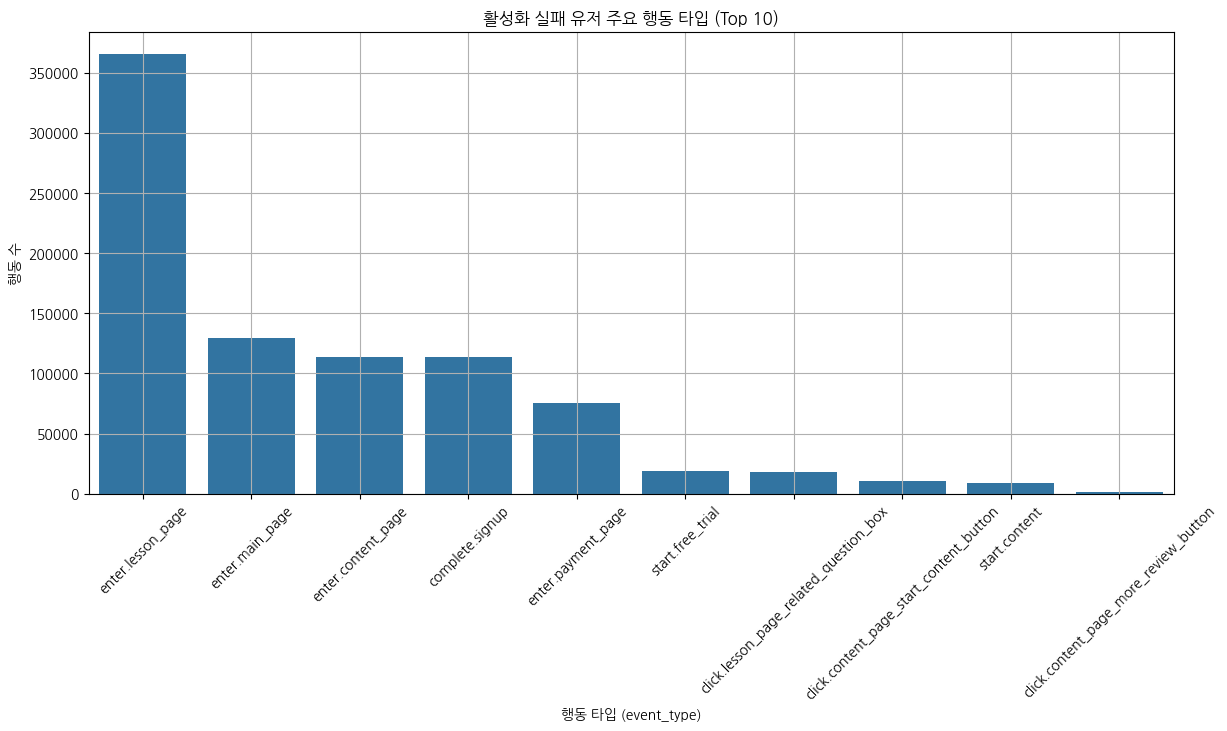

In [ ]:
# 1. Ïã§Ìå® Ïú†Ï†Ä ÌñâÎèô ÌÉÄÏûÖÎ≥Ñ Ïπ¥Ïö¥Ìä∏ (ÏàòÏ†ïÎ≥∏)
failed_event_distribution = (
    failed_user_events['event_type']
    .value_counts()
    .rename_axis('event_type')
    .reset_index(name='count')
)

print("\n--- ÌôúÏÑ±Ìôî Ïã§Ìå® Ïú†Ï†Ä ÌñâÎèô ÌÉÄÏûÖ Î∂ÑÌè¨ ---")
print(failed_event_distribution)

# 2. ÏÉÅÏúÑ 10Í∞ú ÌñâÎèôÎßå ÏãúÍ∞ÅÌôî
top_n = 10
failed_event_distribution_top = failed_event_distribution.head(top_n)

plt.figure(figsize=(14,6))
sns.barplot(data=failed_event_distribution_top, x='event_type', y='count')
plt.title('ÌôúÏÑ±Ìôî Ïã§Ìå® Ïú†Ï†Ä Ï£ºÏöî ÌñâÎèô ÌÉÄÏûÖ (Top 10)')
plt.xlabel('ÌñâÎèô ÌÉÄÏûÖ (event_type)')
plt.ylabel('ÌñâÎèô Ïàò')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∏∞Î∞ò ÌôúÏÑ±Ìôî Ïã§Ìå® Ïú†Ï†Ä Ïú†Ìòï Î∂ÑÎ•ò

In [ ]:
# 1. Í∏∞Î≥∏ Ï†ïÎ≥¥
clustering_features = failed_user_behavior_summary.copy()

# 2. lesson_completed Ï†ïÎ≥¥ Ï∂îÍ∞Ä (ÏÑ±Í≥µ Ïú†Ï†Ä 0Î™Ö, Ïã§Ìå® Ïú†Ï†Ä 1Î™ÖÎßå Ï°¥Ïû¨)
clustering_features['lesson_completed'] = 0  # Ïã§Ìå® Ïú†Ï†ÄÎãàÍπå Îã§ 0

print("\n--- ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏö© Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå ---")
print(clustering_features.head())


--- ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏö© Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå ---
                            user_id  action_count  unique_action_count  \
0  000117267e1dd62481ef3ae7fb420107             2                    2   
1  0001f28a707789a7d78dc28fd2e84dce             8                    3   
2  0002a612daa63284cc741241df6f4b11             5                    3   
3  0002cebfe69ec57026c34088069384ab             5                    4   
4  00030c0a1787ff2a9d612cbff11d9ba8             2                    2   

   lesson_completed  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [ ]:
# 1. Ïä§ÏºÄÏùºÎßÅ (k-meansÎäî Í±∞Î¶¨ Í∏∞Î∞òÏù¥Îùº Ïä§ÏºÄÏùº Ï°∞Ï†ï ÌïÑÏöî)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_features[['action_count', 'unique_action_count', 'lesson_completed']])

# 2. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ïã§Ìñâ (k=3 Ï∂îÏ≤ú, ÏÉÅÌô©Ïóê Îî∞Îùº ÎäòÎ¶¥ ÏàòÎèÑ ÏûàÏùå)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 3. Í≤∞Í≥º Ï†ÄÏû•
clustering_features['cluster'] = clusters

print("\n--- ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ---")
print(clustering_features['cluster'].value_counts())


--- ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ---
cluster
2    59999
0    53588
1        1
Name: count, dtype: int64


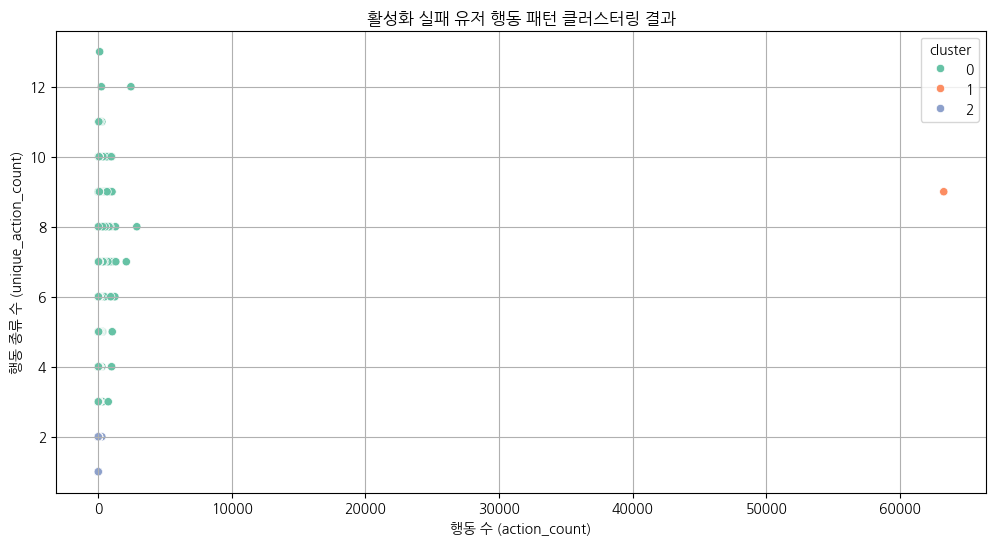

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=clustering_features,
    x='action_count',
    y='unique_action_count',
    hue='cluster',
    palette='Set2'
)
plt.title('ÌôúÏÑ±Ìôî Ïã§Ìå® Ïú†Ï†Ä ÌñâÎèô Ìå®ÌÑ¥ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º')
plt.xlabel('ÌñâÎèô Ïàò (action_count)')
plt.ylabel('ÌñâÎèô Ï¢ÖÎ•ò Ïàò (unique_action_count)')
plt.grid(True)
plt.show()

In [ ]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† ÌñâÎèô Ïàò / ÌñâÎèô Ï¢ÖÎ•ò Ïàò Î≥¥Í∏∞
cluster_summary = (
    clustering_features
    .groupby('cluster')
    .agg(
        avg_action_count=('action_count', 'mean'),
        avg_unique_action_count=('unique_action_count', 'mean'),
        user_count=('user_id', 'count')
    )
    .reset_index()
)

print("\n--- ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏöîÏïΩ ---")
print(cluster_summary)


--- ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏöîÏïΩ ---
   cluster  avg_action_count  avg_unique_action_count  user_count
0        0         11.935191                 3.974397       53588
1        1      63292.000000                 9.000000           1
2        2          2.588160                 1.727395       59999


- ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 (ÌÉêÏÉâÌòï Ïú†Ï†Ä)
    - ÌèâÍ∑†Ï†ÅÏúºÎ°ú 12Î≤à Ï†ïÎèÑ Îã§ÏñëÌïú ÌñâÎèô
    - ÌñâÎèô Ï¢ÖÎ•òÎèÑ 4Ï¢ÖÎ•ò Í∞ÄÍπåÏù¥ ÏãúÎèÑ
    - Í¥ÄÏã¨ÏùÄ ÏûàÏóàÏßÄÎßå Î™∞ÏûÖÌïòÍ±∞ÎÇò Ï†ÑÌôòÎêòÏßÄÎäî ÏïäÏùÄ ÏºÄÏù¥Ïä§
    - Ï°∞Í∏àÎßå Îçî Î∞ÄÏñ¥Ï£ºÎ©¥ ÌôúÏÑ±Ìôî Í∞ÄÎä•ÏÑ± ÏûàÏùå
    - ÎßûÏ∂§Ìòï Ï∂îÏ≤ú ÏΩòÌÖêÏ∏†, Í∞úÏù∏Ìôî ÏïåÎ¶º, Îπ†Î•∏ Ïò®Î≥¥Îî© ÌÄòÏä§Ìä∏ Ïú†ÎèÑ Ï∂îÏ≤ú

- ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 (Ïù¥ÏÉÅÏπò)
    - 1Î™ÖÏù¥ ÌñâÎèô 63,000Î≤à Ïù¥ÏÉÅ
    - Ïù¥Í±¥ Ï†ïÏÉÅÏ†ÅÏù∏ Ïú†Ï†ÄÍ∞Ä ÏïÑÎãàÎùº Î¥á, ÌÖåÏä§Ìä∏ Í≥ÑÏ†ï, Ïò§Î•ò Îç∞Ïù¥ÌÑ∞Ïùº ÌôïÎ•†Ïù¥ Îß§Ïö∞ ÎÜíÏùå
    - Ïù¥ Ïú†Ï†ÄÎäî Î∂ÑÏÑùÏóêÏÑú Ï†úÏô∏

- ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 (Ï¶âÏãú Ïù¥ÌÉàÌòï Ïú†Ï†Ä)
    - ÌèâÍ∑† ÌñâÎèô 2.6Ìöå, ÌñâÎèô Ï¢ÖÎ•òÎèÑ 2Í∞ú ÏïàÌåé
    - Í±∞Ïùò ÏïÑÎ¨¥ Í≤ÉÎèÑ Ïïà Ìï¥Î≥¥Í≥† Î∞îÎ°ú ÎÇòÍ∞Ñ ÏºÄÏù¥Ïä§
    - Ï¥àÍ∏∞ ÏßÑÏûÖ Ïû•Î≤ΩÏù¥ ÏûàÍ±∞ÎÇò, Í∏∞ÎåÄÌñàÎçò ÏÑúÎπÑÏä§ÏôÄ Îã¨ÎùºÏÑú Î∞îÎ°ú Îñ†ÎÇú Ïú†Ï†ÄÎ°ú Ï∂îÏ†ï
    - Ï≤´ ÌôîÎ©¥ Í∞úÏÑ†, Ï≤´ Ïï°ÏÖò Ïú†ÎèÑ (ex: "1Î∂ÑÎßåÏóê Ï≤¥ÌóòÌï¥Î≥¥Í∏∞" Í∞ôÏùÄ) ÌïÑÏöî

## ÌôúÏÑ±Ìôî Ïú†Ï†Ä vs ÌôúÏÑ±Ìôî Ïã§Ìå® Ïú†Ï†Ä ÌñâÎèô ÏãúÌÄÄÏä§ ÎπÑÍµê

In [ ]:
# Í∞ÄÏûÖ Ïù¥ÌõÑ Î∞úÏÉùÌïú Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
events_with_signup = all_events.merge(signup_info, on='user_id', how='left')
events_after_signup = events_with_signup[events_with_signup['client_event_time'] > events_with_signup['signup_time']]

# user_idÎ≥Ñ client_event_time ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨
events_after_signup = events_after_signup.sort_values(['user_id', 'client_event_time'])

# user_idÎ≥Ñ event_typeÏùÑ Ïó∞Í≤∞Ìï¥ÏÑú ÏãúÌÄÄÏä§ ÎßåÎì§Í∏∞
user_sequences = events_after_signup.groupby('user_id')['event_type'].apply(lambda x: ' -> '.join(x)).reset_index()
user_sequences.columns = ['user_id', 'event_sequence']

# Í≤∞Í≥º ÌôïÏù∏
print("\n--- Ïú†Ï†ÄÎ≥Ñ ÌñâÎèô ÏãúÌÄÄÏä§ ÏÉòÌîå ---")
print(user_sequences.head())


--- Ïú†Ï†ÄÎ≥Ñ ÌñâÎèô ÏãúÌÄÄÏä§ ÏÉòÌîå ---
                            user_id  \
0  0000572f2ba8079bcefd2760b632e820   
1  000087537cbfd934375364218ff10f91   
2  000117267e1dd62481ef3ae7fb420107   
3  0001f15911b404f3bf5b8571afafa4e4   
4  0001f28a707789a7d78dc28fd2e84dce   

                                      event_sequence  
0  enter.payment_page -> enter.main_page -> enter...  
1  enter.lesson_page -> enter.lesson_page -> star...  
2                                  enter.lesson_page  
3  enter.lesson_page -> start.content -> complete...  
4  enter.payment_page -> enter.payment_page -> en...  


In [ ]:
top_sequences = user_sequences['event_sequence'].value_counts().head(10)

print("\n--- Top 10 ÌñâÎèô ÏãúÌÄÄÏä§ ---")
print(top_sequences)


--- Top 10 ÌñâÎèô ÏãúÌÄÄÏä§ ---
event_sequence
enter.lesson_page                                              9596
enter.payment_page                                             7480
enter.main_page                                                5204
enter.lesson_page -> enter.lesson_page                         3030
enter.payment_page -> enter.payment_page                       2813
enter.main_page -> enter.main_page                             2484
enter.lesson_page -> enter.lesson_page -> enter.lesson_page    1535
enter.content_page                                             1374
enter.main_page -> enter.main_page -> enter.main_page          1154
enter.payment_page -> enter.main_page                          1071
Name: count, dtype: int64


In [ ]:
# ÌôúÏÑ±Ìôî Ïó¨Î∂Ä Î∂ôÏù¥Í∏∞
user_sequences = user_sequences.merge(
    activation_df[['user_id', 'lesson_completed']],
    on='user_id',
    how='left'
)

# ÌôúÏÑ±Ìôî ÏÑ±Í≥µ/Ïã§Ìå® Í∑∏Î£πÎ≥Ñ Top ÏãúÌÄÄÏä§ ÎπÑÍµê
success_sequences = user_sequences[user_sequences['lesson_completed'] == True]['event_sequence'].value_counts().head(10)
fail_sequences = user_sequences[user_sequences['lesson_completed'] == False]['event_sequence'].value_counts().head(10)

print("\n--- ÌôúÏÑ±Ìôî ÏÑ±Í≥µ Ïú†Ï†Ä Top 10 ÏãúÌÄÄÏä§ ---")
print(success_sequences)

print("\n--- ÌôúÏÑ±Ìôî Ïã§Ìå® Ïú†Ï†Ä Top 10 ÏãúÌÄÄÏä§ ---")
print(fail_sequences)


--- ÌôúÏÑ±Ìôî ÏÑ±Í≥µ Ïú†Ï†Ä Top 10 ÏãúÌÄÄÏä§ ---
event_sequence
enter.lesson_page -> start.content -> complete.lesson                                                                                        246
start.content -> complete.lesson                                                                                                             123
enter.lesson_page -> start.content -> complete.lesson -> complete.lesson                                                                     116
start.content -> complete.lesson -> complete.lesson                                                                                           73
enter.lesson_page -> start.content -> enter.lesson_page -> complete.lesson -> enter.lesson_page -> enter.lesson_page                          70
enter.lesson_page -> start.content -> enter.lesson_page -> enter.lesson_page -> complete.lesson -> enter.lesson_page -> enter.lesson_page     61
enter.lesson_page -> start.content -> complete.lesson -> complete

## ÌôúÏÑ±Ìôî ÌçºÎÑê Î∂ÑÏÑù

### Ï†ÑÏ≤¥ ÌçºÎÑê(ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å > ÏΩòÌÖêÏ∏† ÏßÑÏûÖ > ÏΩòÌÖêÏ∏† ÏãúÏûë > Î†àÏä® ÏãúÏûë > Î†àÏä® ÏôÑÎ£å > ÏΩòÌÖêÏ∏† Ï†ÑÏ≤¥ ÏôÑÎ£å)

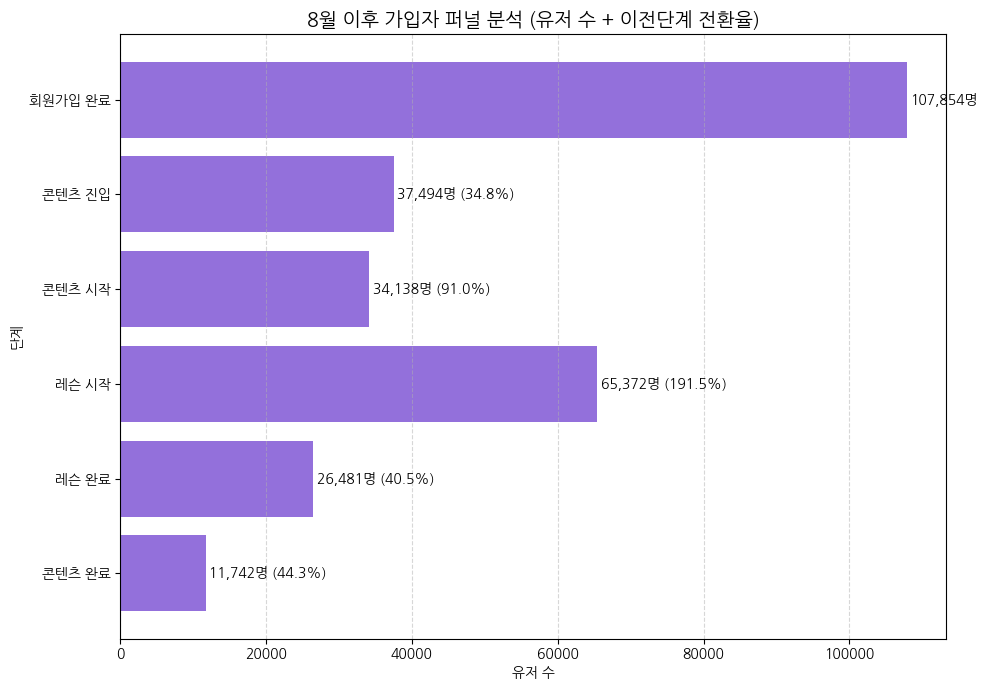


--- 8Ïõî Ïù¥ÌõÑ Í∞ÄÏûÖÏûê ÌçºÎÑê Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò Î∞è Ï†ïÌôïÌïú Ïù¥Ï†ÑÎã®Í≥Ñ ÎåÄÎπÑ Ï†ÑÌôòÏú® ---
        Îã®Í≥Ñ    Ïú†Ï†Ä Ïàò  Ïù¥Ï†ÑÎã®Í≥Ñ ÎåÄÎπÑ Ï†ÑÌôòÏú® (%)
0  ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å  107854              NaN
1   ÏΩòÌÖêÏ∏† ÏßÑÏûÖ   37494             34.8
2   ÏΩòÌÖêÏ∏† ÏãúÏûë   34138             91.0
3    Î†àÏä® ÏãúÏûë   65372            191.5
4    Î†àÏä® ÏôÑÎ£å   26481             40.5
5   ÏΩòÌÖêÏ∏† ÏôÑÎ£å   11742             44.3


In [ ]:
# 1. Í∞ÄÏûÖÏùº Í∏∞Ï§Ä ÌïÑÌÑ∞ÎßÅ (2022-08-01 Ïù¥ÌõÑ)
complete_signup['signup_time'] = pd.to_datetime(complete_signup['client_event_time'])
signup_after_august = complete_signup[complete_signup['signup_time'] >= '2022-08-01']
signup_users_august = signup_after_august['user_id'].unique()

# 2. ÌïÑÏöîÌïú Ïù¥Î≤§Ìä∏Î≥Ñ Ïú†Ï†Ä ÌïÑÌÑ∞ÎßÅ
enter_content_users = enter_content['user_id'].unique()
start_content_users = start_content['user_id'].unique()
enter_lesson_users = enter_lesson['user_id'].unique()
complete_lesson_users = complete_lesson['user_id'].unique()
end_content_users = end_content['user_id'].unique()

# 3. Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò ÏÑ∏Í∏∞
funnel_steps_august = {
    'ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å': len(signup_users_august),
    'ÏΩòÌÖêÏ∏† ÏßÑÏûÖ': len(set(signup_users_august) & set(enter_content_users)),
    'ÏΩòÌÖêÏ∏† ÏãúÏûë': len(set(signup_users_august) & set(start_content_users)),
    'Î†àÏä® ÏãúÏûë': len(set(signup_users_august) & set(enter_lesson_users)),
    'Î†àÏä® ÏôÑÎ£å': len(set(signup_users_august) & set(complete_lesson_users)),
    'ÏΩòÌÖêÏ∏† ÏôÑÎ£å': len(set(signup_users_august) & set(end_content_users)),
}

funnel_august_df = pd.DataFrame(list(funnel_steps_august.items()), columns=['Îã®Í≥Ñ', 'Ïú†Ï†Ä Ïàò'])

# 4. ÌçºÎÑê ÏàúÏÑú Ï†ïÎ¶¨ (Ï†ïÎ∞©Ìñ• Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ)
funnel_august_df = funnel_august_df.reset_index(drop=True)

# 5. 'Ïù¥Ï†Ñ Îã®Í≥Ñ ÎåÄÎπÑ' Ï†ÑÌôòÏú®(%) Í≥ÑÏÇ∞
funnel_august_df['Ïù¥Ï†ÑÎã®Í≥Ñ ÎåÄÎπÑ Ï†ÑÌôòÏú® (%)'] = (
    funnel_august_df['Ïú†Ï†Ä Ïàò'] / funnel_august_df['Ïú†Ï†Ä Ïàò'].shift(1) * 100
).round(1)

# 6. ÏãúÍ∞ÅÌôîÏö© Îç∞Ïù¥ÌÑ∞Îäî Îí§ÏßëÍ∏∞
funnel_plot = funnel_august_df.iloc[::-1].reset_index(drop=True)

# 7. ÌçºÎÑê ÏàòÌèâ ÎßâÎåÄ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 7))
bars = plt.barh(funnel_plot['Îã®Í≥Ñ'], funnel_plot['Ïú†Ï†Ä Ïàò'], color='mediumpurple')

for idx, bar in enumerate(bars):
    width = bar.get_width()
    if idx < len(funnel_plot):
        rate = funnel_plot.loc[idx, 'Ïù¥Ï†ÑÎã®Í≥Ñ ÎåÄÎπÑ Ï†ÑÌôòÏú® (%)']
        if not pd.isna(rate):
            text = f'{int(width):,}Î™Ö ({rate:.1f}%)'
        else:
            text = f'{int(width):,}Î™Ö'
    else:
        text = f'{int(width):,}Î™Ö'
    plt.text(width + 500, bar.get_y() + bar.get_height()/2,
             text, va='center', fontsize=10)

plt.title('8Ïõî Ïù¥ÌõÑ Í∞ÄÏûÖÏûê ÌçºÎÑê Î∂ÑÏÑù (Ïú†Ï†Ä Ïàò + Ïù¥Ï†ÑÎã®Í≥Ñ Ï†ÑÌôòÏú®)', fontsize=14)
plt.xlabel('Ïú†Ï†Ä Ïàò')
plt.ylabel('Îã®Í≥Ñ')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 8. ÌçºÎÑê ÌÖåÏù¥Î∏î Ï∂úÎ†•
print("\n--- 8Ïõî Ïù¥ÌõÑ Í∞ÄÏûÖÏûê ÌçºÎÑê Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò Î∞è Ï†ïÌôïÌïú Ïù¥Ï†ÑÎã®Í≥Ñ ÎåÄÎπÑ Ï†ÑÌôòÏú® ---")
print(funnel_august_df)

#### Í∞ÄÏûÖÏõî Í∏∞Ï§Ä ÏΩîÌò∏Ìä∏


--- [8Ïõî Ïù¥ÌõÑ Í∞ÄÏûÖÏûê] ÌçºÎÑê Ïú†Ï†Ä Ïàò ---
              ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å  ÏΩòÌÖêÏ∏† ÏßÑÏûÖ  ÏΩòÌÖêÏ∏† ÏãúÏûë  Î†àÏä® ÏãúÏûë  Î†àÏä® ÏôÑÎ£å  ÏΩòÌÖêÏ∏† ÏôÑÎ£å
signup_month                                               
2022-08-01       3393    1431     578    827    629     413
2022-09-01       2944    1031     465    600    413     249
2022-10-01       2836    1016     416    664    370     220
2022-11-01       3422    1607     910   1474    832     554
2022-12-01       8461    3328    1371   6271   1261     920
2023-01-01      10893    3963    1674   7633   1528    1118
2023-02-01       6172    1830    1115   2542    927     420
2023-03-01       7921    2318    1177   2270    981     546
2023-04-01       5779    2256    1944   2378   1420     752
2023-05-01       4767    3015    2339   3382   1423     502
2023-06-01       6706    2552    3171   5263   2379     908
2023-07-01       7812    2581    3727   6549   2821    1035
2023-08-01       6834    2375    3157   5629   2471

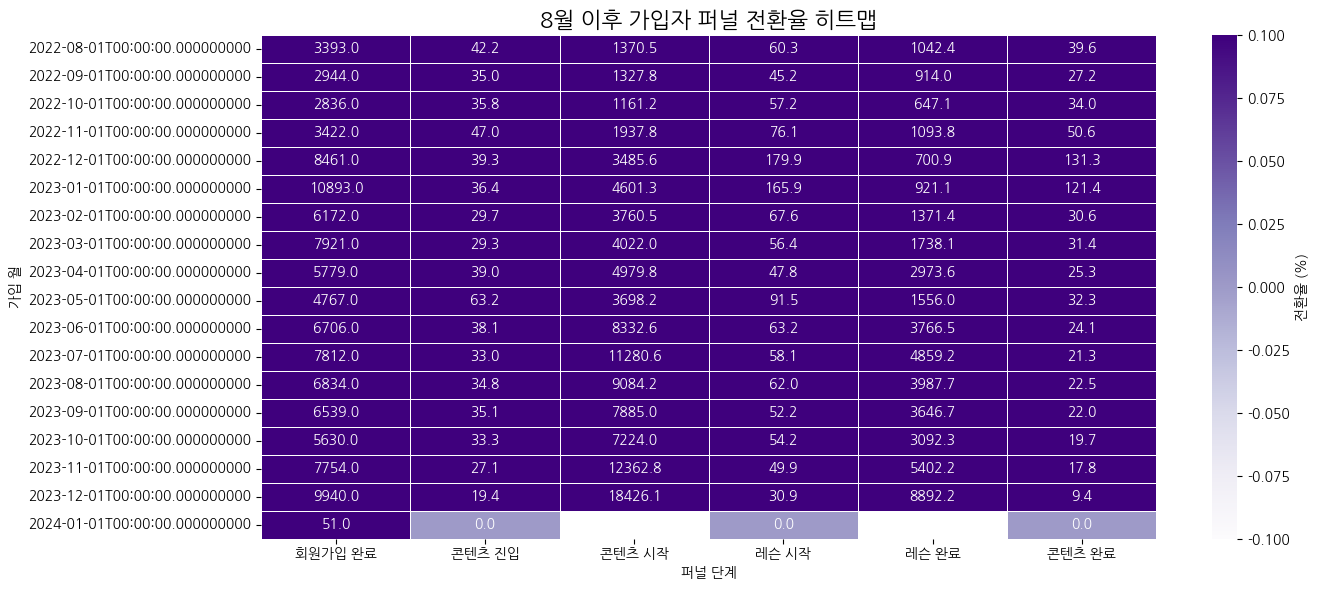

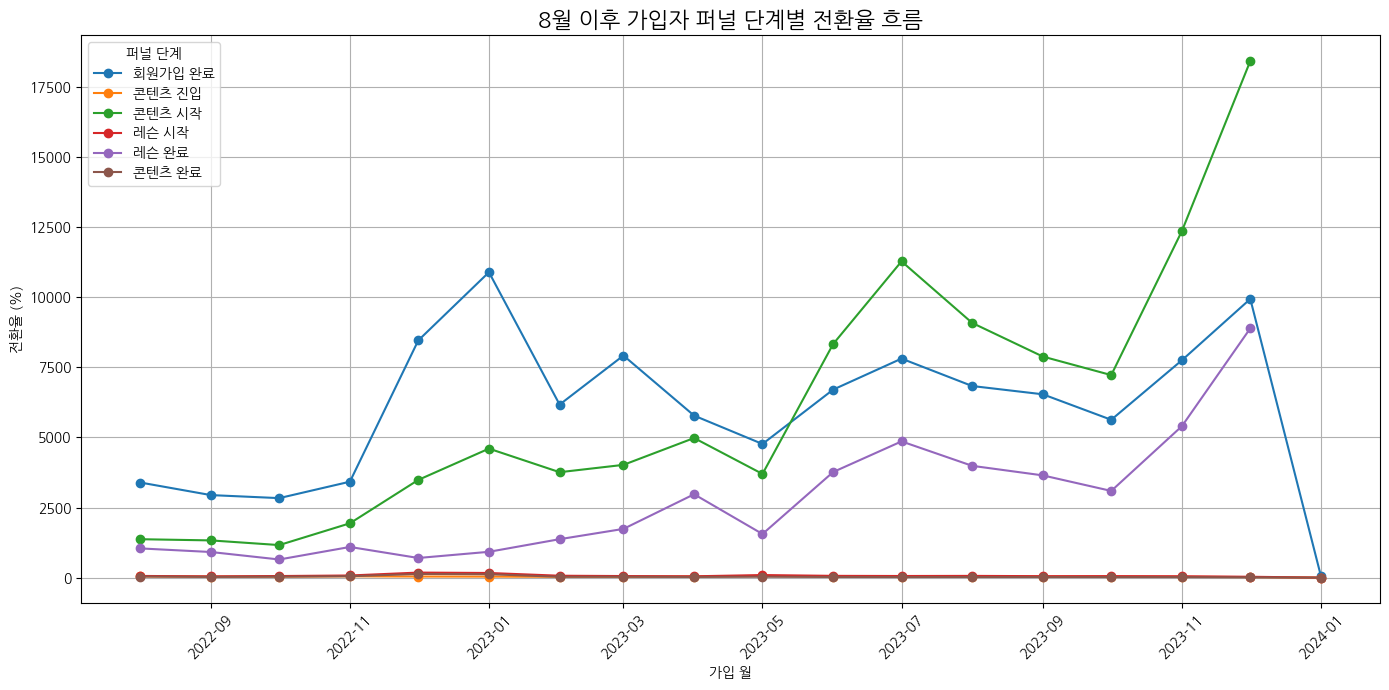

In [ ]:
# 1. Í∞ÄÏûÖÏùºÏóêÏÑú Í∞ÄÏûÖÏõî Ï∂îÏ∂ú
complete_signup['signup_time'] = pd.to_datetime(complete_signup['client_event_time'])
complete_signup['signup_month'] = complete_signup['signup_time'].dt.to_period('M').dt.to_timestamp()

# 2. 2022-08-01 Ïù¥ÌõÑ Í∞ÄÏûÖÏûêÎßå ÌïÑÌÑ∞ÎßÅ
signup_after_august = complete_signup[complete_signup['signup_time'] >= '2022-08-01']
signup_users_august = signup_after_august['user_id'].unique()
signup_info_august = signup_after_august[['user_id', 'signup_month']]

# 3. Ïù¥Î≤§Ìä∏ÏóêÎèÑ 8Ïõî Ïù¥ÌõÑ Í∞ÄÏûÖÏûêÎßå Îß§Ïπ≠
def attach_signup_month(df, signup_info):
    return df.merge(signup_info, on='user_id', how='left')

enter_content_month = attach_signup_month(
    enter_content[enter_content['user_id'].isin(signup_users_august)],
    signup_info_august
)
start_content_month = attach_signup_month(
    start_content[start_content['user_id'].isin(signup_users_august)],
    signup_info_august
)
enter_lesson_month = attach_signup_month(
    enter_lesson[enter_lesson['user_id'].isin(signup_users_august)],
    signup_info_august
)
complete_lesson_month = attach_signup_month(
    complete_lesson[complete_lesson['user_id'].isin(signup_users_august)],
    signup_info_august
)
end_content_month = attach_signup_month(
    end_content[end_content['user_id'].isin(signup_users_august)],
    signup_info_august
)

# 4. Í∞ÄÏûÖÏõîÎ≥Ñ Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò Í≥ÑÏÇ∞
funnel_by_month = (
    signup_info_august.groupby('signup_month')['user_id'].nunique().rename('ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å')
    .to_frame()
    .join(enter_content_month.groupby('signup_month')['user_id'].nunique().rename('ÏΩòÌÖêÏ∏† ÏßÑÏûÖ'))
    .join(start_content_month.groupby('signup_month')['user_id'].nunique().rename('ÏΩòÌÖêÏ∏† ÏãúÏûë'))
    .join(enter_lesson_month.groupby('signup_month')['user_id'].nunique().rename('Î†àÏä® ÏãúÏûë'))
    .join(complete_lesson_month.groupby('signup_month')['user_id'].nunique().rename('Î†àÏä® ÏôÑÎ£å'))
    .join(end_content_month.groupby('signup_month')['user_id'].nunique().rename('ÏΩòÌÖêÏ∏† ÏôÑÎ£å'))
    .fillna(0)
    .astype(int)
)

# 5. Í∞ÄÏûÖÏõîÎ≥Ñ Ïù¥Ï†ÑÎã®Í≥Ñ ÎåÄÎπÑ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
conversion_rate_by_month = funnel_by_month.copy()
steps = conversion_rate_by_month.columns.tolist()

for i in range(1, len(steps)):
    conversion_rate_by_month[steps[i]] = (conversion_rate_by_month[steps[i]] / conversion_rate_by_month[steps[i-1]]) * 100

conversion_rate_by_month = conversion_rate_by_month.round(1)

# 6. Í≤∞Í≥º Ï∂úÎ†•
print("\n--- [8Ïõî Ïù¥ÌõÑ Í∞ÄÏûÖÏûê] ÌçºÎÑê Ïú†Ï†Ä Ïàò ---")
print(funnel_by_month)

print("\n--- [8Ïõî Ïù¥ÌõÑ Í∞ÄÏûÖÏûê] ÌçºÎÑê Ï†ÑÌôòÏú® (%) ---")
print(conversion_rate_by_month)

# 7. ÏãúÍ∞ÅÌôî: ÌûàÌä∏Îßµ
plt.figure(figsize=(14, 6))
sns.heatmap(conversion_rate_by_month, annot=True, fmt=".1f", cmap="Purples", linewidths=0.5, cbar_kws={'label': 'Ï†ÑÌôòÏú® (%)'})
plt.title('8Ïõî Ïù¥ÌõÑ Í∞ÄÏûÖÏûê ÌçºÎÑê Ï†ÑÌôòÏú® ÌûàÌä∏Îßµ', fontsize=16)
plt.xlabel('ÌçºÎÑê Îã®Í≥Ñ')
plt.ylabel('Í∞ÄÏûÖ Ïõî')
plt.tight_layout()
plt.show()

# 8. ÏãúÍ∞ÅÌôî: ÎùºÏù∏ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(14, 7))
for step in conversion_rate_by_month.columns:
    plt.plot(conversion_rate_by_month.index, conversion_rate_by_month[step], marker='o', label=step)

plt.title('8Ïõî Ïù¥ÌõÑ Í∞ÄÏûÖÏûê ÌçºÎÑê Îã®Í≥ÑÎ≥Ñ Ï†ÑÌôòÏú® ÌùêÎ¶Ñ', fontsize=16)
plt.xlabel('Í∞ÄÏûÖ Ïõî')
plt.ylabel('Ï†ÑÌôòÏú® (%)')
plt.xticks(rotation=45)
plt.legend(title='ÌçºÎÑê Îã®Í≥Ñ')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# --- 1. Î†àÏä® ÏôÑÎ£å Ïã§Ìå®Ïûê Ï∂îÏ∂ú ---
# 8Ïõî Ïù¥ÌõÑ Í∞ÄÏûÖÏûê Í∏∞Ï§Ä enter_lesson, complete_lesson ÌïÑÌÑ∞
enter_lesson_august = enter_lesson[enter_lesson['user_id'].isin(signup_users_august)]
complete_lesson_august = complete_lesson[complete_lesson['user_id'].isin(signup_users_august)]

lesson_start_users = enter_lesson_august['user_id'].drop_duplicates()
lesson_complete_users = complete_lesson_august['user_id'].drop_duplicates()

lesson_fail_users = set(lesson_start_users) - set(lesson_complete_users)

print(f"\n--- Î†àÏä® ÏôÑÎ£å Ïã§Ìå®Ïûê Ïàò: {len(lesson_fail_users):,}Î™Ö ---")

# --- 2. Ïù¥ÌÉàÏûê ÎßàÏßÄÎßâ ÌñâÎèô Î∂ÑÏÑù ---
all_events_august = all_events[all_events['user_id'].isin(signup_users_august)]

fail_user_events = all_events_august[all_events_august['user_id'].isin(lesson_fail_users)]
fail_user_events['client_event_time'] = pd.to_datetime(fail_user_events['client_event_time'])

# Ïú†Ï†ÄÎ≥Ñ ÎßàÏßÄÎßâ ÌñâÎèô
last_events = (
    fail_user_events.sort_values('client_event_time')
    .groupby('user_id')
    .tail(1)
)

last_action_counts = last_events['event_type'].value_counts()

print("\n--- Î†àÏä® ÏôÑÎ£å Ïã§Ìå®ÏûêÏùò ÎßàÏßÄÎßâ ÌñâÎèô Ïú†Ìòï Î∂ÑÌè¨ ---")
print(last_action_counts)

# --- 3. ÌèâÍ∑† ÌñâÎèô Ïàò, ÌèâÍ∑† ÌñâÎèô Îã§ÏñëÏÑ± Î∂ÑÏÑù ---
user_event_counts = fail_user_events.groupby('user_id')['event_type'].count()
user_unique_actions = fail_user_events.groupby('user_id')['event_type'].nunique()

print(f"\n--- Î†àÏä® ÏôÑÎ£å Ïã§Ìå®Ïûê ÌèâÍ∑† ÌñâÎèô Ïàò: {user_event_counts.mean():.2f}Í∞ú ---")
print(f"--- Î†àÏä® ÏôÑÎ£å Ïã§Ìå®Ïûê ÌèâÍ∑† ÌñâÎèô Îã§ÏñëÏÑ±(ÌñâÎèô Ï¢ÖÎ•ò Ïàò): {user_unique_actions.mean():.2f}Í∞ú ---")

# --- 4. Ïù¥ÌÉàÏûê ÌñâÎèô ÏãúÌÄÄÏä§ Top 5 ---
user_sequences = (
    fail_user_events
    .sort_values(['user_id', 'client_event_time'])
    .groupby('user_id')['event_type']
    .apply(lambda x: ' ‚Üí '.join(x))
)

sequence_counts = user_sequences.value_counts().head(5)

print("\n--- Î†àÏä® ÏôÑÎ£å Ïã§Ìå®Ïûê ÌñâÎèô ÏãúÌÄÄÏä§ Top 5 ---")
print(sequence_counts)


--- Î†àÏä® ÏôÑÎ£å Ïã§Ìå®Ïûê Ïàò: 39,617Î™Ö ---

--- Î†àÏä® ÏôÑÎ£å Ïã§Ìå®ÏûêÏùò ÎßàÏßÄÎßâ ÌñâÎèô Ïú†Ìòï Î∂ÑÌè¨ ---
event_type
enter.lesson_page                          23337
enter.payment_page                          5609
enter.content_page                          4391
enter.main_page                             3909
complete.signup                             1018
start.content                                462
click.lesson_page_related_question_box       401
click.cancel_plan_button                     287
click.content_page_start_content_button       84
renew.subscription                            52
complete.subscription                         44
click.content_page_more_review_button         22
resubscribe.subscription                       1
Name: count, dtype: int64

--- Î†àÏä® ÏôÑÎ£å Ïã§Ìå®Ïûê ÌèâÍ∑† ÌñâÎèô Ïàò: 9.89Í∞ú ---
--- Î†àÏä® ÏôÑÎ£å Ïã§Ìå®Ïûê ÌèâÍ∑† ÌñâÎèô Îã§ÏñëÏÑ±(ÌñâÎèô Ï¢ÖÎ•ò Ïàò): 3.29Í∞ú ---

--- Î†àÏä® ÏôÑÎ£å Ïã§Ìå®Ïûê ÌñâÎèô ÏãúÌÄÄÏä§ Top 5 ---
event_type


### Î†àÏä® Í∏∞Ï§Ä ÌçºÎÑê(ÌöåÏõêÍ∞ÄÏûÖ -> Î†àÏä® ÏãúÏûë -> Î†àÏä® ÏôÑÎ£å)

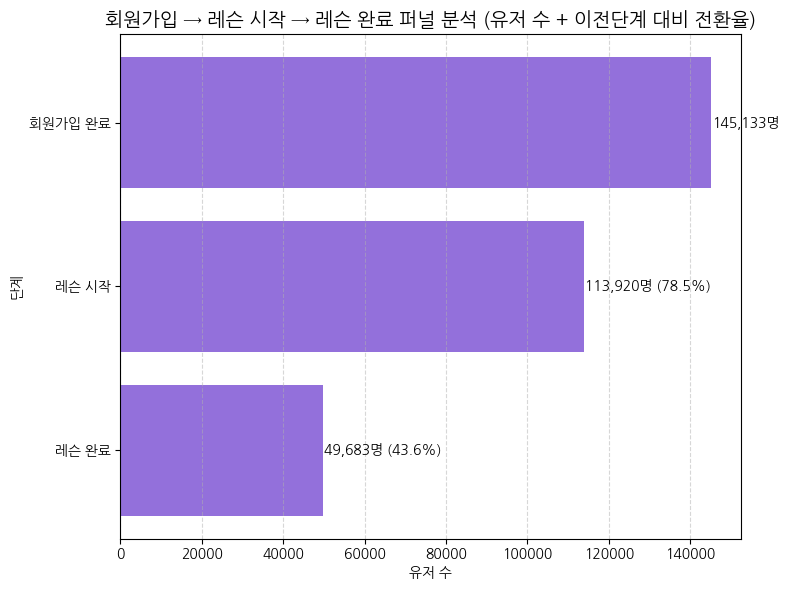


--- Î†àÏä® ÌçºÎÑê Ïú†Ï†Ä Ïàò Î∞è Ïù¥Ï†ÑÎã®Í≥Ñ ÎåÄÎπÑ Ï†ÑÌôòÏú® ---
        Îã®Í≥Ñ    Ïú†Ï†Ä Ïàò  Ïù¥Ï†ÑÎã®Í≥Ñ ÎåÄÎπÑ Ï†ÑÌôòÏú® (%)
0  ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å  145133              NaN
1    Î†àÏä® ÏãúÏûë  113920             78.5
2    Î†àÏä® ÏôÑÎ£å   49683             43.6


In [ ]:
# 1. ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å Ïú†Ï†Ä
signup_users = complete_signup[['user_id']].drop_duplicates()

# 2. Î†àÏä® ÏãúÏûë Ïú†Ï†Ä
lesson_start_users = enter_lesson[['user_id']].drop_duplicates()

# 3. Î†àÏä® ÏôÑÎ£å Ïú†Ï†Ä
lesson_complete_users = complete_lesson[['user_id']].drop_duplicates()

# 4. ÌçºÎÑê Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò Í≥ÑÏÇ∞
funnel = pd.DataFrame({
    'Îã®Í≥Ñ': ['ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å', 'Î†àÏä® ÏãúÏûë', 'Î†àÏä® ÏôÑÎ£å'],
    'Ïú†Ï†Ä Ïàò': [
        signup_users['user_id'].nunique(),
        lesson_start_users['user_id'].nunique(),
        lesson_complete_users['user_id'].nunique()
    ]
})

# 5. ÌçºÎÑê ÏàúÏÑú (ÏúÑ -> ÏïÑÎûò)
funnel = funnel.reset_index(drop=True)

# 6. 'ÌòÑÏû¨Îã®Í≥Ñ Ïú†Ï†Ä Ïàò √∑ Ïù¥Ï†ÑÎã®Í≥Ñ Ïú†Ï†Ä Ïàò'Î°ú Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
funnel['Ïù¥Ï†ÑÎã®Í≥Ñ ÎåÄÎπÑ Ï†ÑÌôòÏú® (%)'] = (funnel['Ïú†Ï†Ä Ïàò'] / funnel['Ïú†Ï†Ä Ïàò'].shift(1)) * 100
funnel['Ïù¥Ï†ÑÎã®Í≥Ñ ÎåÄÎπÑ Ï†ÑÌôòÏú® (%)'] = funnel['Ïù¥Ï†ÑÎã®Í≥Ñ ÎåÄÎπÑ Ï†ÑÌôòÏú® (%)'].round(1)

# 7. ÏãúÍ∞ÅÌôîÏö© Îç∞Ïù¥ÌÑ∞ Îí§ÏßëÍ∏∞
funnel_plot = funnel.iloc[::-1].reset_index(drop=True)

# 8. ÏàòÌèâ ÎßâÎåÄ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(8, 6))
bars = plt.barh(funnel_plot['Îã®Í≥Ñ'], funnel_plot['Ïú†Ï†Ä Ïàò'], color='mediumpurple')

# ÎßâÎåÄ ÏòÜÏóê Ïú†Ï†Ä Ïàò + Ï†ÑÌôòÏú® ÌëúÏãú
for idx, bar in enumerate(bars):
    width = bar.get_width()
    if idx < len(bars) - 1:
        rate = funnel_plot.loc[idx, 'Ïù¥Ï†ÑÎã®Í≥Ñ ÎåÄÎπÑ Ï†ÑÌôòÏú® (%)']
        text = f'{int(width):,}Î™Ö ({rate:.1f}%)'
    else:
        text = f'{int(width):,}Î™Ö'

    plt.text(width + 300, bar.get_y() + bar.get_height()/2,
             text, va='center', fontsize=10)

plt.title('ÌöåÏõêÍ∞ÄÏûÖ ‚Üí Î†àÏä® ÏãúÏûë ‚Üí Î†àÏä® ÏôÑÎ£å ÌçºÎÑê Î∂ÑÏÑù (Ïú†Ï†Ä Ïàò + Ïù¥Ï†ÑÎã®Í≥Ñ ÎåÄÎπÑ Ï†ÑÌôòÏú®)', fontsize=14)
plt.xlabel('Ïú†Ï†Ä Ïàò')
plt.ylabel('Îã®Í≥Ñ')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 9. ÌçºÎÑê ÌÖåÏù¥Î∏î Ï∂úÎ†•
print("\n--- Î†àÏä® ÌçºÎÑê Ïú†Ï†Ä Ïàò Î∞è Ïù¥Ï†ÑÎã®Í≥Ñ ÎåÄÎπÑ Ï†ÑÌôòÏú® ---")
print(funnel)

In [ ]:
complete_signup['signup_time'] = pd.to_datetime(complete_signup['client_event_time'])
complete_signup['signup_month'] = complete_signup['signup_time'].dt.to_period('M').dt.to_timestamp()

signup_info_full = complete_signup[['user_id', 'signup_month']]

def attach_signup_month(df, signup_info):
    return df.merge(signup_info, on='user_id', how='left')

enter_lesson_full = attach_signup_month(enter_lesson, signup_info_full)
complete_lesson_full = attach_signup_month(complete_lesson, signup_info_full)

# Î†àÏä® ÏôÑÎ£å Ï§ëÎ≥µ Ï†úÍ±∞ (Ïú†Ï†ÄÎ≥Ñ 1ÌöåÎßå Ïù∏Ï†ï)
complete_lesson_unique = complete_lesson[['user_id']].drop_duplicates()

# Îã§Ïãú Í∞ÄÏûÖÏõî Îß§Ïπ≠
complete_lesson_full = attach_signup_month(complete_lesson_unique, signup_info_full)

# ÌçºÎÑê Ïú†Ï†Ä Ïàò Í≥ÑÏÇ∞
lesson_funnel_by_month = (
    signup_info_full.groupby('signup_month')['user_id'].nunique().rename('ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å')
    .to_frame()
    .join(enter_lesson_full.groupby('signup_month')['user_id'].nunique().rename('Î†àÏä® ÏãúÏûë'))
    .join(complete_lesson_full.groupby('signup_month')['user_id'].nunique().rename('Î†àÏä® ÏôÑÎ£å'))
    .fillna(0)
    .astype(int)
)

print("\n--- Í∞ÄÏûÖÏõîÎ≥Ñ Î†àÏä® ÌçºÎÑê Ïú†Ï†Ä Ïàò (Ï†ÑÏ≤¥ Í∞ÄÏûÖÏûê Í∏∞Ï§Ä) ---")
print(lesson_funnel_by_month)


--- Í∞ÄÏûÖÏõîÎ≥Ñ Î†àÏä® ÌçºÎÑê Ïú†Ï†Ä Ïàò (Ï†ÑÏ≤¥ Í∞ÄÏûÖÏûê Í∏∞Ï§Ä) ---
              ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å  Î†àÏä® ÏãúÏûë  Î†àÏä® ÏôÑÎ£å
signup_month                       
2022-01-01       7306   4041   1056
2022-02-01       4670   2767    736
2022-03-01       5617   4054    745
2022-04-01       4726   3548    575
2022-05-01       5011   3792    615
2022-06-01       5547   4303    675
2022-07-01       4402   1847    662
2022-08-01       3393    827    629
2022-09-01       2944    600    413
2022-10-01       2836    664    370
2022-11-01       3422   1474    832
2022-12-01       8461   6271   1261
2023-01-01      10893   7633   1528
2023-02-01       6172   2542    927
2023-03-01       7921   2270    981
2023-04-01       5779   2378   1420
2023-05-01       4767   3382   1423
2023-06-01       6706   5263   2379
2023-07-01       7812   6549   2821
2023-08-01       6834   5629   2471
2023-09-01       6539   4119   1905
2023-10-01       5630   3913   1675
2023-11-01       7754   6172   2697

In [ ]:
lesson_conversion_by_month = lesson_funnel_by_month.copy()

# 2. Ï†ïÌôïÌïú Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
lesson_conversion_by_month['Î†àÏä® ÏãúÏûë Ï†ÑÌôòÏú® (%)'] = (lesson_conversion_by_month['Î†àÏä® ÏãúÏûë'] / lesson_conversion_by_month['ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å']) * 100
lesson_conversion_by_month['Î†àÏä® ÏôÑÎ£å Ï†ÑÌôòÏú® (%)'] = (lesson_conversion_by_month['Î†àÏä® ÏôÑÎ£å'] / lesson_conversion_by_month['Î†àÏä® ÏãúÏûë']) * 100

# 3. ÏÜåÏàòÏ†ê Ìïú ÏûêÎ¶¨Î°ú Î∞òÏò¨Î¶º
lesson_conversion_by_month = lesson_conversion_by_month.round(1)

# 4. ÌöåÏõêÍ∞ÄÏûÖ, Î†àÏä® ÏãúÏûë, Î†àÏä® ÏôÑÎ£å ÏàòÎäî Ï†úÍ±∞ÌïòÍ≥† Ï†ÑÌôòÏú®Îßå Î≥¥Í∏∞ ÏâΩÍ≤å ÎÇ®Í∏∞Í∏∞
lesson_conversion_rate_only = lesson_conversion_by_month[['Î†àÏä® ÏãúÏûë Ï†ÑÌôòÏú® (%)', 'Î†àÏä® ÏôÑÎ£å Ï†ÑÌôòÏú® (%)']]

# 5. Ï∂úÎ†•
print("\n--- Í∞ÄÏûÖÏõîÎ≥Ñ Î†àÏä® ÌçºÎÑê Ï†ÑÌôòÏú® (%) (Ï†ïÌôïÌïú Í∏∞Ï§Ä) ---")
print(lesson_conversion_rate_only)


--- Í∞ÄÏûÖÏõîÎ≥Ñ Î†àÏä® ÌçºÎÑê Ï†ÑÌôòÏú® (%) (Ï†ïÌôïÌïú Í∏∞Ï§Ä) ---
              Î†àÏä® ÏãúÏûë Ï†ÑÌôòÏú® (%)  Î†àÏä® ÏôÑÎ£å Ï†ÑÌôòÏú® (%)
signup_month                              
2022-01-01             55.3           26.1
2022-02-01             59.3           26.6
2022-03-01             72.2           18.4
2022-04-01             75.1           16.2
2022-05-01             75.7           16.2
2022-06-01             77.6           15.7
2022-07-01             42.0           35.8
2022-08-01             24.4           76.1
2022-09-01             20.4           68.8
2022-10-01             23.4           55.7
2022-11-01             43.1           56.4
2022-12-01             74.1           20.1
2023-01-01             70.1           20.0
2023-02-01             41.2           36.5
2023-03-01             28.7           43.2
2023-04-01             41.1           59.7
2023-05-01             70.9           42.1
2023-06-01             78.5           45.2
2023-07-01             83.8           43.1


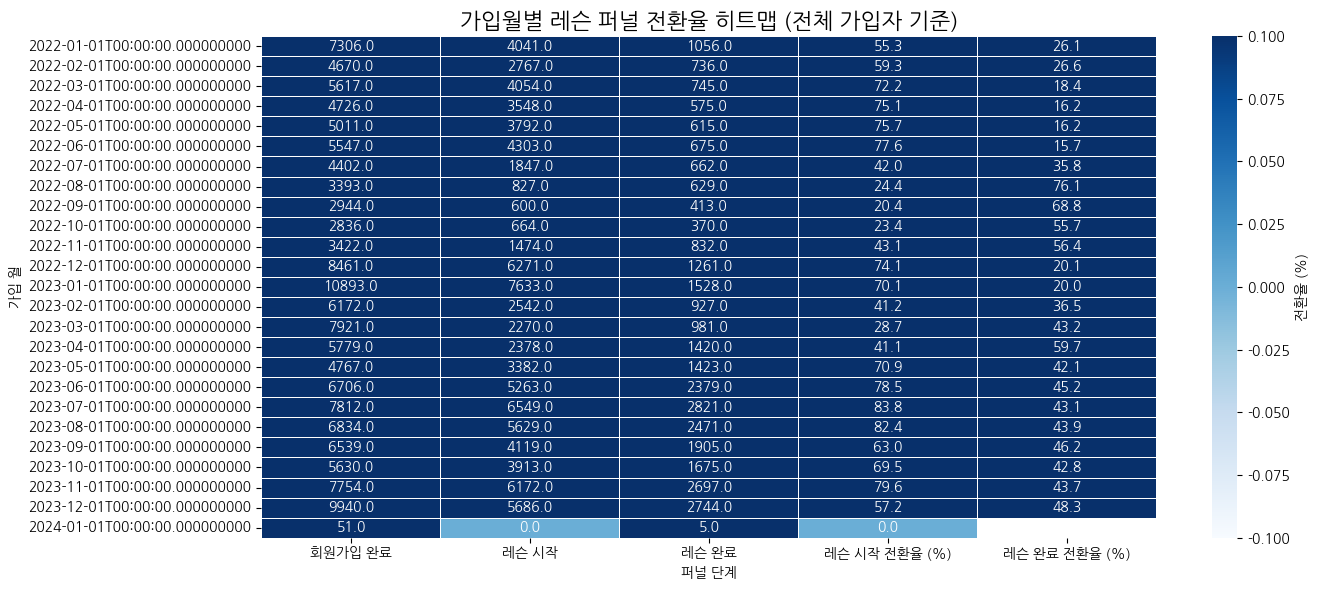

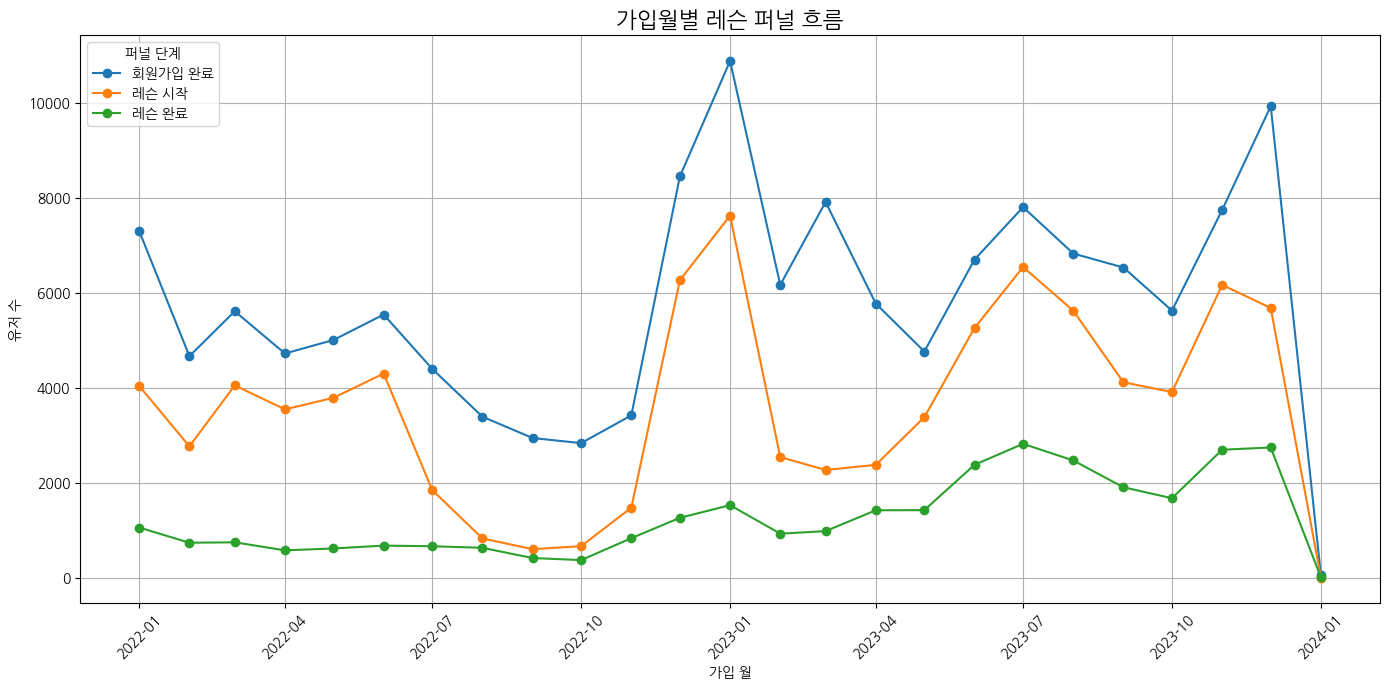

In [ ]:
# ÌûàÌä∏Îßµ
plt.figure(figsize=(14,6))
sns.heatmap(lesson_conversion_by_month, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5, cbar_kws={'label': 'Ï†ÑÌôòÏú® (%)'})
plt.title('Í∞ÄÏûÖÏõîÎ≥Ñ Î†àÏä® ÌçºÎÑê Ï†ÑÌôòÏú® ÌûàÌä∏Îßµ (Ï†ÑÏ≤¥ Í∞ÄÏûÖÏûê Í∏∞Ï§Ä)', fontsize=16)
plt.xlabel('ÌçºÎÑê Îã®Í≥Ñ')
plt.ylabel('Í∞ÄÏûÖ Ïõî')
plt.tight_layout()
plt.show()

# ÎùºÏù∏Í∑∏ÎûòÌîÑ
only_counts = lesson_funnel_by_month[['ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å', 'Î†àÏä® ÏãúÏûë', 'Î†àÏä® ÏôÑÎ£å']]

plt.figure(figsize=(14,7))
for step in only_counts.columns:
    plt.plot(only_counts.index, only_counts[step], marker='o', label=step)

plt.title('Í∞ÄÏûÖÏõîÎ≥Ñ Î†àÏä® ÌçºÎÑê ÌùêÎ¶Ñ', fontsize=16)
plt.xlabel('Í∞ÄÏûÖ Ïõî')
plt.ylabel('Ïú†Ï†Ä Ïàò')
plt.xticks(rotation=45)
plt.legend(title='ÌçºÎÑê Îã®Í≥Ñ')
plt.grid(True)
plt.tight_layout()
plt.show()


## Î¨¥Î£åÏ≤¥Ìóò -> Ïú†Î£å Ï†ÑÌôò -> Ïù¥ÌÉà/Ï†ÑÌôò ÌùêÎ¶Ñ Î∂ÑÏÑù

In [ ]:
# Í∞Å Ïù¥Î≤§Ìä∏Î≥Ñ Îç∞Ïù¥ÌÑ∞ Î°úÎî© (ÌïÑÏöîÏª¨ÎüºÎßå)
df_trial = free_trial[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'trial_time'})
df_sub = complete_sub[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'sub_time'})
df_cancel = click_cancel[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'cancel_time'})

# Ïú†Ï†Äid Í∏∞Ï§ÄÏúºÎ°ú join
df = df_trial.merge(df_sub, on='user_id', how='left').merge(df_cancel, on='user_id', how='left')

In [ ]:
total_trial = len(df)  # Î¨¥Î£åÏ≤¥Ìóò ÏãúÏûëÌïú Ï†ÑÏ≤¥ Ïú†Ï†Ä Ïàò
converted = df['sub_time'].notna().sum()  # Ïú†Î£å Íµ¨ÎèÖ Ï†ÑÌôòÌïú Ïú†Ï†Ä Ïàò

# 1. Î¨¥Î£åÏ≤¥ÌóòÎßå ÌïòÍ≥† Ïù¥ÌÉàÌïú Ïú†Ï†Ä (Ï†ÑÌôòÌïòÏßÄ ÏïäÏùå)
trial_only = df[df['sub_time'].isna()]
trial_only_count = len(trial_only)
trial_only_rate = trial_only_count / total_trial

# 2. Ïú†Î£å Íµ¨ÎèÖ ÌõÑ Ïù¥ÌÉàÌïú Ïú†Ï†Ä
churned_after_sub = df[(df['sub_time'].notna()) & (df['cancel_time'].notna())]
churned_after_sub_count = len(churned_after_sub)
churn_rate = churned_after_sub_count / converted if converted > 0 else 0

# Íµ¨ÎèÖÏú†ÏßÄ Ïú†Ï†Ä Ïàò
remain_sub_count = converted - churned_after_sub_count

In [ ]:
# ÏãúÍ∞ÅÌôîÏö© ÌçºÎÑê Í∞í Ï†ïÏùò
labels = ['Î¨¥Î£åÏ≤¥Ìóò ÏãúÏûë', 'Ïú†Î£å Ï†ÑÌôò', 'Ï†ÑÌôò Ï†Ñ Ïù¥ÌÉà', 'Ï†ÑÌôò ÌõÑ Ïù¥ÌÉà', 'Ïú†ÏßÄ']
values = [
    total_trial,
    converted,
    trial_only_count,
    churned_after_sub_count,
    remain_sub_count
]

# ÌçºÎÑê Ï∞®Ìä∏ Í∑∏Î¶¨Í∏∞
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
bars = plt.barh(labels[::-1], values[::-1], color='skyblue')
plt.title('Î¨¥Î£åÏ≤¥Ìóò ‚Üí Ïú†Î£å Íµ¨ÎèÖ ‚Üí Ïù¥ÌÉà ÌçºÎÑê')
plt.xlabel('Ïú†Ï†Ä Ïàò')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Í∞í ÎùºÎ≤® ÌëúÏãú
for bar, value in zip(bars, values[::-1]):
    plt.text(bar.get_width() + total_trial * 0.01, bar.get_y() + bar.get_height() / 2,
             f'{value:,}Î™Ö', va='center', fontsize=10)

# Ï†ÑÌôòÎ•†/Ïù¥ÌÉàÎ•† ÌÖçÏä§Ìä∏ ÌëúÏãú
plt.figtext(0.6, 0.25, f'Ïú†Î£å Ï†ÑÌôòÎ•†: {converted / total_trial:.2%}', fontsize=10)
plt.figtext(0.6, 0.20, f'Ï†ÑÌôò Ï†Ñ Ïù¥ÌÉàÎ•†: {trial_only_rate:.2%}', fontsize=10)
plt.figtext(0.6, 0.15, f'Ï†ÑÌôò ÌõÑ Ïù¥ÌÉàÎ•†: {churn_rate:.2%}', fontsize=10)
plt.tight_layout()
plt.show()

# Retention(Ïú†ÏßÄ)

## Î¶¨ÌÖêÏÖò Ï∞®Ìä∏

In [ ]:
# --- 1. ÏΩîÌò∏Ìä∏ Ï†ïÏùò (Í∞ÄÏûÖ Ïõî Í∏∞Ï§Ä) ---
if 'complete_signup' not in globals() or complete_signup.empty:
    print("Ïò§Î•ò: 'comp_signup_df' Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ ÏΩîÌò∏Ìä∏ Î∂ÑÏÑùÏùÑ ÏãúÏûëÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
else:
    comp_signup_df = complete_signup.copy()
    if not all(col in comp_signup_df.columns for col in ['user_id', 'client_event_time']):
        print("Ïò§Î•ò: 'comp_signup'Ïóê 'user_id' ÎòêÎäî 'client_event_time' Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")
    else:
        # ÏÇ¨Ïö©ÏûêÎ≥Ñ Ï≤´ Í∞ÄÏûÖ ÏãúÍ∞Ñ Í∏∞Ï§Ä
        signup_cohort = comp_signup_df.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
        # Í∞ÄÏûÖ Ïõî Ï∂îÏ∂ú (YYYY-MM ÌòïÏãùÏùò Period Í∞ùÏ≤¥)
        signup_cohort['cohort_month'] = signup_cohort['client_event_time'].dt.to_period('M')
        signup_cohort = signup_cohort[['user_id', 'cohort_month']]
        print("--- ÏΩîÌò∏Ìä∏ Ï†ïÏùò ÏôÑÎ£å (Í∞ÄÏûÖ Ïõî Í∏∞Ï§Ä) ---")
        print(signup_cohort.head())

In [ ]:
# --- 2. ÏÇ¨Ïö©Ïûê ÌôúÎèô Ï∂îÏ†Å ---
# Î¶¨ÌÖêÏÖò Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† Î™®Îì† ÌôúÎèô Î°úÍ∑∏ DF Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏
activity_df_names = [
    'click_cancle_df', 'more_review_df', 'start_content_btn_df', 'click_lesson_df',
    'comp_lesson_df', 'comp_sub_df', 'end_content_df', 'enter_content_df',
    'enter_lesson_df', 'enter_main_df', 'enter_signup_df', 'renew_df', 'resub_df',
    'start_content_df', 'start_free_df'
]

In [ ]:
all_activity_dfs = []
for name in activity_df_names:
    if name in globals() and isinstance(globals()[name], pd.DataFrame) and not globals()[name].empty:
        df = globals()[name]
        if 'user_id' in df.columns and 'client_event_time' in df.columns:
            all_activity_dfs.append(df[['user_id', 'client_event_time']])
        else:
            print(f"Í≤ΩÍ≥†: '{name}' DataFrameÏóê ÌïÑÏàò Ïª¨ÎüºÏù¥ ÏóÜÏñ¥ ÌôúÎèô Ï∂îÏ†ÅÏóêÏÑú Ï†úÏô∏Îê©ÎãàÎã§.")

if not all_activity_dfs:
    print("Ïò§Î•ò: ÏÇ¨Ïö©Ïûê ÌôúÎèôÏùÑ Ï∂îÏ†ÅÌï† Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
else:
    all_activities = pd.concat(all_activity_dfs, ignore_index=True)
    all_activities.dropna(subset=['user_id', 'client_event_time'], inplace=True)

    if all_activities.empty:
        print("Ïò§Î•ò: Ïú†Ìö®Ìïú ÌôúÎèô Î°úÍ∑∏Í∞Ä ÏóÜÏäµÎãàÎã§.")
    else:
        # ÌôúÎèô Ïõî Ï∂îÏ∂ú
        all_activities['activity_month'] = all_activities['client_event_time'].dt.to_period('M')
        print(f"Ï¥ù {len(all_activities)} Í±¥Ïùò ÌôúÎèô Î°úÍ∑∏ ÌÜµÌï© Î∞è ÌôúÎèô Ïõî Ï∂îÏ∂ú ÏôÑÎ£å.")

In [ ]:
# --- 3. ÏΩîÌò∏Ìä∏Î≥Ñ ÏõîÎ≥Ñ ÌôúÎèôÎ•† Í≥ÑÏÇ∞ ---
# ÌôúÎèô Îç∞Ïù¥ÌÑ∞Ïóê ÏΩîÌò∏Ìä∏ Ï†ïÎ≥¥ Î≥ëÌï©
cohort_activity = pd.merge(
    all_activities[['user_id', 'activity_month']].drop_duplicates(), # ÏõîÎ≥Ñ ÌôúÎèôÏùÄ Ìïú Î≤àÎßå Ïπ¥Ïö¥Ìä∏
    signup_cohort,
    on='user_id',
    how='inner' # Í∞ÄÏûÖ Ï†ïÎ≥¥Í∞Ä ÏûàÎäî ÏÇ¨Ïö©ÏûêÏùò ÌôúÎèôÎßå Í≥†Î†§
)

In [ ]:
# ÏΩîÌò∏Ìä∏ ÏõîÍ≥º ÌôúÎèô ÏõîÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏßëÍ≥Ñ
cohort_data = cohort_activity.groupby(['cohort_month', 'activity_month'])['user_id'].nunique().reset_index()
cohort_data.rename(columns={'user_id': 'active_users'}, inplace=True)

# ÏΩîÌò∏Ìä∏ Ïõî ÎåÄÎπÑ ÌôúÎèô ÏõîÏùò Ï∞®Ïù¥(Í∞úÏõî Ïàò) Í≥ÑÏÇ∞
# Period Í∞ùÏ≤¥ Í∞ÑÏùò Î∫ÑÏÖàÏúºÎ°ú Í∞úÏõî Ïàò Ï∞®Ïù¥ Í≥ÑÏÇ∞
cohort_data['cohort_index'] = (cohort_data['activity_month'] - cohort_data['cohort_month']).apply(lambda x: x.n)

# ÏΩîÌò∏Ìä∏Î≥Ñ ÏÇ¨Ïù¥Ï¶à(Ï¥àÍ∏∞ ÏÇ¨Ïö©Ïûê Ïàò) Í≥ÑÏÇ∞
cohort_size = signup_cohort.groupby('cohort_month')['user_id'].nunique().reset_index()
cohort_size.rename(columns={'user_id': 'cohort_total_users'}, inplace=True)

# ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ± Ï§ÄÎπÑ (ÏΩîÌò∏Ìä∏ ÌÅ¨Í∏∞ Î≥ëÌï©)
cohort_retention_cal = pd.merge(cohort_data, cohort_size, on='cohort_month', how='left')

In [ ]:
# ÏΩîÌò∏Ìä∏ Î¶¨ÌÖêÏÖò ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ± (Í∞í: ÌôúÎèô ÏÇ¨Ïö©Ïûê Ïàò)
cohort_pivot = cohort_retention_cal.pivot_table(
    index='cohort_month',
    columns='cohort_index',
    values='active_users'
)

# Î¶¨ÌÖêÏÖò ÎπÑÏú® Í≥ÑÏÇ∞ ( ÌôúÎèô ÏÇ¨Ïö©Ïûê Ïàò / ÏΩîÌò∏Ìä∏ ÌÅ¨Í∏∞ )
cohort_size_series = cohort_size.set_index('cohort_month')['cohort_total_users']
retention_matrix = cohort_pivot.divide(cohort_size_series, axis=0)

In [ ]:
# --- 4. Î¶¨ÌÖêÏÖò Ïª§Î∏å ÏãúÍ∞ÅÌôî (Heatmap) ---
plt.figure(figsize=(15, 8))

# ÏùåÏàò index Ï†úÍ±∞
retention_matrix = retention_matrix.loc[:, retention_matrix.columns >= 0]

sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='viridis', linewidths=.5)
plt.title('Retention Chart')
plt.xlabel('Month Index')
plt.ylabel('Cohort')

plt.show()

print("\n--- ÏõîÎ≥Ñ ÏΩîÌò∏Ìä∏ Î¶¨ÌÖêÏÖò (%) ---")
print((retention_matrix * 100).round(1)) # ÌçºÏÑºÌä∏Î°ú Î≥¥Í∏∞ Ï¢ãÍ≤å Ï∂úÎ†•

### Î¨¥Î£åÏ≤¥Ìóò Ïú†Ï†Ä Î¶¨ÌÖêÏÖò Ï∞®Ìä∏

In [ ]:
# 1. Ï≤¥Ìóò Ïú†Ï†Ä Î¶¨Ïä§Ìä∏
trial_users = free_trial['user_id'].drop_duplicates()

# 2. signup_dfÏóê Ï≤¥Ìóò Ïó¨Î∂Ä Ï∂îÍ∞Ä
signup_df['is_trial'] = signup_df['user_id'].isin(trial_users)

# 3. Í∞ÄÏûÖ Ïù¥Î≤§Ìä∏ Ï†úÍ±∞
signup_events = pd.concat([
    complete_signup[['user_id', 'client_event_time']],
    enter_signup[['user_id', 'client_event_time']]
], ignore_index=True)

signup_events['client_event_time'] = pd.to_datetime(signup_events['client_event_time'])
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'])

activity_only = all_events.merge(signup_events, on=['user_id', 'client_event_time'], how='left', indicator=True)
activity_only = activity_only[activity_only['_merge'] == 'left_only'].drop(columns=['_merge'])

# 4. ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ Î¶¨ÌÖêÏÖò Î∂ÑÏÑù
result_frames = []

for segment, segment_name in [(True, 'trial'), (False, 'non_trial')]:
    # 4-1. Ìï¥Îãπ ÏÑ∏Í∑∏Î®ºÌä∏ Ïú†Ï†Ä
    segment_users = signup_df[signup_df['is_trial'] == segment][['user_id', 'signup_time']]
    segment_users['signup_month'] = segment_users['signup_time'].dt.to_period('M').dt.to_timestamp()

    # 4-2. ÌôúÎèô Î°úÍ∑∏ Î≥ëÌï© Î∞è ÌïÑÌÑ∞
    merged = activity_only.merge(segment_users, on='user_id', how='inner')
    merged = merged[merged['client_event_time'] >= merged['signup_time']]

    # 4-3. Î¶¨ÌÖêÏÖò Í∏∞Ï§Ä: Í∞ÄÏûÖ ÌõÑ nÍ∞úÏõîÏ∞® ÌôúÎèô Ïó¨Î∂Ä
    # 4-3. Î¶¨ÌÖêÏÖò Í∏∞Ï§Ä: Í∞ÄÏûÖ ÌõÑ nÍ∞úÏõîÏ∞® ÌôúÎèô Ïó¨Î∂Ä (ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ)
    merged['activity_month'] = merged['client_event_time'].dt.to_period('M').dt.to_timestamp()

    merged['month_diff'] = (
        merged['activity_month'].dt.to_period('M') - merged['signup_month'].dt.to_period('M')
    ).apply(lambda x: x.n)

    # 4-4. Î¶¨ÌÖêÏÖò ÏßëÍ≥Ñ
    cohort = merged.groupby(['signup_month', 'month_diff'])['user_id'].nunique().reset_index()
    total_users = segment_users.groupby('signup_month')['user_id'].nunique().reset_index()
    total_users.columns = ['signup_month', 'total_users']
    cohort = cohort.merge(total_users, on='signup_month', how='left')
    cohort['retention'] = cohort['user_id'] / cohort['total_users']
    cohort['segment'] = segment_name

    result_frames.append(cohort)

# 5. Í≤∞Í≥º ÌÜµÌï©
retention_by_segment = pd.concat(result_frames)

# 6. ÌîºÎ≤ó ÌÖåÏù¥Î∏îÎ°ú Î≥¥Í∏∞ Ï¢ãÍ≤å
retention_pivot = retention_by_segment.pivot_table(
    index=['signup_month', 'month_diff'],
    columns='segment',
    values='retention'
).reset_index()

# Ï∂úÎ†•
# print("Ï≤¥Ìóò vs ÏùºÎ∞ò Ïú†Ï†Ä Î¶¨ÌÖêÏÖò (Ïõî Í∏∞Ï§Ä)")
# print(retention_pivot.round(3))

monthly_comparison = retention_pivot.pivot_table(
    index='month_diff',
    values=['trial', 'non_trial'],
    aggfunc='mean'
).round(3)

print("ÏõîÏ∞®Î≥Ñ ÌèâÍ∑† Î¶¨ÌÖêÏÖò ÎπÑÍµê (Ï†ÑÏ≤¥ ÏΩîÌò∏Ìä∏ ÌèâÍ∑†)")
print(monthly_comparison)

In [ ]:
heatmap_data = retention_by_segment[retention_by_segment['segment'] == 'trial']
pivoted = heatmap_data.pivot(index='signup_month', columns='month_diff', values='retention')

plt.figure(figsize=(18, 10))
sns.heatmap(pivoted, annot=True, fmt=".0%", cmap="YlGnBu")
plt.title("Ï≤¥Ìóò Ïú†Ï†Ä ÏõîÏ∞®Î≥Ñ Î¶¨ÌÖêÏÖò ÌûàÌä∏Îßµ")
plt.xlabel("Í∞ÄÏûÖ ÌõÑ NÍ∞úÏõîÏ∞®")
plt.ylabel("Í∞ÄÏûÖ Ïõî")
plt.show()

### ÎÇúÏù¥ÎèÑÎ≥Ñ Î¶¨ÌÖêÏÖò Ï∞®Ìä∏

In [ ]:
# 1. Í∞ÄÏûÖ Ï†ïÎ≥¥ Ï§ÄÎπÑ
signup_df = complete_signup[['user_id', 'client_event_time']].drop_duplicates()
signup_df['signup_time'] = pd.to_datetime(signup_df['client_event_time'])
signup_df['signup_month'] = signup_df['signup_time'].dt.to_period('M').dt.to_timestamp()

# 2. Ï≤´ ÏΩòÌÖêÏ∏† ÏãúÏ≤≠ + ÎÇúÏù¥ÎèÑ Ï∂îÏ∂ú
start_content['client_event_time'] = pd.to_datetime(start_content['client_event_time'])

first_content = (
    start_content
    .sort_values('client_event_time')
    .groupby('user_id')
    .first()
    .reset_index()
)
first_content = first_content[['user_id', 'client_event_time', 'content.difficulty']]

# 3. ÎÇúÏù¥ÎèÑ Ï†ïÎ≥¥ Í∞ÄÏûÖ Ïú†Ï†ÄÏóê Î≥ëÌï©
signup_df = signup_df.merge(first_content, on='user_id', how='left')

# 4. Í∞ÄÏûÖ Ïù¥Î≤§Ìä∏ Ï†úÍ±∞
signup_events = pd.concat([
    complete_signup[['user_id', 'client_event_time']],
    enter_signup[['user_id', 'client_event_time']]
], ignore_index=True)

signup_events['client_event_time'] = pd.to_datetime(signup_events['client_event_time'])
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'])

activity_only = all_events.merge(signup_events, on=['user_id', 'client_event_time'], how='left', indicator=True)
activity_only = activity_only[activity_only['_merge'] == 'left_only'].drop(columns=['_merge'])

# 5. Î¶¨ÌÖêÏÖò Î∂ÑÏÑù
result_frames = []

for level in signup_df['content.difficulty'].dropna().unique():
    # 5-1. Ìï¥Îãπ ÎÇúÏù¥ÎèÑ Ïú†Ï†Ä ÌïÑÌÑ∞ÎßÅ
    level_users = signup_df[signup_df['content.difficulty'] == level][['user_id', 'signup_time', 'signup_month']]

    # 5-2. ÌôúÎèô Î°úÍ∑∏ Î≥ëÌï© Î∞è ÌïÑÌÑ∞
    merged = activity_only.merge(level_users, on='user_id', how='inner')
    merged = merged[merged['client_event_time'] >= merged['signup_time']]
    merged['activity_month'] = merged['client_event_time'].dt.to_period('M').dt.to_timestamp()

    merged['month_diff'] = (
        merged['activity_month'].dt.to_period('M') - merged['signup_month'].dt.to_period('M')
    ).apply(lambda x: x.n)

    # 5-3. Î¶¨ÌÖêÏÖò Í≥ÑÏÇ∞
    cohort = merged.groupby(['signup_month', 'month_diff'])['user_id'].nunique().reset_index()
    total_users = level_users.groupby('signup_month')['user_id'].nunique().reset_index()
    total_users.columns = ['signup_month', 'total_users']
    cohort = cohort.merge(total_users, on='signup_month', how='left')
    cohort['retention'] = cohort['user_id'] / cohort['total_users']
    cohort['difficulty'] = level

    result_frames.append(cohort)

# 6. Í≤∞Í≥º ÌÜµÌï©
difficulty_retention = pd.concat(result_frames)

# 7. ÌîºÎ≤ó ÌÖåÏù¥Î∏îÎ°ú Î≥¥Í∏∞ Ï¢ãÍ≤å
retention_pivot = difficulty_retention.pivot_table(
    index=['signup_month', 'month_diff'],
    columns='difficulty',
    values='retention'
).reset_index()

# Í≤∞Í≥º Ï∂úÎ†•
print("ÎÇúÏù¥ÎèÑÎ≥Ñ Ï≤´ ÏΩòÌÖêÏ∏† Ïú†Ï†Ä Î¶¨ÌÖêÏÖò (Ïõî Í∏∞Ï§Ä)")
print(retention_pivot.round(3))

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=difficulty_retention,
    x='month_diff',
    y='retention',
    hue='difficulty',
    marker='o'
)

plt.title('ÎÇúÏù¥ÎèÑÎ≥Ñ Ï≤´ ÏΩòÌÖêÏ∏† Ïú†Ï†Ä Î¶¨ÌÖêÏÖòÎ•† (Ïõî Í∏∞Ï§Ä)')
plt.xlabel('Í∞ÄÏûÖ ÌõÑ NÍ∞úÏõî')
plt.ylabel('Î¶¨ÌÖêÏÖòÏú®')
plt.ylim(0, 1.05)
plt.legend(title='ÎÇúÏù¥ÎèÑ')
plt.grid(True)
plt.tight_layout()
plt.show()

### Î†àÏä® ÏôÑÎ£å Í∏∞Ï§Ä Î¶¨ÌÖêÏÖò

In [ ]:
# 1. Í∞ÄÏûÖ Ï†ïÎ≥¥
signup_df = complete_signup[['user_id', 'client_event_time']].drop_duplicates()
signup_df['signup_time'] = pd.to_datetime(signup_df['client_event_time'])
signup_df['signup_month'] = signup_df['signup_time'].dt.to_period('M').dt.to_timestamp()

# 2. ÏôÑÍ∞ï Î°úÍ∑∏
complete_lesson['client_event_time'] = pd.to_datetime(complete_lesson['client_event_time'])

# 3. Í∞ÄÏûÖ Ïú†Ï†Ä Ï§ë ÏôÑÍ∞ï ÌôúÎèô Î≥ëÌï©
merged = complete_lesson.merge(signup_df[['user_id', 'signup_time', 'signup_month']], on='user_id', how='inner')

# 4. Í∞ÄÏûÖ Ïù¥ÌõÑ ÌôúÎèôÎßå Ìè¨Ìï®
merged = merged[merged['client_event_time'] >= merged['signup_time']]
merged['activity_month'] = merged['client_event_time'].dt.to_period('M').dt.to_timestamp()

# 5. Í∞ÄÏûÖ ÌõÑ Î™á Í∞úÏõî Ï∞®Ïóê ÏôÑÍ∞ïÌñàÎäîÏßÄ Í≥ÑÏÇ∞
merged['month_diff'] = (
    merged['activity_month'].dt.to_period('M') - merged['signup_month'].dt.to_period('M')
).apply(lambda x: x.n)

# 6. Î¶¨ÌÖêÏÖò ÏßëÍ≥Ñ
cohort = merged.groupby(['signup_month', 'month_diff'])['user_id'].nunique().reset_index()
total_users = signup_df.groupby('signup_month')['user_id'].nunique().reset_index()
total_users.columns = ['signup_month', 'total_users']
cohort = cohort.merge(total_users, on='signup_month', how='left')
cohort['retention'] = cohort['user_id'] / cohort['total_users']

# 7. ÌîºÎ≤ó ÌÖåÏù¥Î∏îÎ°ú Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ¶¨
retention_matrix = cohort.pivot(index='signup_month', columns='month_diff', values='retention')

# 8. Ï∂úÎ†•
print("Î†àÏä® ÏôÑÎ£å Í∏∞Ï§Ä Î¶¨ÌÖêÏÖò (Ïõî Í∏∞Ï§Ä)")
print(retention_matrix.round(3))

In [ ]:
plt.figure(figsize=(18, 10))
sns.heatmap(retention_matrix, annot=True, fmt=".0%", cmap="YlGnBu")
plt.title("Î†àÏä® ÏôÑÎ£å Í∏∞Ï§Ä Î¶¨ÌÖêÏÖò (Ïõî Í∏∞Ï§Ä ÌûàÌä∏Îßµ)")
plt.xlabel("Í∞ÄÏûÖ ÌõÑ NÍ∞úÏõî")
plt.ylabel("Í∞ÄÏûÖ Ïõî")
plt.tight_layout()
plt.show()

#### Î¨¥Î£åÏ≤¥Ìóò vs ÏùºÎ∞ò Ïú†Ï†Ä Î¶¨ÌÖêÏÖò ÎπÑÍµê

In [ ]:
# 1. Ï≤¥Ìóò Ïú†Ï†Ä Ï†ïÏùò
trial_users = free_trial['user_id'].drop_duplicates()
signup_df['is_trial'] = signup_df['user_id'].isin(trial_users)

# 2. Í∞ÄÏûÖÏûê Í∏∞Ï§Ä ÌÖåÏù¥Î∏î Ï§ÄÎπÑ
signup_df['signup_time'] = pd.to_datetime(signup_df['client_event_time'])
signup_df['signup_month'] = signup_df['signup_time'].dt.to_period('M').dt.to_timestamp()

# 3. ÏôÑÍ∞ï Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
complete_lesson['client_event_time'] = pd.to_datetime(complete_lesson['client_event_time'])

# 4. Í∞ÄÏûÖ Ïù¥Î≤§Ìä∏ Ïù¥ÌõÑ ÏôÑÎ£åÎßå Ìè¨Ìï®
result_frames = []

for segment, name in [(True, 'trial'), (False, 'non_trial')]:
    # Ìï¥Îãπ ÏÑ∏Í∑∏Î®ºÌä∏ Ïú†Ï†Ä ÌïÑÌÑ∞
    segment_users = signup_df[signup_df['is_trial'] == segment][['user_id', 'signup_time', 'signup_month']]

    # complete_lesson Î≥ëÌï©
    merged = complete_lesson.merge(segment_users, on='user_id', how='inner')
    merged = merged[merged['client_event_time'] >= merged['signup_time']]
    merged['activity_month'] = merged['client_event_time'].dt.to_period('M').dt.to_timestamp()

    # Í∞ÄÏûÖ ÌõÑ Î™á Í∞úÏõî Ï∞®Ïóê ÏôÑÎ£åÌñàÎäîÏßÄ
    merged['month_diff'] = (
        merged['activity_month'].dt.to_period('M') - merged['signup_month'].dt.to_period('M')
    ).apply(lambda x: x.n)

    # Î¶¨ÌÖêÏÖò ÏßëÍ≥Ñ
    cohort = merged.groupby(['signup_month', 'month_diff'])['user_id'].nunique().reset_index()
    total_users = segment_users.groupby('signup_month')['user_id'].nunique().reset_index()
    total_users.columns = ['signup_month', 'total_users']
    cohort = cohort.merge(total_users, on='signup_month', how='left')
    cohort['retention'] = cohort['user_id'] / cohort['total_users']
    cohort['segment'] = name

    result_frames.append(cohort)

# 5. ÌÜµÌï©
retention_by_segment = pd.concat(result_frames)

# 6. ÌîºÎ≤ó (ÌûàÌä∏ÎßµÏö©)
trial_heatmap = retention_by_segment[retention_by_segment['segment'] == 'trial'].pivot(
    index='signup_month', columns='month_diff', values='retention'
)
nontrial_heatmap = retention_by_segment[retention_by_segment['segment'] == 'non_trial'].pivot(
    index='signup_month', columns='month_diff', values='retention'
)

In [ ]:
# 1. ÏµúÎåÄÍ∞í Í∏∞Ï§Ä ÏÉâÏÉÅ Í≥†Ï†ï (ÎπÑÍµê Ïãú ÏôúÍ≥° Î∞©ÏßÄ)
vmin = 0
vmax = retention_by_segment['retention'].max()

# 2. ÏùºÎ∞ò Ïú†Ï†Ä ÌûàÌä∏Îßµ
plt.figure(figsize=(14, 6))
sns.heatmap(
    nontrial_heatmap,
    mask=nontrial_heatmap.isna(),  # NaNÏùÄ Í≥µÎ∞±
    annot=True,
    fmt=".0%",
    cmap="YlGnBu",
    linewidths=0.5,
    vmin=vmin,
    vmax=vmax,
    annot_kws={"size": 9}
)
plt.title("ÏùºÎ∞ò Ïú†Ï†Ä Î¶¨ÌÖêÏÖò (Î†àÏä® ÏôÑÎ£å Í∏∞Ï§Ä)", fontsize=14)
plt.xlabel("Í∞ÄÏûÖ ÌõÑ NÍ∞úÏõîÏ∞®", fontsize=12)
plt.ylabel("Í∞ÄÏûÖ Ïõî", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Î¨¥Î£åÎ£åÏ≤¥Ìóò Ïú†Ï†Ä ÌûàÌä∏Îßµ
plt.figure(figsize=(14, 6))
sns.heatmap(
    trial_heatmap,
    mask=trial_heatmap.isna(),  # NaNÏùÄ Í≥µÎ∞±
    annot=True,
    fmt=".0%",
    cmap="YlGnBu",
    linewidths=0.5,
    vmin=vmin,
    vmax=vmax,
    annot_kws={"size": 9}
)
plt.title("Î¨¥Î£åÏ≤¥Ìóò Ïú†Ï†Ä Î¶¨ÌÖêÏÖò (Î†àÏä® ÏôÑÎ£å Í∏∞Ï§Ä)", fontsize=14)
plt.xlabel("Í∞ÄÏûÖ ÌõÑ NÍ∞úÏõîÏ∞®", fontsize=12)
plt.ylabel("Í∞ÄÏûÖ Ïõî", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

# ÏõîÏ∞® Í∏∞Ï§Ä Ï≤¥Ìóò vs ÏùºÎ∞ò Î¶¨ÌÖêÏÖò ÎπÑÍµê
sns.lineplot(
    data=retention_by_segment,
    x='month_diff',
    y='retention',
    hue='segment',
    marker='o'
)

plt.title('Ï≤¥Ìóò vs ÏùºÎ∞ò Ïú†Ï†Ä Î†àÏä® ÏôÑÎ£å Í∏∞Ï§Ä Î¶¨ÌÖêÏÖò (Ïõî Í∏∞Ï§Ä)')
plt.xlabel('Í∞ÄÏûÖ ÌõÑ NÍ∞úÏõîÏ∞®')
plt.ylabel('Î¶¨ÌÖêÏÖòÏú®')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(title='Ïú†Ï†Ä Íµ¨Î∂Ñ')
plt.tight_layout()
plt.show()

#### Ï≤¥Ìóò Ïú†Ï†Ä Ï§ë Ïú†Î£åÏ†ÑÌôò vs ÎπÑÏ†ÑÌôò Î¶¨ÌÖêÏÖò ÎπÑÍµê

In [ ]:
# 1. Ï≤¥Ìóò Ïú†Ï†Ä Ï†ïÏùò
trial_users = free_trial['user_id'].drop_duplicates()
signup_df['is_trial'] = signup_df['user_id'].isin(trial_users)

# 2. Ï≤¥Ìóò Ïú†Ï†Ä Ï§ë Ïú†Î£å Í≤∞Ï†ú Ïú†Ï†Ä Ï†ïÏùò
paid_users = complete_sub['user_id'].drop_duplicates()
signup_df['is_paid'] = signup_df['user_id'].isin(paid_users)

# 3. Ï≤¥Ìóò Ïú†Ï†Ä Ï§ë Ïú†Î£å/ÎπÑÏú†Î£å ÏÑ∏Í∑∏Î®ºÌä∏ ÌïÑÌÑ∞
trial_paid = signup_df[(signup_df['is_trial']) & (signup_df['is_paid'])].copy()
trial_free = signup_df[(signup_df['is_trial']) & (~signup_df['is_paid'])].copy()

# 4. ÏãúÍ∞Ñ Ï≤òÎ¶¨
trial_paid['signup_time'] = pd.to_datetime(trial_paid['client_event_time'])
trial_paid['signup_month'] = trial_paid['signup_time'].dt.to_period('M').dt.to_timestamp()

trial_free['signup_time'] = pd.to_datetime(trial_free['client_event_time'])
trial_free['signup_month'] = trial_free['signup_time'].dt.to_period('M').dt.to_timestamp()

complete_lesson['client_event_time'] = pd.to_datetime(complete_lesson['client_event_time'])

# 5. Î¶¨ÌÖêÏÖò Í≥ÑÏÇ∞ Ìï®Ïàò
def calc_retention(signup_group, label):
    merged = complete_lesson.merge(signup_group[['user_id', 'signup_time', 'signup_month']], on='user_id', how='inner')
    merged = merged[merged['client_event_time'] >= merged['signup_time']]
    merged['activity_month'] = merged['client_event_time'].dt.to_period('M').dt.to_timestamp()
    merged['month_diff'] = (
        merged['activity_month'].dt.to_period('M') - merged['signup_month'].dt.to_period('M')
    ).apply(lambda x: x.n)

    cohort = merged.groupby(['signup_month', 'month_diff'])['user_id'].nunique().reset_index()
    total = signup_group.groupby('signup_month')['user_id'].nunique().reset_index()
    total.columns = ['signup_month', 'total_users']
    cohort = cohort.merge(total, on='signup_month', how='left')
    cohort['retention'] = cohort['user_id'] / cohort['total_users']
    cohort['segment'] = label
    return cohort

# 6. Í≥ÑÏÇ∞
paid_retention = calc_retention(trial_paid, 'trial_paid')
free_retention = calc_retention(trial_free, 'trial_free')

retention_comparison = pd.concat([paid_retention, free_retention])

In [ ]:
monthly = retention_comparison.groupby(['month_diff', 'segment'])['retention'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly,
    x='month_diff',
    y='retention',
    hue='segment',
    marker='o'
)

plt.title("Ï≤¥Ìóò Ïú†Ï†Ä Ï§ë Ïú†Î£å vs ÎπÑÏ†ÑÌôòÏûê Î¶¨ÌÖêÏÖò ÎπÑÍµê (Î†àÏä® ÏôÑÎ£å Í∏∞Ï§Ä)", fontsize=14)
plt.xlabel("Í∞ÄÏûÖ ÌõÑ NÍ∞úÏõîÏ∞®")
plt.ylabel("ÌèâÍ∑† Î¶¨ÌÖêÏÖòÏú®")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(title='Ïú†Ï†Ä Ïú†Ìòï')
plt.tight_layout()
plt.show()

## Ïú†Ï†Ä ÌñâÎèô Î∂ÑÏÑù

### ÌôúÎèôÍ∏∞Í∞Ñ Í∏∞Ï§Ä Ïú†Ï†Ä ÌñâÎèô Î∂ÑÏÑù

- Ï∂©ÏÑ±Í≥†Í∞ù, Ïù¥ÌÉàÍ≥†Í∞ùÏùÑ ÌôúÎèôÍ∏∞Í∞Ñ 30ÏùºÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Íµ¨Î∂Ñ

In [ ]:
# 1. ÌöåÏõêÍ∞ÄÏûÖ Ïú†Ï†Ä Î¶¨Ïä§Ìä∏
signup_users = signup_df['user_id'].unique()

# 2. ÌöåÏõêÍ∞ÄÏûÖ Ïú†Ï†ÄÏùò Î™®Îì† Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
filtered_events = all_events[all_events['user_id'].isin(signup_users)].copy()

# 3. ÏãúÍ∞ÑÏàú Ï†ïÎ†¨
filtered_events = filtered_events.sort_values(by=['user_id', 'client_event_time'])

# 4. Ïú†Ï†ÄÎ≥Ñ ÏãúÌÄÄÏä§ ÎßåÎì§Í∏∞
user_sequences = (
    filtered_events
    .groupby('user_id')['event_type']
    .apply(lambda x: ' ‚Üí '.join(x))
    .reset_index()
    .rename(columns={'event_type': 'event_sequence'})
)

In [ ]:
# Ïú†Ï†ÄÎ≥Ñ ÌôúÎèô Í∏∞Í∞Ñ Í≥ÑÏÇ∞
user_lifespan = (
    filtered_events.groupby('user_id')['client_event_time']
    .agg(['min', 'max'])
    .reset_index()
)
user_lifespan['days_active'] = (user_lifespan['max'] - user_lifespan['min']).dt.days

# Í∏∞Ï§Ä ÎÇòÎàÑÍ∏∞ (Ïòà: 30Ïùº Ïù¥ÏÉÅÏù¥Î©¥ Ï∂©ÏÑ± Ïú†Ï†Ä)
user_lifespan['user_type'] = user_lifespan['days_active'].apply(
    lambda d: 'loyal' if d >= 30 else 'churned'
)

# Î≥ëÌï©
user_sequences = user_sequences.merge(user_lifespan[['user_id', 'user_type']], on='user_id', how='left')

In [ ]:
# ÏÉÅÏúÑ 10Í∞ú ÏãúÌÄÄÏä§ ÎπÑÍµê
top_sequences = (
    user_sequences.groupby(['user_type', 'event_sequence'])
    .size()
    .reset_index(name='count')
    .sort_values(['user_type', 'count'], ascending=[True, False])
)

# Í∞ÅÍ∞Å ÏÉÅÏúÑ 10Í∞úÏî© Ï∂îÏ∂ú
top_loyal = top_sequences[top_sequences['user_type'] == 'loyal'].head(10)
top_churned = top_sequences[top_sequences['user_type'] == 'churned'].head(10)

print("Ï∂©ÏÑ± Ïú†Ï†Ä ÏãúÌÄÄÏä§ Top 10")
print(top_loyal)

print("\nÏù¥ÌÉà Ïú†Ï†Ä ÏãúÌÄÄÏä§ Top 10")
print(top_churned)

In [ ]:
# 1. Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
sns.set(style='whitegrid')
plt.rc('font', family='AppleGothic') # MacOS ÏòàÏãú

# 2. figure Íµ¨ÏÑ±
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# 3. Ï∂©ÏÑ± Ïú†Ï†Ä ÏãúÍ∞ÅÌôî
sns.barplot(
    data=top_loyal,
    x='count',
    y='event_sequence',
    ax=axes[0],
    palette='Blues_d'
)
axes[0].set_title('Ï∂©ÏÑ± Ïú†Ï†Ä Top 10 ÏãúÌÄÄÏä§', fontsize=14)
axes[0].set_xlabel('Ïú†Ï†Ä Ïàò')
axes[0].set_ylabel('Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§')

# 4. Ïù¥ÌÉà Ïú†Ï†Ä ÏãúÍ∞ÅÌôî
sns.barplot(
    data=top_churned,
    x='count',
    y='event_sequence',
    ax=axes[1],
    palette='Reds_d'
)
axes[1].set_title('Ïù¥ÌÉà Ïú†Ï†Ä Top 10 ÏãúÌÄÄÏä§', fontsize=14)
axes[1].set_xlabel('Ïú†Ï†Ä Ïàò')
axes[1].set_ylabel('')

# 5. Ï†ïÎ¶¨
plt.tight_layout()
plt.show()

### Íµ¨Îß§ Í∏∞Ï§Ä Ïú†Ï†Ä ÌñâÎèô Î∂ÑÏÑù

- Í≤∞Ï†ú Ïù¥Î†•Ïù¥ ÏûàÏúºÎ©¥ Ï∂©ÏÑ±Í≥†Í∞ù, Íµ¨ÎèÖ Ï∑®ÏÜå Î≤ÑÌäºÏùÑ ÌÅ¥Î¶≠ÌïòÎ©¥ Ïù¥ÌÉàÍ≥†Í∞ùÏúºÎ°ú Íµ¨Î∂Ñ

In [ ]:
# 1. ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£åÌïú Ïú†Ï†Ä Í∏∞Ï§Ä (Ïö∞Î¶¨Í∞Ä Ï†ïÏùòÌïú 'Í≥†Í∞ù')
signup_users = complete_signup['user_id'].drop_duplicates()

# 2. Í≤∞Ï†ú Í¥ÄÎ†® Ïú†Ï†Ä
paid_users = pd.concat([
    complete_sub['user_id'],
    renew_sub['user_id'],
    resub_sub['user_id']
]).drop_duplicates()

# 3. Íµ¨ÎèÖ Ï∑®ÏÜå Î≤ÑÌäº ÌÅ¥Î¶≠Ìïú Ïú†Ï†Ä
churned_users = click_cancel['user_id'].drop_duplicates()

# 4. Ïú†Ï†ÄÎ≥Ñ ÏÉÅÌÉú Ï†ïÏùò
user_status = pd.DataFrame({'user_id': signup_users})
user_status['is_paid'] = user_status['user_id'].isin(paid_users)
user_status['is_churned'] = user_status['user_id'].isin(churned_users)

# 5. Ï∂©ÏÑ± vs Ïù¥ÌÉà Í∏∞Ï§Ä:
# - Í≤∞Ï†ú Ïù¥Î†•Ïù¥ ÏûàÏúºÎ©¥ 'loyal'
# - ÎòêÎäî Íµ¨ÎèÖ Ï∑®ÏÜå Î≤ÑÌäº ÌÅ¥Î¶≠Ìïú Ïú†Ï†ÄÎäî 'churned'
user_status['user_type'] = user_status.apply(
    lambda row: 'loyal' if row['is_paid'] else ('churned' if row['is_churned'] else 'unknown'),
    axis=1
)

# 'unknown' Ï†úÍ±∞ (Ïù¥ÌÉàÎèÑ ÏïÑÎãàÍ≥† Ï∂©ÏÑ±ÎèÑ ÏïÑÎãå Ïú†Ï†Ä)
user_status = user_status[user_status['user_type'] != 'unknown']

In [ ]:
# 1. ÌöåÏõêÍ∞ÄÏûÖ Ïú†Ï†ÄÏùò Î™®Îì† Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
filtered_events = all_events[all_events['user_id'].isin(user_status['user_id'])].copy()

# 2. ÏãúÍ∞ÑÏàú Ï†ïÎ†¨
filtered_events = filtered_events.sort_values(by=['user_id', 'client_event_time'])

# 3. Ïú†Ï†ÄÎ≥Ñ ÏãúÌÄÄÏä§ ÏÉùÏÑ±
user_sequences = (
    filtered_events
    .groupby('user_id')['event_type']
    .apply(lambda x: ' ‚Üí '.join(x))
    .reset_index()
    .rename(columns={'event_type': 'event_sequence'})
)

# 4. user_type Î≥ëÌï©
user_sequences = user_sequences.merge(user_status[['user_id', 'user_type']], on='user_id', how='left')

In [ ]:
# ÏãúÌÄÄÏä§Î≥Ñ ÎπàÎèÑ Í≥ÑÏÇ∞
top_sequences = (
    user_sequences
    .groupby(['user_type', 'event_sequence'])
    .size()
    .reset_index(name='count')
    .sort_values(['user_type', 'count'], ascending=[True, False])
)

# Top 10Ïî© Ï∂îÏ∂ú
top_loyal = top_sequences[top_sequences['user_type'] == 'loyal'].head(10)
top_churned = top_sequences[top_sequences['user_type'] == 'churned'].head(10)

In [ ]:
sns.set(style='whitegrid')
plt.rc('font', family='AppleGothic') # MacOS ÏòàÏãú

fig, axes = plt.subplots(1, 2, figsize=(30, 8), sharey=True)

# Ï∂©ÏÑ± Ïú†Ï†Ä ÏãúÍ∞ÅÌôî
sns.barplot(
    data=top_loyal,
    x='count',
    y='event_sequence',
    ax=axes[0],
    palette='Blues_d'
)
axes[0].set_title('Ï∂©ÏÑ± Ïú†Ï†Ä Top 10 ÏãúÌÄÄÏä§ (Íµ¨ÎèÖ Í∏∞Ï§Ä)', fontsize=14)
axes[0].set_xlabel('Ïú†Ï†Ä Ïàò')
axes[0].set_ylabel('Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§')

# Ïù¥ÌÉà Ïú†Ï†Ä ÏãúÍ∞ÅÌôî
sns.barplot(
    data=top_churned,
    x='count',
    y='event_sequence',
    ax=axes[1],
    palette='Reds_d'
)
axes[1].set_title('Ïù¥ÌÉà Ïú†Ï†Ä Top 10 ÏãúÌÄÄÏä§ (Íµ¨ÎèÖ Í∏∞Ï§Ä)', fontsize=14)
axes[1].set_xlabel('Ïú†Ï†Ä Ïàò')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

### Ïù¥ÌÉà ÏßÅÏ†Ñ ÌñâÎèô Î∂ÑÏÑù

In [ ]:
# 1. Ïù¥ÌÉà Ïú†Ï†Ä Î¶¨Ïä§Ìä∏
churned_user_ids = user_status[user_status['user_type'] == 'churned']['user_id']

# 2. Ïù¥ÌÉà Ïú†Ï†ÄÏùò Ï†ÑÏ≤¥ Î°úÍ∑∏ Ï∂îÏ∂ú
churned_logs = all_events[all_events['user_id'].isin(churned_user_ids)].copy()

# 3. Ïú†Ï†ÄÎ≥Ñ Í∞ÄÏû• ÎßàÏßÄÎßâ Ïù¥Î≤§Ìä∏
last_events = (
    churned_logs.sort_values(by='client_event_time')
    .groupby('user_id')
    .tail(1)
)

# 4. ÎßàÏßÄÎßâ ÌñâÎèô Î∂ÑÌè¨ ÏßëÍ≥Ñ
last_event_counts = last_events['event_type'].value_counts().reset_index()
last_event_counts.columns = ['event_type', 'count']

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=last_event_counts, x='count', y='event_type', palette='Reds_r')
plt.title('Ïù¥ÌÉà Ïú†Ï†ÄÏùò ÎßàÏßÄÎßâ ÌñâÎèô Î∂ÑÌè¨', fontsize=14)
plt.xlabel('Ïú†Ï†Ä Ïàò')
plt.ylabel('Ïù¥Î≤§Ìä∏ Ïú†Ìòï')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [ ]:
# 1. ÏãúÍ∞ÑÎåÄ Ï†ïÎ¶¨ (UTC ‚Üí KST)
kst = 'Asia/Seoul'
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'], utc=True).dt.tz_convert(kst)
click_cancel['client_event_time'] = pd.to_datetime(click_cancel['client_event_time'], utc=True).dt.tz_convert(kst)

# 2. Ï∑®ÏÜå Ïú†Ï†Ä ID + Ï∑®ÏÜå ÏãúÏ†ê
cancel_user_ids = click_cancel['user_id'].unique()
cancel_times_df = click_cancel.groupby('user_id', as_index=False)['client_event_time'].min()
cancel_times_df.columns = ['user_id', 'cancel_time']

# 3. Ï†ÑÏ≤¥ Î°úÍ∑∏ Ï§ë Ï∑®ÏÜå Ïú†Ï†Ä Î°úÍ∑∏Îßå Ï∂îÏ∂ú ÌõÑ merge
logs = all_events[all_events['user_id'].isin(cancel_user_ids)].copy()
logs = logs.merge(cancel_times_df, on='user_id', how='left')

# 4. Ï∑®ÏÜå Ïù¥Ï†Ñ ÌñâÎèôÎßå ÌïÑÌÑ∞ÎßÅ
logs_before = logs[logs['client_event_time'] < logs['cancel_time']]
last_before = logs_before.sort_values(['user_id', 'client_event_time']).groupby('user_id').tail(1)

# 5. Ï∑®ÏÜå Ïù¥ÌõÑ ÌñâÎèô Î°úÍ∑∏ Ï∂îÏ∂ú
after_cancel_logs = logs[logs['client_event_time'] > logs['cancel_time']]

# 6. Ï†ÑÌôò ÌñâÎèô Ï†ïÏùò (Îç∞Ïù¥ÌÑ∞Ïóê Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Í∞íÏúºÎ°ú!)
conversion_events = [
    'complete.subscription', 'renew.subscription', 'resubscription.subscription',
    'enter.lesson_page', 'start.content'
]

# 7. Ï†ÑÌôò Ïú†Ï†Ä Ï∂îÏ∂ú
after_cancel_logs['converted'] = after_cancel_logs['event_type'].isin(conversion_events)
converted_users = after_cancel_logs[after_cancel_logs['converted']]['user_id'].unique()

# 8. ÏßÅÏ†Ñ ÌñâÎèôÎ≥Ñ Ï†ÑÌôò Ïó¨Î∂Ä ÎßàÌÇπ
last_before['converted'] = last_before['user_id'].isin(converted_users)

# 9. Ï†ÑÌôòÎ•† Í≥ÑÏÇ∞
conversion_stats = (
    last_before.groupby('event_type')['converted']
    .agg(['count', 'sum'])
    .reset_index()
)
conversion_stats.columns = ['event_type', 'total_users', 'converted_users']
conversion_stats['conversion_rate'] = conversion_stats['converted_users'] / conversion_stats['total_users']

In [ ]:
#if platform.system() == 'Windows':
    #plt.rcParams['font.family'] = 'Malgun Gothic'
#elif platform.system() == 'Darwin':
    #plt.rcParams['font.family'] = 'AppleGothic'

plt.figure(figsize=(12, 6))
sns.barplot(
    data=conversion_stats.sort_values('conversion_rate', ascending=False),
    x='event_type',
    y='conversion_rate',
    palette='Set2'
)
plt.title('ÏßÅÏ†Ñ ÌñâÎèôÎ≥Ñ Ï†ÑÌôòÎ•†', fontsize=14)
plt.xlabel('Event Type')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Íµ¨ÎèÖ Ï∑®ÏÜå Î≤ÑÌäº ÌÅ¥Î¶≠ ÏßÅÏ†Ñ Ïú†Ï†Ä ÌñâÎèô ÌååÏïÖ

In [ ]:
# KST ÏãúÍ∞ÑÎåÄ Ï†ïÏùò
kst = pytz.timezone('Asia/Seoul')

# 1. ÏãúÍ∞Ñ Î≥ÄÌôò (UTC ‚Üí KST)
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'], utc=True).dt.tz_convert(kst)
click_cancel['client_event_time'] = pd.to_datetime(click_cancel['client_event_time'], utc=True).dt.tz_convert(kst)

# 2. Ï∑®ÏÜå Ïú†Ï†Ä ID + Ï∑®ÏÜå ÏãúÏ†ê ÎîïÏÖîÎÑàÎ¶¨
cancel_user_ids = click_cancel['user_id'].unique()
cancel_times_df = click_cancel.groupby('user_id', as_index=False)['client_event_time'].min()
cancel_times_df.columns = ['user_id', 'cancel_time']

# 3. Ìï¥Îãπ Ïú†Ï†ÄÏùò Ï†ÑÏ≤¥ Î°úÍ∑∏ + Ï∑®ÏÜå ÏãúÏ†ê Î≥ëÌï©
logs = all_events[all_events['user_id'].isin(cancel_user_ids)].copy()
logs = logs.merge(cancel_times_df, on='user_id', how='left')

# 4. Ï∑®ÏÜå Ïù¥Ï†Ñ ÌñâÎèôÎßå ÌïÑÌÑ∞ÎßÅ
logs_before = logs[logs['client_event_time'] < logs['cancel_time']]

# 5. Í∞Å Ïú†Ï†ÄÏùò ÎßàÏßÄÎßâ ÌñâÎèô Ï∂îÏ∂ú
last_before = logs_before.sort_values(['user_id', 'client_event_time']).groupby('user_id').tail(1)

# 6. ÏßÅÏ†Ñ ÌñâÎèô Î∂ÑÌè¨ ÏßëÍ≥Ñ
last_actions = last_before['event_type'].value_counts().reset_index()
last_actions.columns = ['event_type', 'count']

# Í≤∞Í≥º ÌôïÏù∏
print(last_actions)

In [ ]:
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'AppleGothic'

plt.figure(figsize=(10, 6))
sns.barplot(data=last_actions, x='event_type', y='count', palette='Set2')
plt.title('Íµ¨ÎèÖ Ï∑®ÏÜå ÏßÅÏ†Ñ ÌñâÎèô Î∂ÑÌè¨ (event_type)')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Ïù¥ÌÉà Ïù¥ÌõÑ Ïú†Ï†Ä ÌñâÎèô Î∂ÑÏÑù

In [ ]:
# 1. Ï∑®ÏÜå Ïú†Ï†ÄÏùò Ïù¥ÌõÑ ÌñâÎèô Î°úÍ∑∏ Ï†ïÎ†¨
after_cancel_logs_sorted = after_cancel_logs.sort_values(['user_id', 'client_event_time'])

# 2. Ïú†Ï†ÄÎ≥Ñ Ïù¥ÌõÑ ÌñâÎèô ÏãúÌÄÄÏä§ Î¶¨Ïä§Ìä∏Î°ú Ï∂îÏ∂ú
user_sequences = (
    after_cancel_logs_sorted
    .groupby('user_id')['event_type']
    .apply(lambda x: list(x)[:5])  # ÏµúÎåÄ 5Í∞úÍπåÏßÄÎßå Ï∂îÏ∂ú
    .tolist()
)

# 3. ÏãúÌÄÄÏä§Î•º Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôòÌï¥ ÏßëÍ≥Ñ (‚Üí ÏãúÌÄÄÏä§ Ìå®ÌÑ¥Î≥Ñ ÎπàÎèÑÏàò)
sequence_strs = [' ‚Üí '.join(seq) for seq in user_sequences if len(seq) >= 2]
sequence_counter = Counter(sequence_strs)

# 4. ÏÉÅÏúÑ NÍ∞ú ÏãúÌÄÄÏä§ Ï∂úÎ†•
top_n = 15
top_sequences = sequence_counter.most_common(top_n)

# 5. Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨
sequence_df = pd.DataFrame(top_sequences, columns=['sequence', 'count'])

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sequence_df, y='sequence', x='count', palette='viridis')
plt.title('Íµ¨ÎèÖ Ï∑®ÏÜå Ïù¥ÌõÑ Top ÌñâÎèô ÏãúÌÄÄÏä§')
plt.xlabel('Ïú†Ï†Ä Ïàò')
plt.ylabel('ÌñâÎèô ÏãúÌÄÄÏä§')
plt.tight_layout()
plt.show()

In [ ]:
# 1. ÏßÅÏ†Ñ ÌñâÎèô Ï†ïÎ≥¥ merge
after_cancel_logs = after_cancel_logs.merge(
    last_before[['user_id', 'event_type']], on='user_id', how='left', suffixes=('', '_before')
)
after_cancel_logs_sorted = after_cancel_logs.sort_values(['user_id', 'client_event_time'])

# 2. ÌñâÎèôÎ≥Ñ ÏãúÌÄÄÏä§ Ï†ÄÏû• Íµ¨Ï°∞
sequences_by_action = defaultdict(list)

# 3. Ïú†Ï†ÄÎ≥Ñ ÏãúÌÄÄÏä§ ÏÉùÏÑ±
for user_id, group in after_cancel_logs_sorted.groupby('user_id'):
    seq = list(group['event_type'])[:5]
    last_action = group['event_type_before'].iloc[0]
    if len(seq) >= 2:
        sequences_by_action[last_action].append(' ‚Üí '.join(seq))

# 4. Í∞Å ÌñâÎèôÎ≥Ñ ÏãúÌÄÄÏä§ Top-N ÏßëÍ≥Ñ
top_n = 7
top_sequence_frames = []

for action, seqs in sequences_by_action.items():
    counter = Counter(seqs)
    top_seqs = counter.most_common(top_n)
    df = pd.DataFrame(top_seqs, columns=['sequence', 'count'])
    df['last_action'] = action
    top_sequence_frames.append(df)

# 5. ÌÜµÌï© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
action_sequence_df = pd.concat(top_sequence_frames)

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=action_sequence_df,
    y='sequence',
    x='count',
    hue='last_action',
    dodge=False,
    palette='Set2'
)
plt.title('ÏßÅÏ†Ñ ÌñâÎèôÎ≥Ñ Ïù¥ÌõÑ Top ÏãúÌÄÄÏä§ ÎπÑÍµê')
plt.xlabel('Ïú†Ï†Ä Ïàò')
plt.ylabel('ÌñâÎèô ÏãúÌÄÄÏä§')
plt.legend(title='ÏßÅÏ†Ñ ÌñâÎèô', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Ïú†Ï†Ä ÌñâÎèô Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ

### Ïù¥ÌÉà Ïù¥ÌõÑ ÌñâÎèô Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ

In [ ]:
# Ïú†Ï†ÄÎ≥Ñ ÏãúÌÄÄÏä§Î•º Î¨∏ÏûêÏó¥Î°ú
user_seq_df = (
    after_cancel_logs_sorted
    .groupby('user_id')['event_type']
    .apply(lambda x: ' '.join(list(x)[:5]))  # ÏãúÌÄÄÏä§Î•º ÌÖçÏä§Ìä∏Î°ú
    .reset_index()
    .rename(columns={'event_type': 'sequence'})
)

# ÏãúÌÄÄÏä§Î•º Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
vectorizer = CountVectorizer(ngram_range=(1, 2))  # unigram + bigram
X = vectorizer.fit_transform(user_seq_df['sequence'])

In [ ]:
k = 5  # Íµ∞Ïßë Ïàò (ÌõÑÏóê elbow methodÎ°ú ÏµúÏ†ÅÌôî Í∞ÄÎä•)
kmeans = KMeans(n_clusters=k, random_state=42)
user_seq_df['cluster'] = kmeans.fit_predict(X)

In [ ]:
# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎåÄÌëú ÏãúÌÄÄÏä§
top_seqs_by_cluster = (
    user_seq_df.groupby('cluster')['sequence']
    .apply(lambda x: Counter(x).most_common(3))
)

top_seqs_by_cluster

In [ ]:
top_seqs_by_cluster.value_counts()

In [ ]:
conversion_events = ['complete.subscription', 'renew.subscription', 'resubscribe.subscription']
reactivation_events = ['enter.lesson_page', 'start.content', 'complete.lesson']

# 1. Í≤∞Ï†ú Ï§ëÏã¨ Ï†ÑÌôò Ïú†Ï†Ä
converted_users = after_cancel_logs[after_cancel_logs['event_type'].isin(conversion_events)]['user_id'].unique()

# 2. ÌïôÏäµ Ïû¨ÌôúÏÑ±Ìôî Ïú†Ï†Ä
reactivated_users = after_cancel_logs[after_cancel_logs['event_type'].isin(reactivation_events)]['user_id'].unique()

# 3. ÎßàÌÇπ
user_seq_df['converted'] = user_seq_df['user_id'].isin(converted_users)
user_seq_df['reactivated'] = user_seq_df['user_id'].isin(reactivated_users)

# 4. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏßëÍ≥Ñ
cluster_dual = user_seq_df.groupby('cluster')[['converted', 'reactivated']].agg(['count', 'sum'])
cluster_dual.columns = ['Ï†ÑÏ≤¥ Ïú†Ï†Ä Ïàò', 'Ï†ÑÌôò Ïú†Ï†Ä Ïàò', '_', 'Ïû¨Ìôú Ïú†Ï†Ä Ïàò']
cluster_dual = cluster_dual[['Ï†ÑÏ≤¥ Ïú†Ï†Ä Ïàò', 'Ï†ÑÌôò Ïú†Ï†Ä Ïàò', 'Ïû¨Ìôú Ïú†Ï†Ä Ïàò']]
cluster_dual['Ï†ÑÌôòÎ•†'] = cluster_dual['Ï†ÑÌôò Ïú†Ï†Ä Ïàò'] / cluster_dual['Ï†ÑÏ≤¥ Ïú†Ï†Ä Ïàò']
cluster_dual['Ïû¨ÌôúÏÑ±ÌôîÏú®'] = cluster_dual['Ïû¨Ìôú Ïú†Ï†Ä Ïàò'] / cluster_dual['Ï†ÑÏ≤¥ Ïú†Ï†Ä Ïàò']

In [ ]:
cluster_dual[['Ï†ÑÌôòÎ•†', 'Ïû¨ÌôúÏÑ±ÌôîÏú®']].plot(kind='bar', figsize=(10,6), title='ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï†ÑÌôòÎ•† vs Ïû¨ÌôúÏÑ±ÌôîÏú®', ylabel='ÎπÑÏú®')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- ÌÅ¥Îü¨Ïä§ÌÑ∞ 0
    - enter_mainÏù¥ ÎßéÏßÄÎßå enter_lessonÎèÑ ÏûàÏùå
    - ÌïôÏäµ ÏãúÎèÑÎäî ÏûàÏúºÎÇò ÏàòÎ£å/Î™∞ÏûÖÏùÄ Î∂ÄÏ°±Ìïú Íµ∞
    - ÌÉÄÍ≤ü Ï†ÑÎûµ: "Ï∂îÏ≤ú Í∞ïÏùò ÏûêÎèô Ïû¨ÏÉù" / "Ï≤´ Í∞ïÏùò Ïù¥Ïñ¥Î≥¥Í∏∞"
- ÌÅ¥Îü¨Ïä§ÌÑ∞ 1
    - ÌïôÏäµ ÏãúÌÄÄÏä§Í∞Ä Í∏∏Í≥† Î∞òÎ≥µÏ†ÅÏûÑ
    - ÌïµÏã¨ ÏÇ¨Ïö©ÏûêÍµ∞ (high engagement)
    - Ï†ÑÎûµ: Ï†ïÍ∏∞Íµ¨ÎèÖ Ïú†ÎèÑ, ÏàòÎ£å Î¶¨ÏõåÎìú, Í≥†Í∏â ÏΩòÌÖêÏ∏† Ï∂îÏ≤ú
- ÌÅ¥Îü¨Ïä§ÌÑ∞ 2
    - ÌïôÏäµ ÏãúÎèÑ ÏóÜÏù¥ Î©îÏù∏Îßå Î∞òÎ≥µ ‚Üí Ïú†Î†π Î∞©Î¨∏ Ïú†Ï†Ä
    - Ï†ÑÎûµ: ÎßûÏ∂§ Ï∂îÏ≤ú ÏΩòÌÖêÏ∏†, ÏïåÎ¶º Ìë∏Ïãú, Ï≤¥Ìóò Ïú†ÎèÑ CTA
- ÌÅ¥Îü¨Ïä§ÌÑ∞ 3
    - Í±∞Ïùò Î™®Îì† Ïú†Ï†ÄÍ∞Ä Ïó∞ÏÜçÏ†ÅÏù∏ Î†àÏä® ÏãúÏûë ÏãúÌÄÄÏä§
    - Î™∞ÏûÖ Í∞ïÌïòÏßÄÎßå ÏôÑÎ£å ÎπÑÏú® ÎÇÆÏùÑ Ïàò ÏûàÏùå
    - Ï†ÑÎûµ: "ÏôÑÍ∞ïÌïòÎ©¥ ÌòúÌÉù Ï†úÍ≥µ", Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏ ÎèÑÏûÖ, ÏûêÎèô ÏôÑÍ∞ï Î¶¨ÎßàÏù∏Îçî
- ÌÅ¥Îü¨Ïä§ÌÑ∞ 4
    - ÌÉêÏÉâ ÏúÑÏ£ºÏóêÏÑú Ï†êÏ∞® Î†àÏä® ÏãúÏûëÏúºÎ°ú Ïù¥Îèô Ï§ë
    - Ï†ÑÎûµ: ‚ÄúÎ∞©Î¨∏Ìïú ÏΩòÌÖêÏ∏† Í∏∞Î∞ò Ï∂îÏ≤ú‚Äù, ‚ÄúÏ∂îÏ≤ú Í∞ïÏùò ÌÅêÎ†àÏù¥ÏÖò ÏïåÎ¶º‚Äù

### Í∞ÄÏûÖ Ïù¥ÌõÑ ÌñâÎèô Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ

In [ ]:
# 1. datetime Î≥ÄÌôò
complete_signup['signup_time'] = pd.to_datetime(complete_signup['client_event_time'])
all_events['client_event_time'] = pd.to_datetime(all_events['client_event_time'])

# 2. Ïú†Ï†ÄÎ≥Ñ Í∞ÄÏûÖ ÏãúÍ∞Ñ merge
user_signup_times = complete_signup[['user_id', 'signup_time']]
logs = all_events.merge(user_signup_times, on='user_id', how='inner')

# 3. Í∏∞Ï§Ä Í∏∞Í∞Ñ ÌïÑÌÑ∞ÎßÅ (Í∞ÄÏûÖ ÌõÑ 21Ïùº Ïù¥ÎÇ¥)
logs['days_since_signup'] = (logs['client_event_time'] - logs['signup_time']).dt.days
logs_within_21d = logs[(logs['days_since_signup'] >= 0) & (logs['days_since_signup'] <= 30)]

# 4. ÌïµÏã¨ ÌñâÎèôÎßå ÌïÑÌÑ∞ÎßÅ
target_events = [
    'start.content', 'enter.lesson_page', 'complete.lesson','start.free_trial',
    'complete.subscription', 'renew.subscription', 'resubscription.subscription', 'click.cancel_plan_button'
]

filtered_logs = logs_within_21d[logs_within_21d['event_type'].isin(target_events)]

# 5. Ïú†Ï†ÄÎ≥Ñ ÏãúÌÄÄÏä§ ÏÉùÏÑ± (ÏµúÎåÄ 10Í∞ú ÌñâÎèô)
user_sequences = (
    filtered_logs.sort_values(['user_id', 'client_event_time'])
    .groupby('user_id')['event_type']
    .apply(lambda x: ' '.join(x.tolist()[:10]))  # ÏãúÌÄÄÏä§ ÏµúÎåÄ 10Í∞ú
    .reset_index()
    .rename(columns={'event_type': 'sequence'})
)

In [ ]:
valid_sequences = user_sequences['sequence'].fillna('').apply(str).str.strip()
valid_sequences = valid_sequences[valid_sequences != '']

# ÎßåÏïΩ ÎπÑÏñ¥ÏûàÎäî Í≤ΩÏö∞Í∞Ä ÎÑàÎ¨¥ ÎßéÎã§Î©¥ Í≤ΩÍ≥† Ï∂úÎ†•
if valid_sequences.empty:
    raise ValueError("Î™®Îì† ÏãúÌÄÄÏä§Í∞Ä ÎπÑÏñ¥ ÏûàÏäµÎãàÎã§. Ï†ÑÏ≤òÎ¶¨ ÎòêÎäî Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏Ïù¥ ÌïÑÏöîÌï©ÎãàÎã§.")

X = vectorizer.fit_transform(valid_sequences)
# 1. CountVectorizer: ÏãúÌÄÄÏä§Î•º Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=500)  # unigram + bigram
X = vectorizer.fit_transform(user_sequences['sequence'].fillna(''))

# 2. KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
n_clusters = 5  # Ïö∞ÏÑ† 5Í∞úÎ°ú ÏãúÎèÑ (elbow methodÎ°ú Ï°∞Ï†ï Í∞ÄÎä•)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
user_sequences['cluster'] = kmeans.fit_predict(X)

# 3. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎåÄÌëú ÏãúÌÄÄÏä§ Î≥¥Í∏∞

top_seqs_by_cluster_signup = (
    user_sequences.groupby('cluster')['sequence']
    .apply(lambda x: Counter(x).most_common(3))
)

In [ ]:
# ÏãúÍ∞ÅÌôîÏö© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
flat_data = []
for cluster_id, sequences in top_seqs_by_cluster_signup.items():
    for seq, count in sequences:
        flat_data.append({
            'cluster': f'ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id}',
            'sequence': seq,
            'count': count
        })

vis_df = pd.DataFrame(flat_data)

# 2. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 10))
sns.barplot(data=vis_df, x='count', y='sequence', hue='cluster', dodge=False, palette='Set2')
plt.title('ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎåÄÌëú ÌñâÎèô ÏãúÌÄÄÏä§ (Top 3)', fontsize=16)
plt.xlabel('Ïú†Ï†Ä Ïàò')
plt.ylabel('ÌñâÎèô ÏãúÌÄÄÏä§')
plt.legend(title='ÌÅ¥Îü¨Ïä§ÌÑ∞', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Ï£ºÍ∞Ñ/ÏõîÍ∞Ñ ÌôúÏÑ± ÏÇ¨Ïö©Ïûê(WAU/MAU) Î∂ÑÏÑù

In [ ]:
# ÏõîÍ∞Ñ ÌôúÏÑ± ÏÇ¨Ïö©Ïûê (MAU)
mau = all_activities.groupby(all_activities['client_event_time'].dt.to_period('M'))['user_id'].nunique().reset_index()
mau.rename(columns={'user_id': 'mau', 'client_event_time':'month'}, inplace=True)
mau['month_dt'] = mau['month'].dt.to_timestamp()

# Ï£ºÍ∞Ñ ÌôúÏÑ± ÏÇ¨Ïö©Ïûê (WAU) - 'W-MON'ÏùÄ ÏõîÏöîÏùº ÏãúÏûë Ï£º Í∏∞Ï§Ä
wau = all_activities.groupby(all_activities['client_event_time'].dt.to_period('W-MON'))['user_id'].nunique().reset_index()
wau.rename(columns={'user_id': 'wau', 'client_event_time':'week'}, inplace=True)
wau['week_dt'] = wau['week'].dt.start_time # Ï£ºÏùò ÏãúÏûë ÎÇ†ÏßúÎ°ú Î≥ÄÌôò

print("\n--- ÏõîÍ∞Ñ ÌôúÏÑ± ÏÇ¨Ïö©Ïûê (MAU) ---")
print(mau[['month', 'mau']])

In [ ]:
print("\n--- Ï£ºÍ∞Ñ ÌôúÏÑ± ÏÇ¨Ïö©Ïûê (WAU) ---")
print(wau[['week', 'wau']])

In [ ]:
# ÏãúÍ∞ÅÌôî: MAU Ìä∏Î†åÎìú
plt.figure(figsize=(12, 6))

sns.lineplot(x='month_dt', y='mau', data=mau, marker='o')
plt.title('MAU')
plt.xlabel('Month')
plt.ylabel('Users')
plt.grid(True)

plt.show()

In [ ]:
# ÏãúÍ∞ÅÌôî: WAU Ìä∏Î†åÎìú
plt.figure(figsize=(15, 6))

sns.lineplot(x='week_dt', y='wau', data=wau, marker='o')
plt.title('WAU')
plt.xlabel('Week')
plt.ylabel('User')
plt.grid(axis='y')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()

plt.show()

## Íµ¨ÎèÖ Í∞±Ïã†Ïú® Î∂ÑÏÑù

In [ ]:
if 'complete_sub' in globals() and not complete_sub.empty and 'renew_sub' in globals() and not renew_sub.empty:
    first_sub_users = set(complete_sub['user_id'].unique())
    renew_users = set(renew_sub['user_id'].unique())

    # Ï≤´ Íµ¨ÎèÖ Í≤ΩÌóòÏûê Ï§ë Í∞±Ïã† Í≤ΩÌóòÏù¥ ÏûàÎäî ÏÇ¨Ïö©Ïûê
    renewed_after_first_sub = first_sub_users.intersection(renew_users)

    if len(first_sub_users) > 0:
        basic_renewal_rate = (len(renewed_after_first_sub) / len(first_sub_users)) * 100
        print("--- Íµ¨ÎèÖ Í∞±Ïã†Ïú® (Í∞ÑÎã® Î∂ÑÏÑù) ---")
        print(f"Ï≤´ Íµ¨ÎèÖ Í≤ΩÌóò ÏÇ¨Ïö©Ïûê Ïàò: {len(first_sub_users)}")
        print(f"Í∞±Ïã† Í≤ΩÌóò ÏÇ¨Ïö©Ïûê Ïàò (Ï≤´ Íµ¨ÎèÖÏûê Ï§ë): {len(renewed_after_first_sub)}")
        print(f"Í∏∞Î≥∏ Í∞±Ïã†Ïú®: {basic_renewal_rate:.2f}%")
    else:
        print("\nÏ≤´ Íµ¨ÎèÖ ÏÇ¨Ïö©ÏûêÍ∞Ä ÏóÜÏñ¥ Í∞±Ïã†Ïú®ÏùÑ Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")
else:
    print("\n'comp_sub_df' ÎòêÎäî 'renew_df' Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ Íµ¨ÎèÖ Í∞±Ïã†Ïú® Î∂ÑÏÑùÏùÑ Í±¥ÎÑà<0xEB><0x9B><0x8D>ÎãàÎã§.")

## Íµ¨ÎèÖÏ∑®ÏÜå Î∂ÑÏÑù

In [ ]:
# --- 1. ÏÇ¨Ïö©ÏûêÎ≥Ñ Ï≤´ Íµ¨ÎèÖ ÏãúÍ∞Ñ ---
first_comp_sub = complete_sub
first_subscription_info = complete_sub.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
first_subscription_info = first_subscription_info[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'first_sub_time'})
print(f"Ï≤´ Íµ¨ÎèÖ Í∏∞Î°ùÏù¥ ÏûàÎäî ÏÇ¨Ïö©Ïûê Ïàò: {len(first_subscription_info)}")

In [ ]:
# --- 2. ÏÇ¨Ïö©ÏûêÎ≥Ñ Ï≤´ Ï∑®ÏÜå ÏãúÍ∞Ñ ---
first_cancel_info = click_cancel.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
first_cancel_info = first_cancel_info[['user_id', 'client_event_time']].rename(columns={'client_event_time': 'cancel_time'})
print(f"Íµ¨ÎèÖ Ï∑®ÏÜå Í∏∞Î°ùÏù¥ ÏûàÎäî ÏÇ¨Ïö©Ïûê Ïàò: {len(first_cancel_info)}")

In [ ]:
# --- 3. Îç∞Ïù¥ÌÑ∞ Î≥ëÌï© Î∞è Íµ¨ÎèÖ Ïú†ÏßÄ Í∏∞Í∞Ñ Í≥ÑÏÇ∞ ---
# Ï≤´ Íµ¨ÎèÖÍ≥º Ï∑®ÏÜå Í∏∞Î°ùÏù¥ Î™®Îëê ÏûàÎäî ÏÇ¨Ïö©ÏûêÎßå Ï∂îÏ∂ú (inner join)
churner_lifespan = pd.merge(first_subscription_info, first_cancel_info, on='user_id', how='inner')
print(f"Ï≤´ Íµ¨ÎèÖ ÌõÑ Ï∑®ÏÜåÌïú ÏÇ¨Ïö©Ïûê Ïàò: {len(churner_lifespan)}")

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Ï†ïÌï©ÏÑ± ÌôïÏù∏: Ï∑®ÏÜå ÏãúÍ∞ÑÏù¥ Ï≤´ Íµ¨ÎèÖ ÏãúÍ∞ÑÎ≥¥Îã§ Ïù¥ÌõÑÏù∏ÏßÄ ÌôïÏù∏
churner_lifespan = churner_lifespan[churner_lifespan['cancel_time'] > churner_lifespan['first_sub_time']].copy()
print(f"Ï†ïÌï©ÏÑ± ÌôïÏù∏ ÌõÑ Ïú†Ìö®Ìïú Ï∑®ÏÜåÏûê Ïàò: {len(churner_lifespan)}")

In [ ]:
if churner_lifespan.empty:
    print("Ï≤´ Íµ¨ÎèÖ ÌõÑ Ï∑®ÏÜåÌïú Ïú†Ìö®Ìïú ÏÇ¨Ïö©ÏûêÍ∞Ä ÏóÜÏäµÎãàÎã§.")
else:
    # Íµ¨ÎèÖ Ïú†ÏßÄ Í∏∞Í∞Ñ Í≥ÑÏÇ∞ (Timedelta)
    churner_lifespan['subscription_duration'] = churner_lifespan['cancel_time'] - churner_lifespan['first_sub_time']

    # Î∂ÑÏÑù/ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Ïùº(Day) Îã®ÏúÑÎ°ú Î≥ÄÌôò
    churner_lifespan['duration_days'] = churner_lifespan['subscription_duration'].dt.total_seconds() / (3600 * 24)

    print("\n--- Ï≤´ Íµ¨ÎèÖ ÌõÑ Ï∑®ÏÜåÍπåÏßÄ ÏÜåÏöî ÏãúÍ∞Ñ (Îã®ÏúÑ: Ïùº) ÌÜµÍ≥Ñ ---")
    # ÏÜåÏàòÏ†ê ÎëòÏß∏ÏûêÎ¶¨ÍπåÏßÄ ÌëúÏãú
    print(churner_lifespan['duration_days'].describe().apply('{:,.2f}'.format))

In [ ]:
# --- 4. Í∏∞Í∞Ñ Î∂ÑÌè¨ Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî ---

# ÏãúÍ∞ÅÌôî 1: ÌûàÏä§ÌÜ†Í∑∏Îû® (Ï†ÑÏ≤¥ Î∂ÑÌè¨ ÌôïÏù∏)
plt.figure(figsize=(12, 6))
upper_limit_days = churner_lifespan['duration_days'].quantile(0.99)
sns.histplot(churner_lifespan[churner_lifespan['duration_days'] <= upper_limit_days]['duration_days'], bins=30, kde=False)
plt.title(f'Ï≤´ Íµ¨ÎèÖ ÌõÑ Ï∑®ÏÜåÍπåÏßÄ ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨ (Îã®ÏúÑ: Ïùº, ÏÉÅÏúÑ 1% Ï†úÏô∏)\nÏ¥ù {len(churner_lifespan)}Î™Ö ÎåÄÏÉÅ')
plt.xlabel('Íµ¨ÎèÖ Ïú†ÏßÄ Í∏∞Í∞Ñ (Days)')
plt.ylabel('ÏÇ¨Ïö©Ïûê Ïàò')
plt.rcParams['axes.unicode_minus'] = False
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Ï≤´ Íµ¨ÎèÖ Ï†ïÎ≥¥
first_sub_info = complete_sub.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
first_sub_info = first_sub_info[['user_id', 'client_event_time', 'plan.price', 'paid_amount']] # ÌïÑÏöîÌïú Ïª¨ÎüºÎßå Ïú†ÏßÄ
print(f"Ï≤´ Íµ¨ÎèÖ Í∏∞Î°ù ÏÇ¨Ïö©Ïûê Ïàò: {len(first_sub_info)}")

In [ ]:
# Ï∑®ÏÜåÏûê Ï†ïÎ≥¥
canceler_ids = set(click_cancel['user_id'].unique())
print(f"Íµ¨ÎèÖ Ï∑®ÏÜå Í∏∞Î°ù ÏÇ¨Ïö©Ïûê Ïàò: {len(canceler_ids)}")

In [ ]:
first_sub_valid_price = first_sub_info[first_sub_info['plan.price'] > 0].copy()

if first_sub_valid_price.empty:
    print("Ïò§Î•ò: Ïú†Ìö®Ìïú Ï†ïÏÉÅÍ∞Ä(plan.price > 0)Î•º Í∞ÄÏßÑ Ï≤´ Íµ¨ÎèÖ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
else:
    first_sub_valid_price['discount_amount'] = first_sub_valid_price['plan.price'] - first_sub_valid_price['paid_amount']
    # Ìï†Ïù∏Ïï°Ïù¥ ÏùåÏàòÏù∏ Í≤ΩÏö∞ 0ÏúºÎ°ú Ï°∞Ï†ï (Í≤∞Ï†úÏï°Ïù¥ Ï†ïÏÉÅÍ∞ÄÎ≥¥Îã§ ÌÅ∞ Í≤ΩÏö∞)
    first_sub_valid_price['discount_amount'] = first_sub_valid_price['discount_amount'].apply(lambda x: max(0, x))
    # Ìï†Ïù∏Ïú® Í≥ÑÏÇ∞
    first_sub_valid_price['discount_rate'] = (first_sub_valid_price['discount_amount'] / first_sub_valid_price['plan.price']) * 100
    # Ìï†Ïù∏Ïú®Ïù¥ 100% Ï¥àÍ≥º ÎòêÎäî ÏùåÏàòÏù∏ Í≤ΩÏö∞ Ï°∞Ï†ï (Îç∞Ïù¥ÌÑ∞ Ïò§Î•ò Í∞ÄÎä•ÏÑ±)
    first_sub_valid_price['discount_rate'] = first_sub_valid_price['discount_rate'].apply(lambda x: min(max(0, x), 100))

    print("\n--- Ï≤´ Íµ¨ÎèÖ Ìï†Ïù∏Ïú® Í≥ÑÏÇ∞ ÏôÑÎ£å (ÏÉòÌîå) ---")
    print(first_sub_valid_price[['user_id', 'plan.price', 'paid_amount', 'discount_rate']].head())

    # --- 3. Ìï†Ïù∏Ïú® Íµ¨Í∞Ñ ÎÇòÎàÑÍ∏∞ ---
    bins = [-0.1, 0.1, 10, 20, 50, 100.1]
    labels = ['0%', '1-10%', '11-20%', '21-50%', '51-100%']
    first_sub_valid_price['discount_group'] = pd.cut(
        first_sub_valid_price['discount_rate'],
        bins=bins,
        labels=labels,
        right=False
        )
	# --- 4. Íµ¨ÎèÖ Ï∑®ÏÜå Ïó¨Î∂Ä Ï∂îÍ∞Ä ---
    first_sub_valid_price['is_churned'] = first_sub_valid_price['user_id'].isin(canceler_ids)


    # --- 5. Ìï†Ïù∏Ïú® Íµ¨Í∞ÑÎ≥Ñ Ï∑®ÏÜåÏú® Í≥ÑÏÇ∞ ---
    churn_rate_by_discount = first_sub_valid_price.groupby('discount_group').agg(
        total_users=('user_id', 'nunique'),
        churned_users=('is_churned', 'sum')
    ).reset_index()

    churn_rate_by_discount['churn_rate'] = np.where(
        churn_rate_by_discount['total_users'] > 0,
        churn_rate_by_discount['churned_users'] / churn_rate_by_discount['total_users'] * 100,
        0
    )

In [ ]:
# --- 6. ÏãúÍ∞ÅÌôî ---
plt.figure(figsize=(10, 6))
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

ax = sns.barplot(x='discount_group', y='churn_rate', data=churn_rate_by_discount, palette='coolwarm')
plt.title('Ï≤´ Íµ¨ÎèÖ Ìï†Ïù∏Ïú® Íµ¨Í∞ÑÎ≥Ñ Íµ¨ÎèÖ Ï∑®ÏÜåÏú®')
plt.xlabel('Ï≤´ Íµ¨ÎèÖ Ìï†Ïù∏Ïú® Íµ¨Í∞Ñ')
plt.ylabel('Íµ¨ÎèÖ Ï∑®ÏÜåÏú® (%)')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# ÎßâÎåÄ ÏúÑÏóê Ï¥ù ÏÇ¨Ïö©Ïûê Ïàò ÌëúÏãú (Ï∞∏Í≥†Ïö©)
for index, row in churn_rate_by_discount.iterrows():
    ax.text(index, row['churn_rate'] + 1, f"n={row['total_users']}", color='black', ha="center", fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
free_users = free_trial[['user_id']].drop_duplicates()
paid_users = complete_sub[['user_id']].drop_duplicates()
content_users = enter_content[['user_id']].drop_duplicates()
content_start_users = start_content[['user_id']].drop_duplicates()

# Î¨¥Î£å Ï≤¥Ìóò
free_user = free_users['user_id'].nunique()
free_content = free_users.merge(content_users, on='user_id', how='inner')['user_id'].nunique()
free_start = free_users.merge(content_start_users, on='user_id', how='inner')['user_id'].nunique()

# Íµ¨ÎèÖÏûê
paid_user = paid_users['user_id'].nunique()
paid_content = paid_users.merge(content_users, on='user_id', how='inner')['user_id'].nunique()
paid_start = paid_users.merge(content_start_users, on='user_id', how='inner')['user_id'].nunique()

In [ ]:
# Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
free_content_rate = free_content / free_user * 100
free_start_rate = free_start / free_user * 100
paid_content_rate = paid_content / paid_user * 100
paid_start_rate = paid_start / paid_user * 100

In [ ]:
print("--- Calculated Data ---")
print(f"Free Users: {free_user}, Viewed Content: {free_content} ({free_content_rate:.1f}%), Started Content: {free_start} ({free_start_rate:.1f}%)")
print(f"Paid Users: {paid_user}, Viewed Content: {paid_content} ({paid_content_rate:.1f}%), Started Content: {paid_start} ({paid_start_rate:.1f}%)")

In [ ]:
# Ï†àÎåÄ ÏÇ¨Ïö©Ïûê Ïàò ÎπÑÍµêÏö© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
counts_data = {
    'User Type': ['Free Trial', 'Free Trial', 'Free Trial', 'Paid', 'Paid', 'Paid'], # ÏÇ¨Ïö©Ïûê Ïú†Ìòï
    'Action': ['Total Users', 'Viewed Content', 'Started Content', 'Total Users', 'Viewed Content', 'Started Content'], # ÌñâÎèô Ïú†Ìòï
    'Count': [free_user, free_content, free_start, paid_user, paid_content, paid_start] # ÏÇ¨Ïö©Ïûê Ïàò
}
counts_df = pd.DataFrame(counts_data)
action_order = ['Total Users', 'Viewed Content', 'Started Content'] # XÏ∂ï ÏàúÏÑú ÏßÄÏ†ï

# Ï∞∏Ïó¨Ïú® ÎπÑÍµêÏö© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
rates_data = {
    'User Type': ['Free Trial', 'Free Trial', 'Paid', 'Paid'], # ÏÇ¨Ïö©Ïûê Ïú†Ìòï
    'Rate Type': ['Viewed Content (%)', 'Started Content (%)', 'Viewed Content (%)', 'Started Content (%)'], # Ï∞∏Ïó¨Ïú® Ï¢ÖÎ•ò
    'Rate': [free_content_rate, free_start_rate, paid_content_rate, paid_start_rate] # ÎπÑÏú® Í∞í
}
rates_df = pd.DataFrame(rates_data)
rate_type_order = ['Viewed Content (%)', 'Started Content (%)'] # XÏ∂ï ÏàúÏÑú ÏßÄÏ†ï

# --- ÏãúÍ∞ÅÌôî ---

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÏãúÏä§ÌÖú ÌôòÍ≤ΩÏóê ÎßûÍ≤å Ìè∞Ìä∏ Ïù¥Î¶Ñ ÏßÄÏ†ï)
plt.rc('font', family='AppleGothic') # MacOS ÏòàÏãú
plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Î∂ÄÌò∏ Íπ®Ïßê Î∞©ÏßÄ

# Í∑∏ÎûòÌîÑ 1: Ï†àÎåÄ ÏÇ¨Ïö©Ïûê Ïàò ÎπÑÍµê
plt.figure(figsize=(10, 6)) # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
ax1 = sns.barplot(x='Action',           # XÏ∂ï: ÌñâÎèô Ïú†Ìòï
                  y='Count',            # YÏ∂ï: ÏÇ¨Ïö©Ïûê Ïàò
                  hue='User Type',      # ÏÉâÏÉÅ Íµ¨Î∂Ñ: ÏÇ¨Ïö©Ïûê Ïú†Ìòï (Free Trial/Paid)
                  data=counts_df,       # ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
                  order=action_order,   # XÏ∂ï ÏàúÏÑú ÏßÄÏ†ï
                  palette='viridis')    # ÏÉâÏÉÅ ÌåîÎ†àÌä∏ ÏßÄÏ†ï
plt.title('Î¨¥Î£å Ï≤¥Ìóò vs Ïú†Î£å Íµ¨ÎèÖ ÏÇ¨Ïö©Ïûê ÏΩòÌÖêÏ∏† Ï∞∏Ïó¨ Ïàò ÎπÑÍµê') # Í∑∏ÎûòÌîÑ Ï†úÎ™©
plt.xlabel('ÏÇ¨Ïö©Ïûê ÌñâÎèô') # XÏ∂ï Î†àÏù¥Î∏î
plt.ylabel('Í≥†Ïú† ÏÇ¨Ïö©Ïûê Ïàò') # YÏ∂ï Î†àÏù¥Î∏î
plt.legend(title='ÏÇ¨Ïö©Ïûê Ïú†Ìòï') # Î≤îÎ°Ä ÌëúÏãú (Ï†úÎ™© Ìè¨Ìï®)

# ÎßâÎåÄ ÏúÑÏóê ÏÇ¨Ïö©Ïûê Ïàò ÌëúÏãú
for container in ax1.containers:
    ax1.bar_label(container, fmt='{:,.0f}') # Ï≤ú Îã®ÏúÑ ÏΩ§Îßà Ìè¨Ìï® Ï†ïÏàòÌòïÏúºÎ°ú ÌëúÏãú

plt.tight_layout() # Í∑∏ÎûòÌîÑ ÏöîÏÜåÎì§Ïù¥ Í≤πÏπòÏßÄ ÏïäÍ≤å Ï°∞Ï†ï
plt.show() # Í∑∏ÎûòÌîÑ ÌôîÎ©¥Ïóê ÌëúÏãú


# Í∑∏ÎûòÌîÑ 2: ÏΩòÌÖêÏ∏† Ï∞∏Ïó¨Ïú® ÎπÑÍµê
plt.figure(figsize=(8, 6)) # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
ax2 = sns.barplot(x='Rate Type',        # XÏ∂ï: Ï∞∏Ïó¨Ïú® Ï¢ÖÎ•ò
                  y='Rate',             # YÏ∂ï: ÎπÑÏú® Í∞í
                  hue='User Type',      # ÏÉâÏÉÅ Íµ¨Î∂Ñ: ÏÇ¨Ïö©Ïûê Ïú†Ìòï (Free Trial/Paid)
                  data=rates_df,        # ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
                  order=rate_type_order,# XÏ∂ï ÏàúÏÑú ÏßÄÏ†ï
                  palette='magma')      # Îã§Î•∏ ÏÉâÏÉÅ ÌåîÎ†àÌä∏ ÏßÄÏ†ï
plt.title('Î¨¥Î£å Ï≤¥Ìóò vs Ïú†Î£å Íµ¨ÎèÖ ÏÇ¨Ïö©Ïûê ÏΩòÌÖêÏ∏† Ï∞∏Ïó¨Ïú® ÎπÑÍµê') # Í∑∏ÎûòÌîÑ Ï†úÎ™©
plt.xlabel('Ï∞∏Ïó¨ Ïú†Ìòï') # XÏ∂ï Î†àÏù¥Î∏î
plt.ylabel('ÎπÑÏú® (%)') # YÏ∂ï Î†àÏù¥Î∏î
plt.ylim(0, 105) # YÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï (0% ~ 105%)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter()) # YÏ∂ï ÎààÍ∏àÏùÑ ÌçºÏÑºÌä∏ ÌòïÏãùÏúºÎ°ú ÌëúÏãú
plt.legend(title='ÏÇ¨Ïö©Ïûê Ïú†Ìòï') # Î≤îÎ°Ä ÌëúÏãú

# ÎßâÎåÄ ÏúÑÏóê ÎπÑÏú® Í∞í ÌëúÏãú
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%') # ÏÜåÏàòÏ†ê Ï≤´Ïß∏ÏûêÎ¶¨ ÌçºÏÑºÌä∏ ÌòïÏãùÏúºÎ°ú ÌëúÏãú

plt.tight_layout() # Í∑∏ÎûòÌîÑ ÏöîÏÜåÎì§Ïù¥ Í≤πÏπòÏßÄ ÏïäÍ≤å Ï°∞Ï†ï
plt.show() # Í∑∏ÎûòÌîÑ ÌôîÎ©¥Ïóê ÌëúÏãú

In [ ]:
# --- 1. ÏßàÎ¨∏ ÌÅ¥Î¶≠, Íµ¨ÎèÖÏûê Ï†ïÎ≥¥ ---
question_clickers = set(click_question['user_id'].unique())
# --- Íµ¨ÎèÖÏûê Ï†ïÎ≥¥ (Ï≤´ Íµ¨ÎèÖ Í∏∞Ï§Ä) ---
if 'complete_sub' in globals() and not complete_sub.empty:
    # comp_sub_dfÍ∞Ä Ï≤´ Íµ¨ÎèÖ Ï†ïÎ≥¥Îßå Í∞ÄÏßÄÍ≥† ÏûàÎäîÏßÄ ÌôïÏù∏ Î∞è ÌïÑÌÑ∞ÎßÅ (Ïù¥Ï†Ñ ÏΩîÎìú Ï∞∏Í≥†)
    sub_first = complete_sub.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
    if len(sub_first) < len(complete_sub):
        print("Ï†ïÎ≥¥: 'comp_sub_df'ÏóêÏÑú ÏÇ¨Ïö©ÏûêÎ≥Ñ Ï≤´ Íµ¨ÎèÖ Í∏∞Î°ùÎßå ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
    subscribers = set(sub_first['user_id'].unique())
    print(f"Íµ¨ÎèÖ Í≤ΩÌóò ÏÇ¨Ïö©Ïûê Ïàò (Î∂ÑÏÑù ÎåÄÏÉÅ): {len(subscribers)}")

# --- Ï∑®ÏÜåÏûê Ï†ïÎ≥¥ ---
if 'click_cancel' in globals() and not click_cancel.empty:
    churners = set(click_cancel['user_id'].unique())
    print(f"Íµ¨ÎèÖ Ï∑®ÏÜå Í≤ΩÌóò ÏÇ¨Ïö©Ïûê Ïàò: {len(churners)}")

In [ ]:
# --- 2. Í∑∏Î£π Î∂ÑÎ•ò (Íµ¨ÎèÖÏûê ÎåÄÏÉÅ) ---
# ÏßàÎ¨∏ ÌÅ¥Î¶≠ Í≤ΩÌóò Íµ¨ÎèÖÏûê
question_clicker_subscribers = question_clickers.intersection(subscribers)
n_question_clicker_subscribers = len(question_clicker_subscribers)

# ÏßàÎ¨∏ ÌÅ¥Î¶≠ ÎØ∏Í≤ΩÌóò Íµ¨ÎèÖÏûê
non_question_clicker_subscribers = subscribers - question_clicker_subscribers
n_non_question_clicker_subscribers = len(non_question_clicker_subscribers)

print(f"\nÏßàÎ¨∏ ÌÅ¥Î¶≠ Í≤ΩÌóò Íµ¨ÎèÖÏûê Ïàò: {n_question_clicker_subscribers}")
print(f"ÏßàÎ¨∏ ÌÅ¥Î¶≠ ÎØ∏Í≤ΩÌóò Íµ¨ÎèÖÏûê Ïàò: {n_non_question_clicker_subscribers}")

# --- 3 & 4. Í∑∏Î£πÎ≥Ñ Ï∑®ÏÜåÏú® Í≥ÑÏÇ∞ ---
# ÏßàÎ¨∏ ÌÅ¥Î¶≠ Í≤ΩÌóò Í∑∏Î£π ÎÇ¥ Ï∑®ÏÜåÏûê Ïàò
churned_question_clickers = question_clicker_subscribers.intersection(churners)
n_churned_question_clickers = len(churned_question_clickers)

# ÏßàÎ¨∏ ÌÅ¥Î¶≠ ÎØ∏Í≤ΩÌóò Í∑∏Î£π ÎÇ¥ Ï∑®ÏÜåÏûê Ïàò
churned_non_question_clickers = non_question_clicker_subscribers.intersection(churners)
n_churned_non_question_clickers = len(churned_non_question_clickers)

# Í∞Å Í∑∏Î£πÎ≥Ñ Ï∑®ÏÜåÏú® Í≥ÑÏÇ∞ (0ÏúºÎ°ú ÎÇòÎàÑÍ∏∞ Î∞©ÏßÄ)
churn_rate_question_clickers = (n_churned_question_clickers / n_question_clicker_subscribers * 100) if n_question_clicker_subscribers > 0 else 0
churn_rate_non_question_clickers = (n_churned_non_question_clickers / n_non_question_clicker_subscribers * 100) if n_non_question_clicker_subscribers > 0 else 0

print("\n--- Í∑∏Î£πÎ≥Ñ Ï∑®ÏÜåÏú® ---")
print(f"ÏßàÎ¨∏ ÌÅ¥Î¶≠ Í≤ΩÌóò Íµ¨ÎèÖÏûê Ï∑®ÏÜåÏú®: {churn_rate_question_clickers:.2f}% ({n_churned_question_clickers} / {n_question_clicker_subscribers})")
print(f"ÏßàÎ¨∏ ÌÅ¥Î¶≠ ÎØ∏Í≤ΩÌóò Íµ¨ÎèÖÏûê Ï∑®ÏÜåÏú®: {churn_rate_non_question_clickers:.2f}% ({n_churned_non_question_clickers} / {n_non_question_clicker_subscribers})")

In [ ]:
# --- 5. ÏãúÍ∞ÅÌôî ---
# ÏãúÍ∞ÅÌôîÏö© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
plot_data_qc = pd.DataFrame({
    'Group': ['ÏßàÎ¨∏ ÌÅ¥Î¶≠ Í≤ΩÌóò', 'ÏßàÎ¨∏ ÌÅ¥Î¶≠ ÎØ∏Í≤ΩÌóò'],
    'Total Subscribers': [n_question_clicker_subscribers, n_non_question_clicker_subscribers],
    'Churned Subscribers': [n_churned_question_clickers, n_churned_non_question_clickers],
    'Churn Rate (%)': [churn_rate_question_clickers, churn_rate_non_question_clickers]
})

plt.figure(figsize=(8, 6))
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='AppleGothic') # MacOS ÏòàÏãú
plt.rcParams['axes.unicode_minus'] = False

ax = sns.barplot(x='Group', y='Churn Rate (%)', data=plot_data_qc, palette='Set2')
plt.title('ÏßàÎ¨∏ Î™©Î°ù ÌÅ¥Î¶≠ Í≤ΩÌóò Ïú†Î¨¥Î≥Ñ Íµ¨ÎèÖ Ï∑®ÏÜåÏú® ÎπÑÍµê')
plt.xlabel('ÏÇ¨Ïö©Ïûê Í∑∏Î£π (Íµ¨ÎèÖÏûê ÎåÄÏÉÅ)')
plt.ylabel('Íµ¨ÎèÖ Ï∑®ÏÜåÏú® (%)')
plt.ylim(0, max(plot_data_qc['Churn Rate (%)'].max() * 1.1, 10)) # YÏ∂ï Î≤îÏúÑ Ï°∞Ï†ï
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# ÎßâÎåÄ ÏúÑÏóê Ï¥ù ÏÇ¨Ïö©Ïûê Ïàò ÌëúÏãú
for index, row in plot_data_qc.iterrows():
    ax.text(index, row['Churn Rate (%)'] + 0.5, f"n={row['Total Subscribers']}", color='black', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# --- ÏßàÎ¨∏ ÌÅ¥Î¶≠ Î°úÍ∑∏ ---
question_df_name = 'click_lesson_df' # Ïã§Ï†ú Î≥ÄÏàòÎ™Ö ÌôïÏù∏!
if question_df_name in globals() and isinstance(globals()[question_df_name], pd.DataFrame) and not globals()[question_df_name].empty:
    click_question_df_fq = globals()[question_df_name].copy()
    if 'user_id' not in click_question_df_fq.columns:
        raise KeyError(f"'{question_df_name}'Ïóê 'user_id' Ïª¨Îüº ÏóÜÏùå")

# --- 2. ÏßàÎ¨∏ ÌÅ¥Î¶≠ ÌöüÏàò Í≥ÑÏÇ∞ ---
question_click_counts = click_question_df_fq.groupby('user_id').size().reset_index(name='question_click_count')

# Íµ¨ÎèÖÏûê Ï†ïÎ≥¥Ïóê ÌÅ¥Î¶≠ ÌöüÏàò Î≥ëÌï© (left join: Íµ¨ÎèÖÌñàÏßÄÎßå ÌÅ¥Î¶≠ ÏóÜÏúºÎ©¥ NaN)
sub_first_fq = complete_sub.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
subscribers_fq = sub_first_fq[['user_id']] # user_idÎßå ÌïÑÏöî
subscriber_click_freq = pd.merge(subscribers_fq, question_click_counts, on='user_id', how='left')
# ÌÅ¥Î¶≠ Í∏∞Î°ù ÏóÜÎäî Íµ¨ÎèÖÏûêÎäî 0ÌöåÎ°ú Ï≤òÎ¶¨
subscriber_click_freq['question_click_count'].fillna(0, inplace=True)
subscriber_click_freq['question_click_count'] = subscriber_click_freq['question_click_count'].astype(int)

print("\n--- Íµ¨ÎèÖÏûêÎ≥Ñ ÏßàÎ¨∏ ÌÅ¥Î¶≠ ÌöüÏàò (ÏÉòÌîå) ---")
print(subscriber_click_freq.head())
print("\n--- ÏßàÎ¨∏ ÌÅ¥Î¶≠ ÌöüÏàò Î∂ÑÌè¨ (Í∏∞Ïà† ÌÜµÍ≥Ñ) ---")
print(subscriber_click_freq['question_click_count'].describe())

# --- 3. ÌÅ¥Î¶≠ ÌöüÏàò Íµ¨Í∞Ñ(Bin) ÏÑ§Ï†ï ---
bins = [-0.1, 0.1, 2.1, 5.1, 10.1, np.inf]  # 0 Ìè¨Ìï®, 1~2, 3~5, 6~10, 11~
labels = ['0Ìöå', '1-2Ìöå', '3-5Ìöå', '6-10Ìöå', '11Ìöå Ïù¥ÏÉÅ']
subscriber_click_freq['click_group'] = pd.cut(
    subscriber_click_freq['question_click_count'],
    bins=bins,
    labels=labels,
    right=False
)

print("\n--- ÌÅ¥Î¶≠ ÌöüÏàò Í∑∏Î£π Ìï†Îãπ (ÏÉòÌîå) ---")
print(subscriber_click_freq[['user_id', 'question_click_count', 'click_group']].head())
print("\n--- ÌÅ¥Î¶≠ ÌöüÏàò Í∑∏Î£πÎ≥Ñ ÏÇ¨Ïö©Ïûê Ïàò ---")
print(subscriber_click_freq['click_group'].value_counts().sort_index())


# --- 4. Íµ¨ÎèÖ Ï∑®ÏÜå Ïó¨Î∂Ä Ï∂îÍ∞Ä ---
subscriber_click_freq['is_churned'] = subscriber_click_freq['user_id'].isin(churners)


# --- 5. Íµ¨Í∞ÑÎ≥Ñ Ï∑®ÏÜåÏú® Í≥ÑÏÇ∞ ---
churn_rate_by_qfreq = subscriber_click_freq.groupby('click_group').agg(
    total_users=('user_id', 'nunique'),
    churned_users=('is_churned', 'sum')
).reset_index()

churn_rate_by_qfreq['churn_rate'] = np.where(
    churn_rate_by_qfreq['total_users'] > 0,
    churn_rate_by_qfreq['churned_users'] / churn_rate_by_qfreq['total_users'] * 100,
    0
)

print("\n--- ÏßàÎ¨∏ ÌÅ¥Î¶≠ ÌöüÏàò Í∑∏Î£πÎ≥Ñ Ï∑®ÏÜåÏú® ---")
print(churn_rate_by_qfreq[['click_group', 'total_users', 'churned_users', 'churn_rate']].round(2))


# --- 6. ÏãúÍ∞ÅÌôî ---
plt.figure(figsize=(10, 6))
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='AppleGothic') # MacOS ÏòàÏãú
plt.rcParams['axes.unicode_minus'] = False

ax_qf = sns.barplot(x='click_group', y='churn_rate', data=churn_rate_by_qfreq, palette='coolwarm_r') # ÏÉâÏÉÅ Î∞òÏ†Ñ
plt.title('ÏßàÎ¨∏ ÌÅ¥Î¶≠ ÌöüÏàò Íµ¨Í∞ÑÎ≥Ñ Íµ¨ÎèÖ Ï∑®ÏÜåÏú® ÎπÑÍµê')
plt.xlabel('ÏßàÎ¨∏ ÌÅ¥Î¶≠ ÌöüÏàò Íµ¨Í∞Ñ (Íµ¨ÎèÖÏûê ÎåÄÏÉÅ)')
plt.ylabel('Íµ¨ÎèÖ Ï∑®ÏÜåÏú® (%)')
plt.ylim(0, max(churn_rate_by_qfreq['churn_rate'].max() * 1.1, 10)) # YÏ∂ï Î≤îÏúÑ Ï°∞Ï†ï
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# ÎßâÎåÄ ÏúÑÏóê Ï¥ù ÏÇ¨Ïö©Ïûê Ïàò ÌëúÏãú
for index, row in churn_rate_by_qfreq.iterrows():
    ax_qf.text(index, row['churn_rate'] + 0.5, f"n={row['total_users']}", color='black', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# --- ÌõÑÍ∏∞ ÎçîÎ≥¥Í∏∞ ÌÅ¥Î¶≠ Î°úÍ∑∏ ---
review_df_name = 'click_more_review'
if review_df_name in globals() and isinstance(globals()[review_df_name], pd.DataFrame) and not globals()[review_df_name].empty:
    more_review_df_copy = globals()[review_df_name].copy()
    if not all(col in more_review_df_copy.columns for col in ['user_id']):
        raise KeyError(f"'{review_df_name}'Ïóê 'user_id' Ïª¨Îüº ÏóÜÏùå")
    review_clickers = set(more_review_df_copy['user_id'].unique())
    print(f"ÌõÑÍ∏∞ ÎçîÎ≥¥Í∏∞ ÌÅ¥Î¶≠ Í≤ΩÌóò ÏÇ¨Ïö©Ïûê Ïàò (Ï†ÑÏ≤¥): {len(review_clickers)}")
else:
    print(f"Í≤ΩÍ≥†: '{review_df_name}' Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå. Î™®Îì† Íµ¨ÎèÖÏûêÎ•º ÎØ∏Í≤ΩÌóòÏûêÎ°ú Í∞ÑÏ£ºÌï©ÎãàÎã§.")
    review_clickers = set() # Îπà ÏßëÌï©

# --- Íµ¨ÎèÖÏûê Ï†ïÎ≥¥ (Ï≤´ Íµ¨ÎèÖ Í∏∞Ï§Ä) ---
if 'complete_sub' in globals() and not complete_sub.empty:
        # comp_sub_dfÍ∞Ä Ï≤´ Íµ¨ÎèÖ Ï†ïÎ≥¥Îßå Í∞ÄÏßÄÍ≥† ÏûàÎäîÏßÄ ÌôïÏù∏ Î∞è ÌïÑÌÑ∞ÎßÅ
        sub_first_rv = complete_sub.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
        if len(sub_first_rv) < len(complete_sub):
            print("Ï†ïÎ≥¥: 'comp_sub_df'ÏóêÏÑú ÏÇ¨Ïö©ÏûêÎ≥Ñ Ï≤´ Íµ¨ÎèÖ Í∏∞Î°ùÎßå ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
        subscribers_rv = set(sub_first_rv['user_id'].unique())
        print(f"Íµ¨ÎèÖ Í≤ΩÌóò ÏÇ¨Ïö©Ïûê Ïàò (Î∂ÑÏÑù ÎåÄÏÉÅ): {len(subscribers_rv)}")
else:
    raise ValueError("'comp_sub_df' Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏóÜÏùå ÎòêÎäî ÎπÑÏñ¥ÏûàÏùå (Î∂ÑÏÑù ÎåÄÏÉÅ Ï†ïÏùò Î∂àÍ∞Ä)")

# --- Ï∑®ÏÜåÏûê Ï†ïÎ≥¥ ---
if 'click_cancel' in globals() and not click_cancel.empty:
    churners_rv = set(click_cancel['user_id'].unique())
    print(f"Íµ¨ÎèÖ Ï∑®ÏÜå Í≤ΩÌóò ÏÇ¨Ïö©Ïûê Ïàò: {len(churners_rv)}")
else:
    print("Í≤ΩÍ≥†: 'click_cancle_df' Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå. Î™®Îì† Íµ¨ÎèÖÏûêÎ•º ÎπÑÏ∑®ÏÜåÏûêÎ°ú Í∞ÑÏ£ºÌï©ÎãàÎã§.")
    churners_rv = set() # Îπà ÏßëÌï©

In [ ]:
# --- 2. Í∑∏Î£π Î∂ÑÎ•ò (Íµ¨ÎèÖÏûê ÎåÄÏÉÅ) ---
# ÌõÑÍ∏∞ ÌÅ¥Î¶≠ Í≤ΩÌóò Íµ¨ÎèÖÏûê
review_clicker_subscribers = review_clickers.intersection(subscribers_rv)
n_review_clicker_subscribers = len(review_clicker_subscribers)

# ÌõÑÍ∏∞ ÌÅ¥Î¶≠ ÎØ∏Í≤ΩÌóò Íµ¨ÎèÖÏûê
non_review_clicker_subscribers = subscribers_rv - review_clicker_subscribers
n_non_review_clicker_subscribers = len(non_review_clicker_subscribers)

print(f"\nÌõÑÍ∏∞ ÌÅ¥Î¶≠ Í≤ΩÌóò Íµ¨ÎèÖÏûê Ïàò: {n_review_clicker_subscribers}")
print(f"ÌõÑÍ∏∞ ÌÅ¥Î¶≠ ÎØ∏Í≤ΩÌóò Íµ¨ÎèÖÏûê Ïàò: {n_non_review_clicker_subscribers}")

# --- 3 & 4. Í∑∏Î£πÎ≥Ñ Ï∑®ÏÜåÏú® Í≥ÑÏÇ∞ ---
# ÌõÑÍ∏∞ ÌÅ¥Î¶≠ Í≤ΩÌóò Í∑∏Î£π ÎÇ¥ Ï∑®ÏÜåÏûê Ïàò
churned_review_clickers = review_clicker_subscribers.intersection(churners_rv)
n_churned_review_clickers = len(churned_review_clickers)

# ÌõÑÍ∏∞ ÌÅ¥Î¶≠ ÎØ∏Í≤ΩÌóò Í∑∏Î£π ÎÇ¥ Ï∑®ÏÜåÏûê Ïàò
churned_non_review_clickers = non_review_clicker_subscribers.intersection(churners_rv)
n_churned_non_review_clickers = len(churned_non_review_clickers)

# Í∞Å Í∑∏Î£πÎ≥Ñ Ï∑®ÏÜåÏú® Í≥ÑÏÇ∞ (0ÏúºÎ°ú ÎÇòÎàÑÍ∏∞ Î∞©ÏßÄ)
churn_rate_review_clickers = (n_churned_review_clickers / n_review_clicker_subscribers * 100) if n_review_clicker_subscribers > 0 else 0
churn_rate_non_review_clickers = (n_churned_non_review_clickers / n_non_review_clicker_subscribers * 100) if n_non_review_clicker_subscribers > 0 else 0

print("\n--- Í∑∏Î£πÎ≥Ñ Ï∑®ÏÜåÏú® ---")
print(f"ÌõÑÍ∏∞ ÌÅ¥Î¶≠ Í≤ΩÌóò Íµ¨ÎèÖÏûê Ï∑®ÏÜåÏú®: {churn_rate_review_clickers:.2f}% ({n_churned_review_clickers} / {n_review_clicker_subscribers})")
print(f"ÌõÑÍ∏∞ ÌÅ¥Î¶≠ ÎØ∏Í≤ΩÌóò Íµ¨ÎèÖÏûê Ï∑®ÏÜåÏú®: {churn_rate_non_review_clickers:.2f}% ({n_churned_non_review_clickers} / {n_non_review_clicker_subscribers})")

In [ ]:
# --- 5. ÏãúÍ∞ÅÌôî ---
# ÏãúÍ∞ÅÌôîÏö© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
plot_data_rv = pd.DataFrame({
    'Group': ['ÌõÑÍ∏∞ ÌÅ¥Î¶≠ Í≤ΩÌóò', 'ÌõÑÍ∏∞ ÌÅ¥Î¶≠ ÎØ∏Í≤ΩÌóò'],
    'Total Subscribers': [n_review_clicker_subscribers, n_non_review_clicker_subscribers],
    'Churned Subscribers': [n_churned_review_clickers, n_churned_non_review_clickers],
    'Churn Rate (%)': [churn_rate_review_clickers, churn_rate_non_review_clickers]
})

plt.figure(figsize=(8, 6))
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='AppleGothic') # MacOS ÏòàÏãú
plt.rcParams['axes.unicode_minus'] = False

ax_rv = sns.barplot(x='Group', y='Churn Rate (%)', data=plot_data_rv, palette='GnBu') # Îã§Î•∏ ÏÉâÏÉÅ ÌåîÎ†àÌä∏
plt.title('ÌõÑÍ∏∞ ÎçîÎ≥¥Í∏∞ ÌÅ¥Î¶≠ Í≤ΩÌóò Ïú†Î¨¥Î≥Ñ Íµ¨ÎèÖ Ï∑®ÏÜåÏú® ÎπÑÍµê')
plt.xlabel('ÏÇ¨Ïö©Ïûê Í∑∏Î£π (Íµ¨ÎèÖÏûê ÎåÄÏÉÅ)')
plt.ylabel('Íµ¨ÎèÖ Ï∑®ÏÜåÏú® (%)')
plt.ylim(0, max(plot_data_rv['Churn Rate (%)'].max() * 1.1, 10)) # YÏ∂ï Î≤îÏúÑ Ï°∞Ï†ï
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# ÎßâÎåÄ ÏúÑÏóê Ï¥ù ÏÇ¨Ïö©Ïûê Ïàò ÌëúÏãú
for index, row in plot_data_rv.iterrows():
    ax_rv.text(index, row['Churn Rate (%)'] + 0.5, f"n={row['Total Subscribers']}", color='black', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# --- 2. ÌõÑÍ∏∞ ÌÅ¥Î¶≠ ÌöüÏàò Í≥ÑÏÇ∞ ---
review_click_counts = more_review_df_copy.groupby('user_id').size().reset_index(name='review_click_count')

# Íµ¨ÎèÖÏûê Ï†ïÎ≥¥Ïóê ÌÅ¥Î¶≠ ÌöüÏàò Î≥ëÌï© (left join)
sub_first_rf = complete_sub.sort_values('client_event_time').drop_duplicates('user_id', keep='first')
subscribers_rv = sub_first_rf[['user_id']] # user_idÎßå ÌïÑÏöî
subscriber_review_freq = pd.merge(subscribers_rv, review_click_counts, on='user_id', how='left')
# ÌÅ¥Î¶≠ Í∏∞Î°ù ÏóÜÎäî Íµ¨ÎèÖÏûêÎäî 0ÌöåÎ°ú Ï≤òÎ¶¨
subscriber_review_freq['review_click_count'].fillna(0, inplace=True)
subscriber_review_freq['review_click_count'] = subscriber_review_freq['review_click_count'].astype(int)

print("\n--- Íµ¨ÎèÖÏûêÎ≥Ñ ÌõÑÍ∏∞ ÌÅ¥Î¶≠ ÌöüÏàò (ÏÉòÌîå) ---")
print(subscriber_review_freq.head())
print("\n--- ÌõÑÍ∏∞ ÌÅ¥Î¶≠ ÌöüÏàò Î∂ÑÌè¨ (Í∏∞Ïà† ÌÜµÍ≥Ñ) ---")
print(subscriber_review_freq['review_click_count'].describe())

# --- 3. ÌÅ¥Î¶≠ ÌöüÏàò Íµ¨Í∞Ñ(Bin) ÏÑ§Ï†ï ---
bins_rv = [-0.1, 0.1, 1.1, 3.1, np.inf]  # 0, 1, 2-3, 4~
labels_rv = ['0Ìöå', '1Ìöå', '2-3Ìöå', '4Ìöå Ïù¥ÏÉÅ']
subscriber_review_freq['review_click_group'] = pd.cut(
    subscriber_review_freq['review_click_count'],
    bins=bins_rv,
    labels=labels_rv,
    right=False
)

print("\n--- ÌÅ¥Î¶≠ ÌöüÏàò Í∑∏Î£π Ìï†Îãπ (ÏÉòÌîå) ---")
print(subscriber_review_freq[['user_id', 'review_click_count', 'review_click_group']].head())
print("\n--- ÌÅ¥Î¶≠ ÌöüÏàò Í∑∏Î£πÎ≥Ñ ÏÇ¨Ïö©Ïûê Ïàò ---")
print(subscriber_review_freq['review_click_group'].value_counts().sort_index())


# --- 4. Íµ¨ÎèÖ Ï∑®ÏÜå Ïó¨Î∂Ä Ï∂îÍ∞Ä ---
subscriber_review_freq['is_churned'] = subscriber_review_freq['user_id'].isin(churners_rv)


# --- 5. Íµ¨Í∞ÑÎ≥Ñ Ï∑®ÏÜåÏú® Í≥ÑÏÇ∞ ---
churn_rate_by_rfreq = subscriber_review_freq.groupby('review_click_group').agg(
    total_users=('user_id', 'nunique'),
    churned_users=('is_churned', 'sum')
).reset_index()

churn_rate_by_rfreq['churn_rate'] = np.where(
    churn_rate_by_rfreq['total_users'] > 0,
    churn_rate_by_rfreq['churned_users'] / churn_rate_by_rfreq['total_users'] * 100,
    0
)

print("\n--- ÌõÑÍ∏∞ ÌÅ¥Î¶≠ ÌöüÏàò Í∑∏Î£πÎ≥Ñ Ï∑®ÏÜåÏú® ---")
print(churn_rate_by_rfreq[['review_click_group', 'total_users', 'churned_users', 'churn_rate']].round(2))


# --- 6. ÏãúÍ∞ÅÌôî ---
plt.figure(figsize=(10, 6))
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='AppleGothic') # MacOS ÏòàÏãú
plt.rcParams['axes.unicode_minus'] = False

ax_rf = sns.barplot(x='review_click_group', y='churn_rate', data=churn_rate_by_rfreq, palette='plasma') # Îã§Î•∏ ÏÉâÏÉÅ ÌåîÎ†àÌä∏
plt.title('ÌõÑÍ∏∞ ÎçîÎ≥¥Í∏∞ ÌÅ¥Î¶≠ ÌöüÏàò Íµ¨Í∞ÑÎ≥Ñ Íµ¨ÎèÖ Ï∑®ÏÜåÏú® ÎπÑÍµê')
plt.xlabel('ÌõÑÍ∏∞ ÎçîÎ≥¥Í∏∞ ÌÅ¥Î¶≠ ÌöüÏàò Íµ¨Í∞Ñ (Íµ¨ÎèÖÏûê ÎåÄÏÉÅ)')
plt.ylabel('Íµ¨ÎèÖ Ï∑®ÏÜåÏú® (%)')
plt.ylim(0, max(churn_rate_by_rfreq['churn_rate'].max() * 1.1, 10)) # YÏ∂ï Î≤îÏúÑ Ï°∞Ï†ï
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# ÎßâÎåÄ ÏúÑÏóê Ï¥ù ÏÇ¨Ïö©Ïûê Ïàò ÌëúÏãú
for index, row in churn_rate_by_rfreq.iterrows():
    ax_rf.text(index, row['churn_rate'] + 0.5, f"n={row['total_users']}", color='black', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

# Revenue(ÏàòÏùµ)

In [ ]:
payment_dfs_revenue = []
payment_sources = {
    'First Subscription': 'complete_sub',
    'Renewal': 'renew_sub',
    'Resubscription': 'resub_sub'
}

In [ ]:
for p_type, df_name in payment_sources.items():
    if df_name in globals() and isinstance(globals()[df_name], pd.DataFrame) and not globals()[df_name].empty:
        df = globals()[df_name].copy()
        # ÌïÑÏàò Ïª¨Îüº ÌôïÏù∏
        required_cols_rev = ['user_id', 'client_event_time', 'paid_amount', 'pg.type']
        if all(col in df.columns for col in required_cols_rev):
            df['payment_type'] = p_type
            payment_dfs_revenue.append(df[required_cols_rev + ['payment_type']]) # ÌïÑÏöîÌïú Ïª¨ÎüºÎßå ÏÑ†ÌÉù
        else:
            print(f"Í≤ΩÍ≥†: '{df_name}' DataFrameÏóê ÌïÑÏàò Ïª¨Îüº({required_cols_rev})Ïù¥ ÏóÜÏñ¥ ÌÜµÌï©ÏóêÏÑú Ï†úÏô∏Îê©ÎãàÎã§.")
    else:
        print(f"Ï†ïÎ≥¥: '{df_name}' DataFrameÏù¥ ÏóÜÍ±∞ÎÇò ÎπÑÏñ¥ÏûàÏäµÎãàÎã§.")

if not payment_dfs_revenue:
    print("Ïò§Î•ò: Î∂ÑÏÑùÌï† Í≤∞Ï†ú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§. ÏàòÏùµ Î∂ÑÏÑùÏùÑ Ï§ëÎã®Ìï©ÎãàÎã§.")
else:
    all_payments_revenue = pd.concat(payment_dfs_revenue, ignore_index=True)
    print(f"Ï¥ù {len(payment_dfs_revenue)}Í∞ú ÏÜåÏä§ÏóêÏÑú {len(all_payments_revenue)} Í±¥Ïùò Í≤∞Ï†ú Îç∞Ïù¥ÌÑ∞ ÌÜµÌï© ÏôÑÎ£å.")
    print("\n--- ÌÜµÌï© Í≤∞Ï†ú Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå ---")
    print(all_payments_revenue.head())

    # Í≤∞Ï∏°Í∞í ÌôïÏù∏ (paid_amount Îì±)
    if all_payments_revenue['paid_amount'].isnull().any():
        print("\nÍ≤ΩÍ≥†: 'paid_amount'Ïóê Í≤∞Ï∏°Í∞íÏù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§. 0ÏúºÎ°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§.")
        all_payments_revenue['paid_amount'].fillna(0, inplace=True)

In [ ]:
# --- 2 & 3. ÏàòÏùµ Î∞è Í≤∞Ï†ú ÏßÄÌëú Í≥ÑÏÇ∞ (ÏõîÎ≥Ñ) & ARPPU ---
all_payments_revenue['payment_month'] = all_payments_revenue['client_event_time'].dt.to_period('M')

monthly_revenue_stats = all_payments_revenue.groupby('payment_month').agg(
    total_revenue=('paid_amount', 'sum'),  # ÏõîÎ≥Ñ Ï¥ù ÏàòÏùµ
    payment_count=('user_id', 'size'),    # ÏõîÎ≥Ñ Í≤∞Ï†ú Í±¥Ïàò
    paying_users=('user_id', 'nunique')   # ÏõîÎ≥Ñ Í≤∞Ï†ú ÏÇ¨Ïö©Ïûê Ïàò
).reset_index()

In [ ]:
# ARPPU Í≥ÑÏÇ∞ (Í≤∞Ï†ú Ïú†Ï†ÄÍ∞Ä ÏûàÎäî Îã¨Îßå)
monthly_revenue_stats['arppu'] = np.where(
    monthly_revenue_stats['paying_users'] > 0,
    monthly_revenue_stats['total_revenue'] / monthly_revenue_stats['paying_users'],
    0
)

In [ ]:
# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Period -> datetime Î≥ÄÌôò
monthly_revenue_stats['month_dt'] = monthly_revenue_stats['payment_month'].dt.to_timestamp()

print("\n--- ÏõîÎ≥Ñ ÏàòÏùµ ÏßÄÌëú ---")
print(monthly_revenue_stats[['payment_month', 'total_revenue', 'payment_count', 'paying_users', 'arppu']])

# --- 4. ÏàòÏùµ Ìä∏Î†åÎìú ÏãúÍ∞ÅÌôî ---
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
fig.suptitle('Monthly Revenue Trends', fontsize=16)
plt.rcParams['axes.unicode_minus'] = False

# Ï¥ù ÏàòÏùµ
sns.lineplot(ax=axes[0], x='month_dt', y='total_revenue', data=monthly_revenue_stats, marker='o', color='blue')
axes[0].set_title('Total Monthly Revenue')
axes[0].set_ylabel('Total Revenue')
axes[0].grid(True)
# YÏ∂ï Ìè¨Îß∑ÌÑ∞ (Ïà´ÏûêÍ∞Ä ÌÅ¥ Í≤ΩÏö∞)
axes[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Í≤∞Ï†ú ÏÇ¨Ïö©Ïûê Ïàò
sns.lineplot(ax=axes[1], x='month_dt', y='paying_users', data=monthly_revenue_stats, marker='o', color='green')
axes[1].set_title('Number of monthly payment users')
axes[1].set_ylabel('Number of unique payment users')
axes[1].grid(True)

# ARPPU
sns.lineplot(ax=axes[2], x='month_dt', y='arppu', data=monthly_revenue_stats, marker='o', color='red')
axes[2].set_title('Monthly ARPPU')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('ARPPU')
axes[2].grid(True)
axes[2].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

fig.subplots_adjust(hspace=0.4)  # Í∑∏ÎûòÌîÑ ÏÇ¨Ïù¥ Í∞ÑÍ≤© Ï°∞Ï†à
plt.show()

In [ ]:
# Í≤∞Ï†ú Ïú†ÌòïÎ≥Ñ ÏàòÏùµ Í∏∞Ïó¨ÎèÑ
revenue_by_type = all_payments_revenue.groupby('payment_type')['paid_amount'].sum().reset_index()
revenue_by_type = revenue_by_type.sort_values('paid_amount', ascending=False)

print("\n--- Í≤∞Ï†ú Ïú†ÌòïÎ≥Ñ Ï¥ù ÏàòÏùµ Í∏∞Ïó¨ÎèÑ ---")
print(revenue_by_type)

plt.figure(figsize=(8, 6))
sns.barplot(x='paid_amount', y='payment_type', data=revenue_by_type, orient='h')
plt.title('Total Revenue by payment type')
plt.xlabel('Total Revenue')
plt.ylabel('payment type')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Í≤∞Ï†ú ÏàòÎã®Î≥Ñ ÏàòÏùµ Í∏∞Ïó¨ÎèÑ
revenue_by_pg = all_payments_revenue.groupby('pg.type')['paid_amount'].sum().reset_index()
revenue_by_pg = revenue_by_pg.sort_values('paid_amount', ascending=False)

print("\n--- Í≤∞Ï†ú ÏàòÎã®(PG ÌÉÄÏûÖ)Î≥Ñ Ï¥ù ÏàòÏùµ Í∏∞Ïó¨ÎèÑ ---")
print(revenue_by_pg)

plt.figure(figsize=(8, 6))
sns.barplot(x='paid_amount', y='pg.type', data=revenue_by_pg, orient='h')
plt.title('Total Revenue by payment type')
plt.xlabel('Total Revenue')
plt.ylabel('payment type')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 1. ÌöåÏõêÍ∞ÄÏûÖ Ïú†Ï†Ä
signup_users = complete_signup['user_id'].drop_duplicates()

# 2. ÌöåÏõêÍ∞ÄÏûÖÏûê Ï§ë Î¨¥Î£åÏ≤¥ÌóòÏùÑ ÏãúÏûëÌïú Ïú†Ï†Ä
trial_users = free_trial['user_id'].drop_duplicates()
trial_users = set(signup_users) & set(trial_users)  # ÌöåÏõêÍ∞ÄÏûÖÏûê Ï§ë Ï≤¥Ìóò ÏãúÏûëÏûêÎßå

# 3. Ï≤¥Ìóò Ïú†Ï†Ä Ï§ë Ï≤´ Ïú†Î£å Í≤∞Ï†úÌïú Ïú†Ï†Ä (idxmin Î∞©Ïãù)
complete_sub['client_event_time'] = pd.to_datetime(complete_sub['client_event_time'])

# Ïú†Ï†ÄÎ≥Ñ Ï≤´ Í≤∞Ï†ú ÏãúÏ†ê
idx = complete_sub.groupby('user_id')['client_event_time'].idxmin()
first_paid = complete_sub.loc[idx].reset_index(drop=True)

# Ï≤¥Ìóò Ïú†Ï†Ä Ï§ë Í≤∞Ï†úÌïú Ïú†Ï†ÄÎßå ÌïÑÌÑ∞ÎßÅ
paid_users = first_paid[first_paid['user_id'].isin(trial_users)]['user_id'].drop_duplicates()

# 4. Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò
step1 = len(signup_users)        # Ï†ÑÏ≤¥ Í∞ÄÏûÖÏûê
step2 = len(trial_users)         # Ï≤¥Ìóò ÏãúÏûëÏûê (ÌöåÏõêÍ∞ÄÏûÖÏûê Ï§ë)
step3 = len(paid_users)          # Ï≤¥Ìóò ‚Üí Ïú†Î£å Ï†ÑÌôòÏûê

# 5. Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
conv_1 = step2 / step1 if step1 > 0 else 0  # Í∞ÄÏûÖ ‚Üí Ï≤¥Ìóò
conv_2 = step3 / step2 if step2 > 0 else 0  # Ï≤¥Ìóò ‚Üí Í≤∞Ï†ú
conv_3 = step3 / step1 if step1 > 0 else 0  # Í∞ÄÏûÖ ‚Üí Í≤∞Ï†ú

# 6. Í≤∞Í≥º Ï∂úÎ†•
print("ÌöåÏõêÍ∞ÄÏûÖ ‚Üí Î¨¥Î£åÏ≤¥Ìóò ‚Üí Ï≤´ Ïú†Î£åÍ≤∞Ï†ú Ï†ÑÌôò ÌçºÎÑê (Ï†ïÌôïÌïú Ï≤¥Ìóò Í∏∞Î∞ò)")
print(f"Ï†ÑÏ≤¥ Í∞ÄÏûÖÏûê Ïàò        : {step1}")
print(f"Î¨¥Î£åÏ≤¥Ìóò ÏãúÏûë Ïú†Ï†Ä Ïàò : {step2}  ({conv_1:.2%})")
print(f"Ï≤´ Ïú†Î£å Í≤∞Ï†ú Ïú†Ï†Ä Ïàò  : {step3}  ({conv_2:.2%} from Ï≤¥Ìóò, {conv_3:.2%} overall)")

## Íµ¨ÎèÖ Í¥ÄÎ†® ÌÖåÏù¥Î∏î Î≥ëÌï©

In [ ]:
start_free_trial = free_trial.copy()
complete_subscription = complete_sub.copy()
renew_subscription = renew_sub.copy()
resubscribe = resub_sub.copy()
click_cancel_plan = click_cancel.copy()

In [ ]:
# ÏãúÍ∞Ñ Ïª¨ÎüºÎ™Ö Î∞îÍæ∏Í∏∞
start_free_trial.rename(columns={'client_event_time': 'trial_time'}, inplace=True)
complete_subscription.rename(columns={'client_event_time': 'complete_time'}, inplace=True)
renew_subscription.rename(columns={'client_event_time': 'renew_time'}, inplace=True)
resubscribe.rename(columns={'client_event_time': 'resub_time'}, inplace=True)
click_cancel_plan.rename(columns={'client_event_time': 'cancel_time'}, inplace=True)

In [ ]:
# ÌïÑÏöî Ïª¨ÎüºÎßå Ï±ôÍ∏∞Í∏∞
start_free_trial = start_free_trial[['trial_time', 'user_id', 'plan.price', 'plan.type']]
complete_subscription = complete_subscription[['complete_time', 'user_id', 'plan.price', 'paid_amount', 'coupon.discount_amount']]
renew_subscription = renew_subscription[['renew_time', 'user_id', 'plan.price', 'paid_amount', 'coupon.discount_amount']]
resubscribe = resubscribe[['resub_time', 'user_id', 'plan.price', 'paid_amount', 'coupon.discount_amount']]
click_cancel_plan = click_cancel_plan[['cancel_time', 'user_id']]

In [ ]:
# Î™®Îì† ÏàòÏùµ ÌÖåÏù¥Î∏î Ìï©ÏπòÍ∏∞
subs = pd.concat([start_free_trial, complete_subscription, renew_subscription, resubscribe, click_cancel_plan], ignore_index=True)

In [ ]:
# Ïª¨Îüº ÏàúÏÑú Î∞îÍæ∏Í∏∞
subs = subs[['user_id', 'trial_time', 'complete_time', 'renew_time', 'resub_time', 'cancel_time', 'plan.type', 'plan.price', 'paid_amount', 'coupon.discount_amount']]

In [ ]:
# Í∞ÄÏûÖÌïú user_idÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í≥†Í∞ù ÏÑ†Ï†ï
customers = complete_signup[['user_id']].drop_duplicates()

# ÌöåÏõêÍ∞ÄÏûÖÌïú Ïú†Ï†Ä Ï§ë Í≤∞Ï†ú ÎÇ¥Ïó≠ ÏûàÎäî Ïú†Ï†Ä ÌïÑÌÑ∞ÎßÅ (customers, subs Î≥ëÌï©)
revenue = customers.merge(subs, on='user_id', how='left')
revenue

## Í≥†Í∞ùÎ≥Ñ Ï¥ù ÏàòÏùµ ÏßëÍ≥Ñ

In [ ]:
# Ïú†Ï†ÄÎ≥Ñ Ï¥ùÏàòÏùµ, Í≤∞Ï†úÌöüÏàò, ÌèâÍ∑† Í≤∞Ï†úÍ∏àÏï°, Ìï†Ïù∏Î•†
revenue_summary = revenue.groupby('user_id').agg(
    total_revenue=('paid_amount', 'sum'),
    payment_count=('paid_amount', 'count'),
    avg_payment=('paid_amount', 'mean'),
    avg_discount_rate=('coupon.discount_amount', lambda x: (x / revenue['plan.price']).mean())
).reset_index()

In [ ]:
# nanÍ∞í : ÏàòÏùµ ÏóÜÎäî Ïú†Ï†ÄÎäî 0 Ï≤òÎ¶¨
revenue_summary.fillna({
    'total_revenue': 0,
    'payment_count': 0,
    'avg_payment': 0,
    'avg_discount_rate': 0
}, inplace=True)

In [ ]:
# Í∞í ÏÜåÏàòÏ†ê ÏóÜÏï†Í∏∞
revenue_summary['total_revenue'] = revenue_summary['total_revenue'].round(0).astype(int)
revenue_summary['avg_payment'] = revenue_summary['avg_payment'].round(0).astype(int)
revenue_summary['avg_discount_rate'] = (revenue_summary['avg_discount_rate'] * 100).round(2)

In [ ]:
revenue_summary

In [ ]:
revenue_summary[['total_revenue', 'payment_count', 'avg_payment']].describe()

In [ ]:
revenue_summary.info()

In [ ]:
revenue_summary['avg_discount_rate'].unique()

## ÏöîÍ∏àÏ†úÎ≥Ñ ÏàòÏùµ ÎπÑÍµê

In [ ]:
sorted(revenue['plan.price'].dropna().unique().tolist())

In [ ]:
# plan.price Î≥Ñ ÌèâÍ∑† ÏàòÏùµ
avg_revenue_by_plan = revenue.groupby('plan.price')['paid_amount'].mean().round(2)
avg_revenue_by_plan

In [ ]:
# paid_amountÎ≥Ñ Ï¥ùÏàòÏùµ
total_revenue_by_paid = revenue.groupby('paid_amount')['paid_amount'].sum().rename('total_revenue')
total_revenue_by_paid

In [ ]:
total_revenue_by_paid.sort_values(ascending=False)

## Î¨¥Î£åÏ≤¥Ìóò ÌõÑ Ï≤´ Í≤∞Ï†úÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞Ñ

In [ ]:
# ÏãúÍ∞Ñ Í¥ÄÎ†® Ïª¨Îüº Î¶¨Ïä§Ìä∏
time_cols = ['trial_time', 'complete_time', 'renew_time', 'resub_time', 'cancel_time']

# Î¨∏ÏûêÏó¥ÏùÑ datetime ÌòïÏãùÏúºÎ°ú ÏùºÍ¥Ñ Î≥ÄÌôò
for col in time_cols:
    revenue[col] = pd.to_datetime(revenue[col])

In [ ]:
# userÎ≥ÑÎ°ú Î¨¥Î£åÏ≤¥Ìóò/Í≤∞Ï†ú/Í∏àÏï°
summary = revenue.groupby('user_id').agg({
    'trial_time': 'min',
    'complete_time': 'min',
    'paid_amount': 'sum'
}).reset_index()

# Ï†ÑÌôòÏó¨Î∂Ä Ïª¨Îüº
summary['converted'] = summary['complete_time'].notna()

In [ ]:
# Ï†ÑÌôòÏûêÎßå ÌïÑÌÑ∞ÎßÅ
converted_users = summary[summary['converted'] == True].copy()

# ÏãúÍ∞Ñ Ï∞®Ïù¥ Í≥ÑÏÇ∞ (ÏãúÍ∞Ñ Îã®ÏúÑ & Ïùº Îã®ÏúÑ)
converted_users['conversion_hours'] = (converted_users['complete_time'] - converted_users['trial_time']).dt.total_seconds() / 3600
converted_users['conversion_days'] = converted_users['conversion_hours'] / 24

In [ ]:
converted_users

In [ ]:
converted_users['conversion_days'].hist(bins=30)
plt.title("Î¨¥Î£åÏ≤¥Ìóò ÌõÑ Í≤∞Ï†úÍπåÏßÄ Í±∏Î¶∞ ÏùºÏàò Î∂ÑÌè¨")
plt.xlabel("ÏÜåÏöî ÏùºÏàò")
plt.ylabel("ÏÇ¨Ïö©Ïûê Ïàò")
plt.grid(True)
plt.show()

## Îπ†Î•∏ Ï†ÑÌôò vs ÎäêÎ¶∞ Ï†ÑÌôò

In [ ]:
# Step 1. Î∂ÑÌè¨ ÌôïÏù∏: Îπ†Î•∏ Ï†ÑÌôò vs ÎäêÎ¶∞ Ï†ÑÌôò Í∑∏Î£π
# Îπ†Î•¥Í≤å Ï†ÑÌôòÌïú Í∑∏Î£π vs ÎäêÎ¶¨Í≤å Ï†ÑÌôòÌïú Í∑∏Î£πÏúºÎ°ú ÎÇòÎàÑÍ∏∞ (Ï§ëÏïôÍ∞í Í∏∞Ï§Ä)
median_days = converted_users['conversion_days'].median()

fast_converters = converted_users[converted_users['conversion_days'] <= median_days]
slow_converters = converted_users[converted_users['conversion_days'] > median_days]

In [ ]:
# Step 2. ÌèâÍ∑† ÏàòÏùµ ÎπÑÍµê
avg_fast = round(fast_converters['paid_amount'].mean())
avg_slow = round(slow_converters['paid_amount'].mean())

print(f"üü¶ Îπ†Î•¥Í≤å Ï†ÑÌôòÌïú Ïú†Ï†Ä ÌèâÍ∑† ÏàòÏùµ: ‚Ç©{avg_fast:,}")
print(f"üü• ÎäêÎ¶¨Í≤å Ï†ÑÌôòÌïú Ïú†Ï†Ä ÌèâÍ∑† ÏàòÏùµ: ‚Ç©{avg_slow:,}")

In [ ]:
# Step 3. ÏãúÍ∞ÅÌôî (Î∞ïÏä§ÌîåÎ°Ø Îì±)
import seaborn as sns
import matplotlib.pyplot as plt

converted_users['speed_group'] = converted_users['conversion_days'].apply(
    lambda x: 'Fast' if x <= median_days else 'Slow'
)

plt.figure(figsize=(8, 5))
sns.boxplot(x='speed_group', y='paid_amount', data=converted_users, palette='pastel')
plt.title('Ï†ÑÌôò ÏÜçÎèÑÏóê Îî∞Î•∏ Ïú†Ï†ÄÎãπ ÏàòÏùµ Î∂ÑÌè¨')
plt.xlabel('Ï†ÑÌôò ÏÜçÎèÑ')
plt.ylabel('Ïú†Ï†ÄÎãπ ÏàòÏùµ (‚Ç©)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Ï†ÑÌôò ÏÜåÏöî ÏãúÍ∞Ñ Íµ¨Í∞Ñ Î∂ÑÎ•ò
def convert_speed_bin(day):
    if day <= 1:
        return '1Ïùº Ïù¥ÎÇ¥'
    elif day <= 3:
        return '3Ïùº Ïù¥ÎÇ¥'
    elif day <= 7:
        return '7Ïùº Ïù¥ÎÇ¥'
    elif day <= 14:
        return '14Ïùº Ïù¥ÎÇ¥'
    else:
        return '15Ïùº Ïù¥ÏÉÅ'

converted_users['conversion_group'] = converted_users['conversion_days'].apply(convert_speed_bin)

In [ ]:
# Step 2: Íµ¨Í∞ÑÎ≥Ñ ÏàòÏùµ ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
conversion_group_summary = converted_users.groupby('conversion_group')['paid_amount'].agg(
    user_count='count',
    total_revenue='sum',
    avg_revenue='mean'
).sort_index()

print(conversion_group_summary)

In [ ]:
conversion_group_summary['avg_revenue'].plot(kind='bar', color='mediumpurple')
plt.title('Ï†ÑÌôòÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞ÑÏóê Îî∞Î•∏ Ïú†Ï†ÄÎãπ ÌèâÍ∑† ÏàòÏùµ')
plt.xlabel('Ï†ÑÌôò ÏÜåÏöî ÏãúÍ∞Ñ Íµ¨Í∞Ñ')
plt.ylabel('ÌèâÍ∑† ÏàòÏùµ (‚Ç©)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Ï†ÑÌôò ÏÜåÏöî ÏãúÍ∞Ñ Íµ¨Í∞Ñ Î∂ÑÎ•ò
def convert_speed_bin(day):
    if day <= 7:
        return 'Ï≤¥ÌóòÍ∏∞Í∞Ñ ÎÇ¥'
    elif day <= 8:
        return '+1Ïùº Ïù¥ÎÇ¥'
    elif day <= 10:
        return '+3Ïùº Ïù¥ÎÇ¥'
    elif day <= 14:
        return '+7Ïùº Ïù¥ÎÇ¥'
    elif day <= 21:
        return '+14Ïùº Ïù¥ÎÇ¥'
    else:
        return '+15Ïùº Ïù¥ÏÉÅ'

converted_users['conversion_group'] = converted_users['conversion_days'].apply(convert_speed_bin)

In [ ]:
# ÏõêÌïòÎäî ÏàúÏÑúÎ°ú Î≤îÏ£ºÌòï Î≤îÏ£º ÏÑ§Ï†ï
desired_order = ['Ï≤¥ÌóòÍ∏∞Í∞Ñ ÎÇ¥', '+1Ïùº Ïù¥ÎÇ¥', '+3Ïùº Ïù¥ÎÇ¥', '+7Ïùº Ïù¥ÎÇ¥', '+14Ïùº Ïù¥ÎÇ¥', '+15Ïùº Ïù¥ÏÉÅ']
converted_users['conversion_group'] = pd.Categorical(
    converted_users['conversion_group'],
    categories=desired_order,
    ordered=True
)

In [ ]:
# Step 2: Íµ¨Í∞ÑÎ≥Ñ ÏàòÏùµ ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
conversion_group_summary = converted_users.groupby('conversion_group')['paid_amount'].agg(
    user_count='count',
    total_revenue='sum',
    avg_revenue='mean'
).sort_index()

print(conversion_group_summary)

In [ ]:
# Step 3: ÏãúÍ∞ÅÌôî

import matplotlib.pyplot as plt

conversion_group_summary['avg_revenue'].plot(kind='bar', color='mediumpurple')
plt.title('Ï†ÑÌôòÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞ÑÏóê Îî∞Î•∏ Ïú†Ï†ÄÎãπ ÌèâÍ∑† ÏàòÏùµ')
plt.xlabel('Ï†ÑÌôò ÏÜåÏöî ÏãúÍ∞Ñ Íµ¨Í∞Ñ')
plt.ylabel('ÌèâÍ∑† ÏàòÏùµ (‚Ç©)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: user_count ÎπÑÏú® Ïª¨Îüº Ï∂îÍ∞Ä
# Ï†ÑÏ≤¥ Ï†ÑÌôò Ïú†Ï†Ä Ïàò
total_converted_users = conversion_group_summary['user_count'].sum()

# ÎπÑÏú®(%) Ïª¨Îüº Ï∂îÍ∞Ä
conversion_group_summary['user_ratio(%)'] = (conversion_group_summary['user_count'] / total_converted_users * 100).round(2)

In [ ]:
# Step 2: ÎßâÎåÄÍ∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

conversion_group_summary['user_ratio(%)'].plot(kind='bar', color='salmon')
plt.title("Î¨¥Î£åÏ≤¥Ìóò Ï¢ÖÎ£å ÌõÑ ÏÜåÏöîÏãúÍ∞ÑÎ≥Ñ Ïú†Î£åÏ†ÑÌôò Ïú†Ï†Ä ÎπÑÏú®")
plt.xlabel("Ï†ÑÌôò ÏÜåÏöî ÏãúÍ∞Ñ Íµ¨Í∞Ñ")
plt.ylabel("Ïú†Ï†Ä ÎπÑÏú® (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# ÏõêÌòï Í∑∏ÎûòÌîÑ(Pie Chart) ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
conversion_group_summary['user_ratio(%)'].plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    ylabel=''  # YÏ∂ï ÎùºÎ≤® Ï†úÍ±∞
)
plt.title("Î¨¥Î£åÏ≤¥Ìóò Ï¢ÖÎ£å ÌõÑ ÏÜåÏöîÏãúÍ∞ÑÎ≥Ñ Ïú†Î£åÏ†ÑÌôò Ïú†Ï†Ä Î∂ÑÌè¨")
plt.tight_layout()
plt.show()